In [1]:
import pandas as pd     
import numpy as np        
import seaborn as sns     
import matplotlib.pyplot as plt   

Book = pd.read_excel('./Bookshop.xlsx' , 'Book')
Author = pd.read_excel("./Bookshop.xlsx", "Author")
Author["Full_Name"] = Author["First Name"] + " " + Author["Last Name"]
Author['Birthday'] = pd.to_datetime(Author["Birthday"])
Info = pd.read_excel('./Bookshop.xlsx' , 'Info')
Info['BookID'] = Info['BookID1'].astype(str) + Info['BookID2'].astype(str)
Award = pd.read_excel('./Bookshop.xlsx' , 'Award')
Checkouts = pd.read_excel('./Bookshop.xlsx' , 'Checkouts')
Edition = pd.read_excel('./Bookshop.xlsx' , 'Edition')
Publisher = pd.read_excel('./Bookshop.xlsx' , 'Publisher')
Ratings = pd.read_excel('./Bookshop.xlsx' , 'Ratings')
Series = pd.read_excel('./Bookshop.xlsx' , 'Series')
Sales_Q1 = pd.read_excel('./Bookshop.xlsx' , 'Sales Q1')
Sales_Q2 = pd.read_excel('./Bookshop.xlsx' , 'Sales Q2')
Sales_Q3 = pd.read_excel('./Bookshop.xlsx' , 'Sales Q3')
Sales_Q4 = pd.read_excel("./Bookshop.xlsx", "Sales Q4")

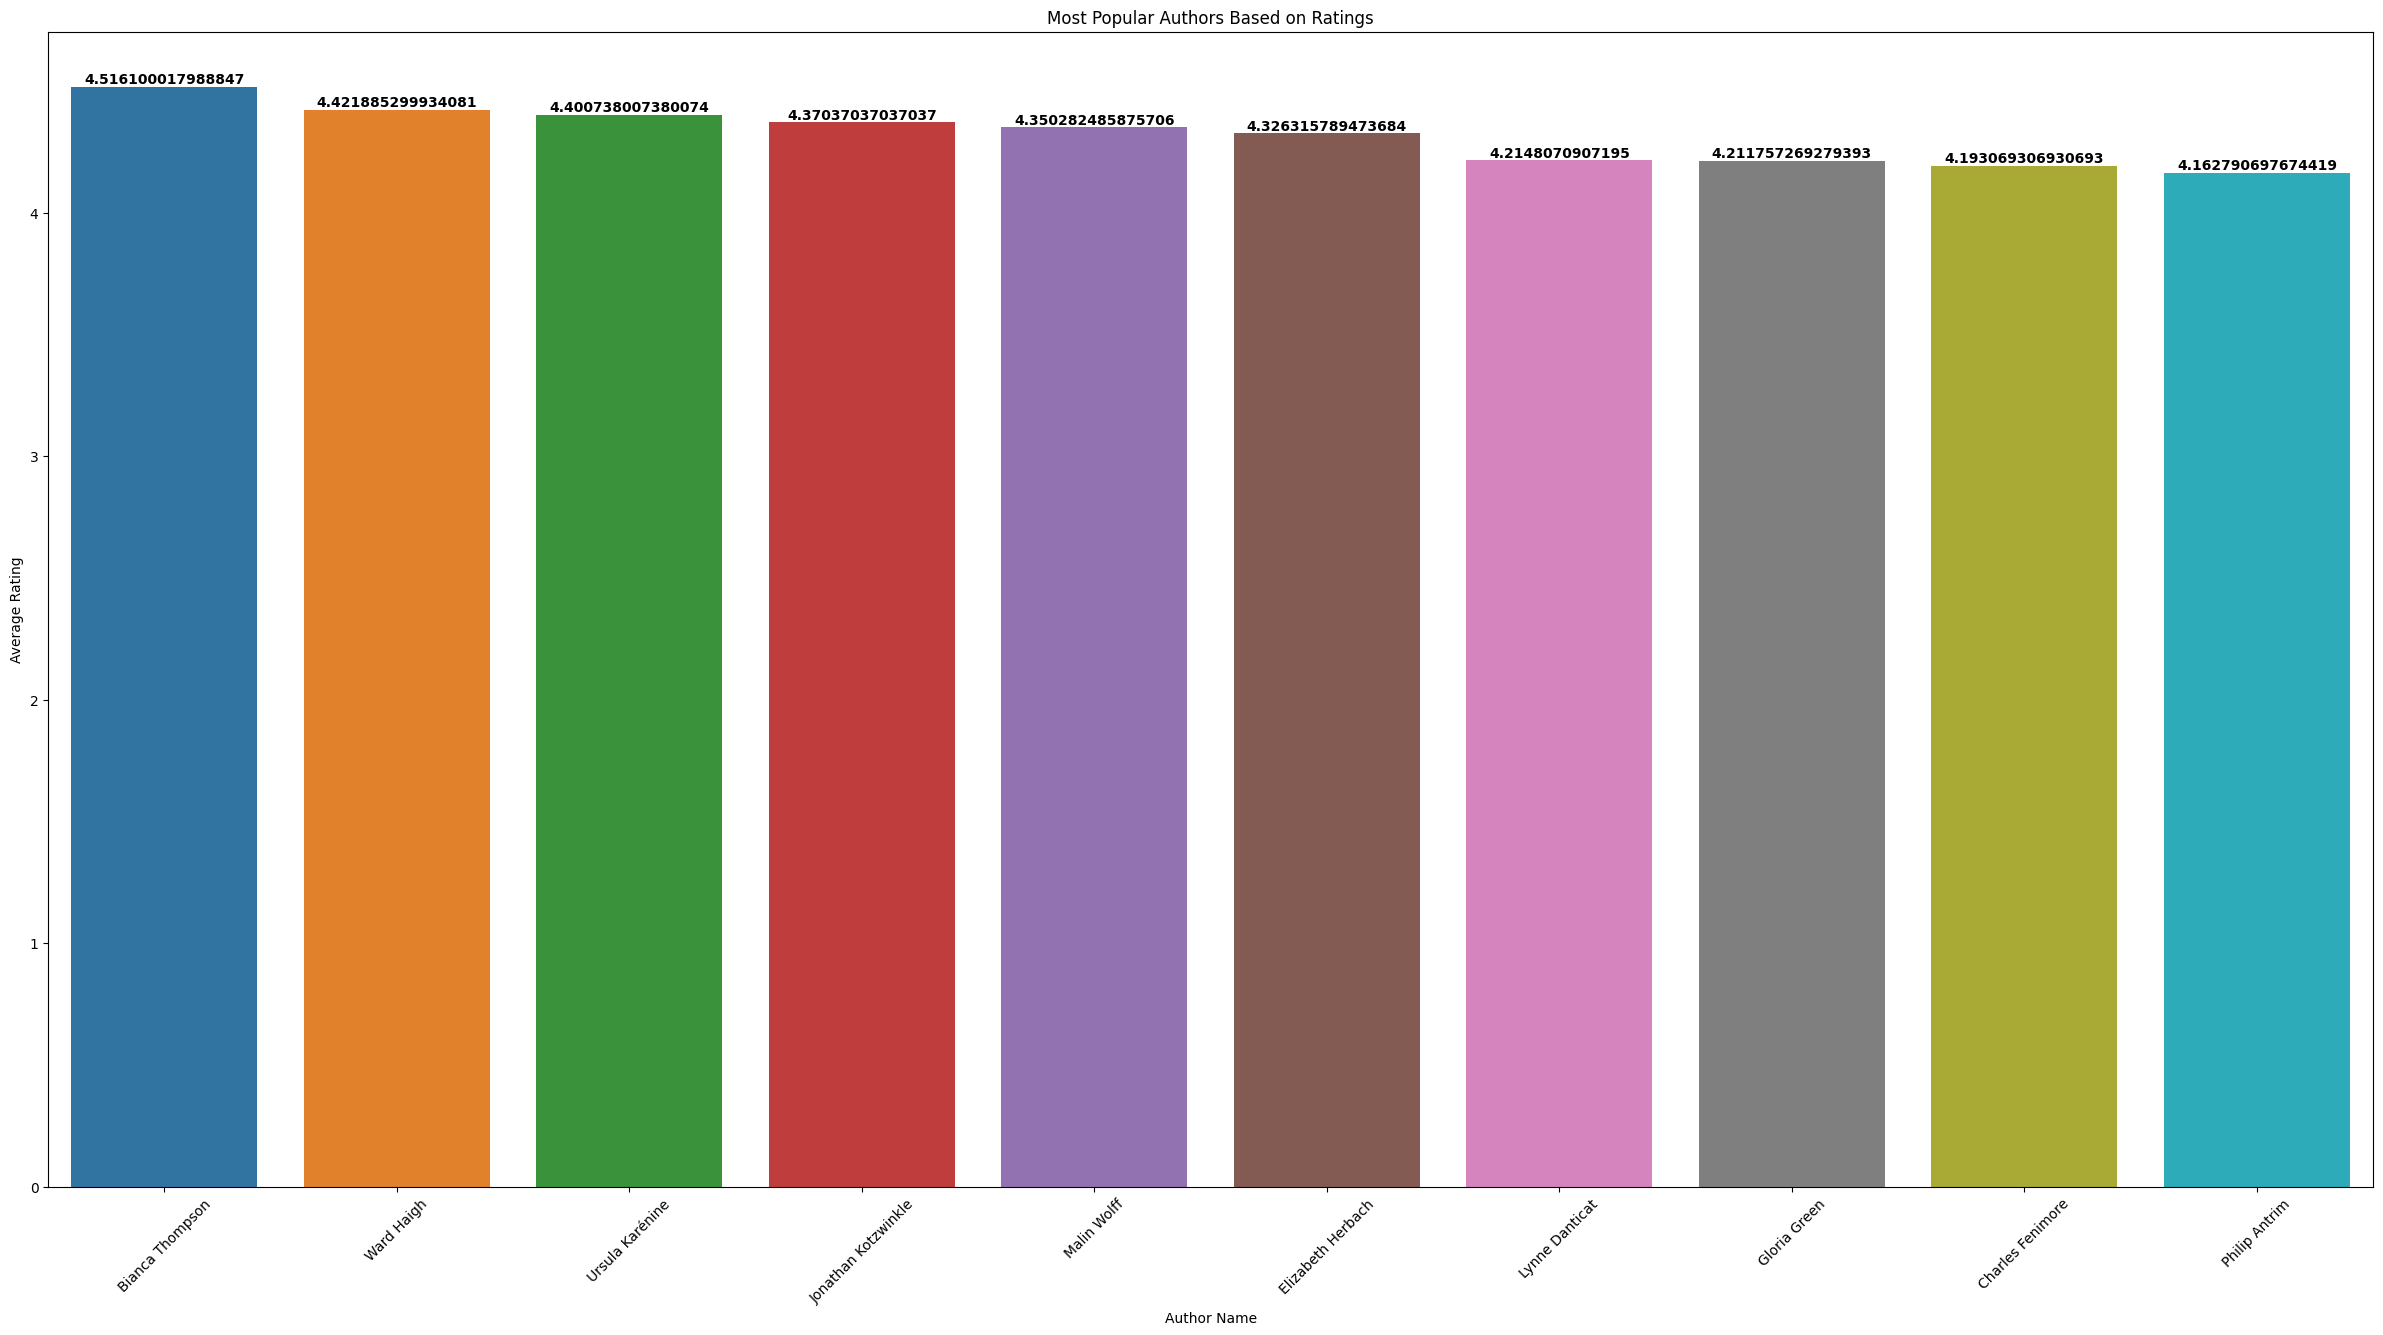

In [2]:
# 1.Who is the most popular or famous author (a. based on ratings; b. based on sales)

# Based on Ratings

DS1 = pd.merge(Author, Book, on="AuthID")
DS1 = pd.merge(DS1, Ratings, on="BookID")
DS1["Full_Name"] = DS1["First Name"] + " " + DS1["Last Name"]

df1 = (DS1.groupby("Full_Name")["Rating"].mean().reset_index().sort_values(by="Rating", ascending=False))[:10]

plt.figure(figsize=(30, 15))
sns.barplot(x=df1["Full_Name"], y=df1["Rating"] , hue = df1['Full_Name'])

for i, value in enumerate(df1['Rating']):
    plt.text(i, value, str(value), ha="center", va="bottom", weight="bold")

plt.xlabel("Author Name")
plt.ylabel("Average Rating")
plt.title("Most Popular Authors Based on Ratings")
plt.xticks(rotation=45)
plt.show()

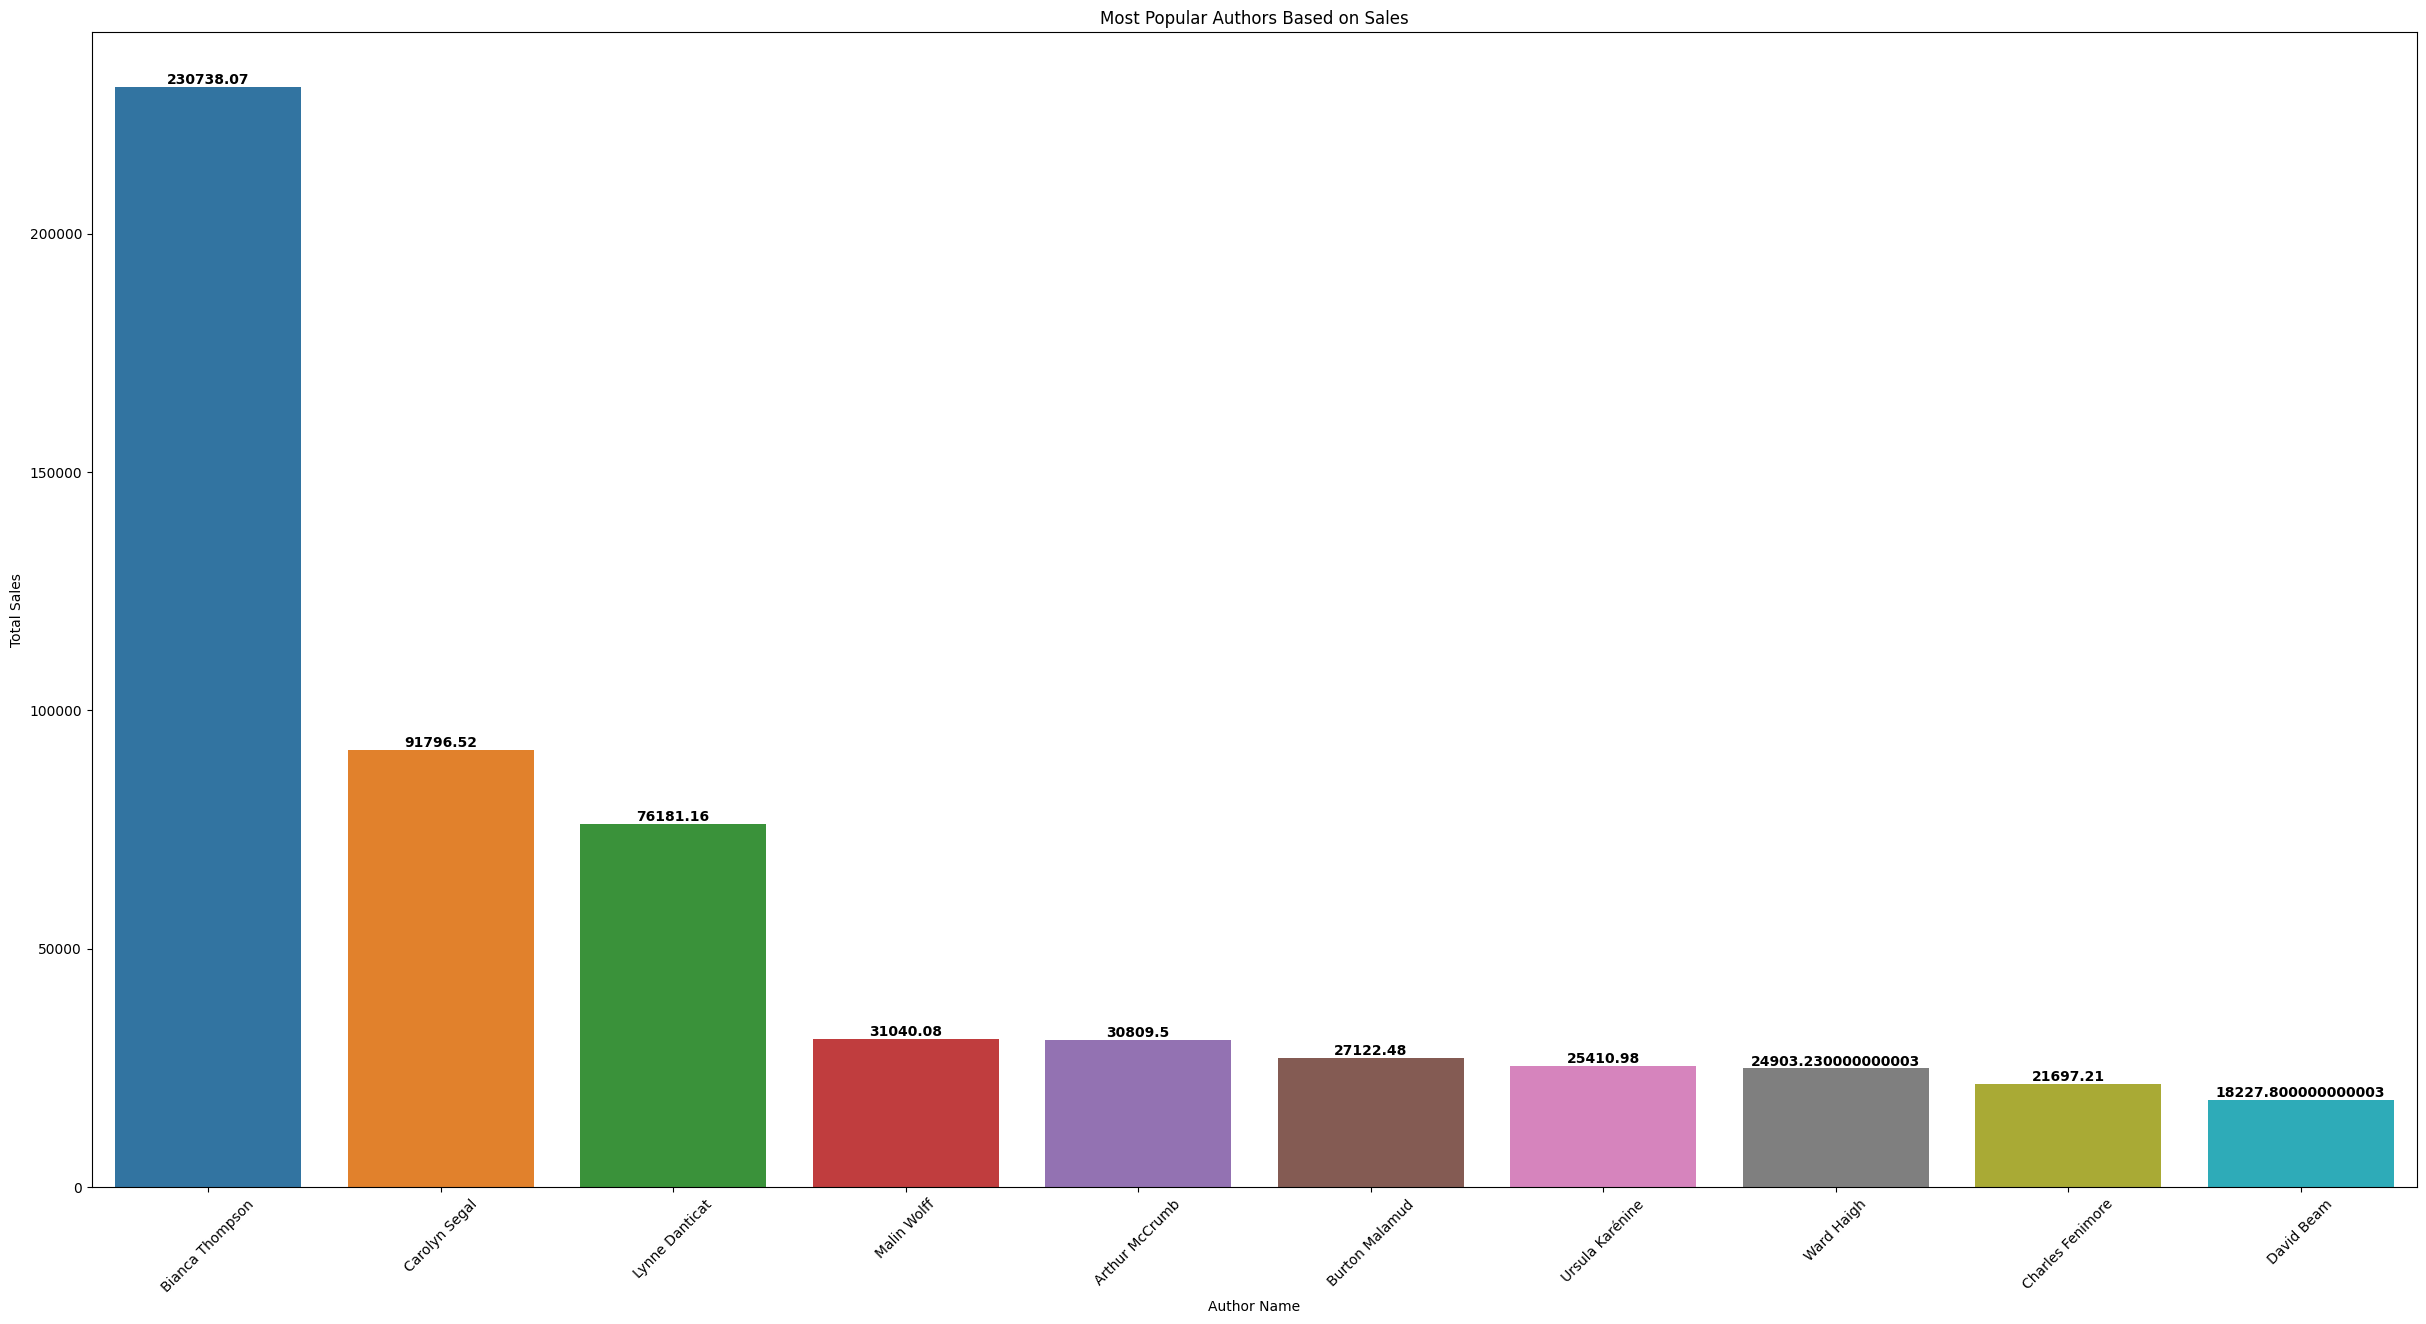

In [3]:
# Based on Sales

Sales = pd.concat([Sales_Q1.value_counts("ISBN").reset_index(),Sales_Q2.value_counts("ISBN").reset_index(),Sales_Q3.value_counts("ISBN").reset_index(),Sales_Q4.value_counts('ISBN').reset_index(),],ignore_index=True,)
Sales = pd.merge(Sales , Edition , on="ISBN")
Sales['Total Price'] = Sales['count'] * Sales['Price']
Sales = Sales[['ISBN' , 'Total Price']].sort_values(by='Total Price' , ascending=False)

DS1A = pd.merge(Book, Edition, on="BookID")
DS1A = pd.merge(DS1A, Author, on="AuthID")
DS1A = pd.merge(DS1A, Sales , on="ISBN")
DS1A = DS1A.groupby('Full_Name')['Total Price'].sum().reset_index().sort_values(by="Total Price", ascending=False)[:10]
df1a = DS1A

plt.figure(figsize=(30, 15))
sns.barplot(x=df1a["Full_Name"], y=df1a["Total Price"], hue=df1a["Full_Name"])

for i, value in enumerate(df1a["Total Price"]):
    plt.text(i, value, str(value), ha="center", va="bottom", weight="bold")

plt.xlabel("Author Name")
plt.ylabel("Total Sales")
plt.title("Most Popular Authors Based on Sales")
plt.xticks(rotation=45)
plt.show()

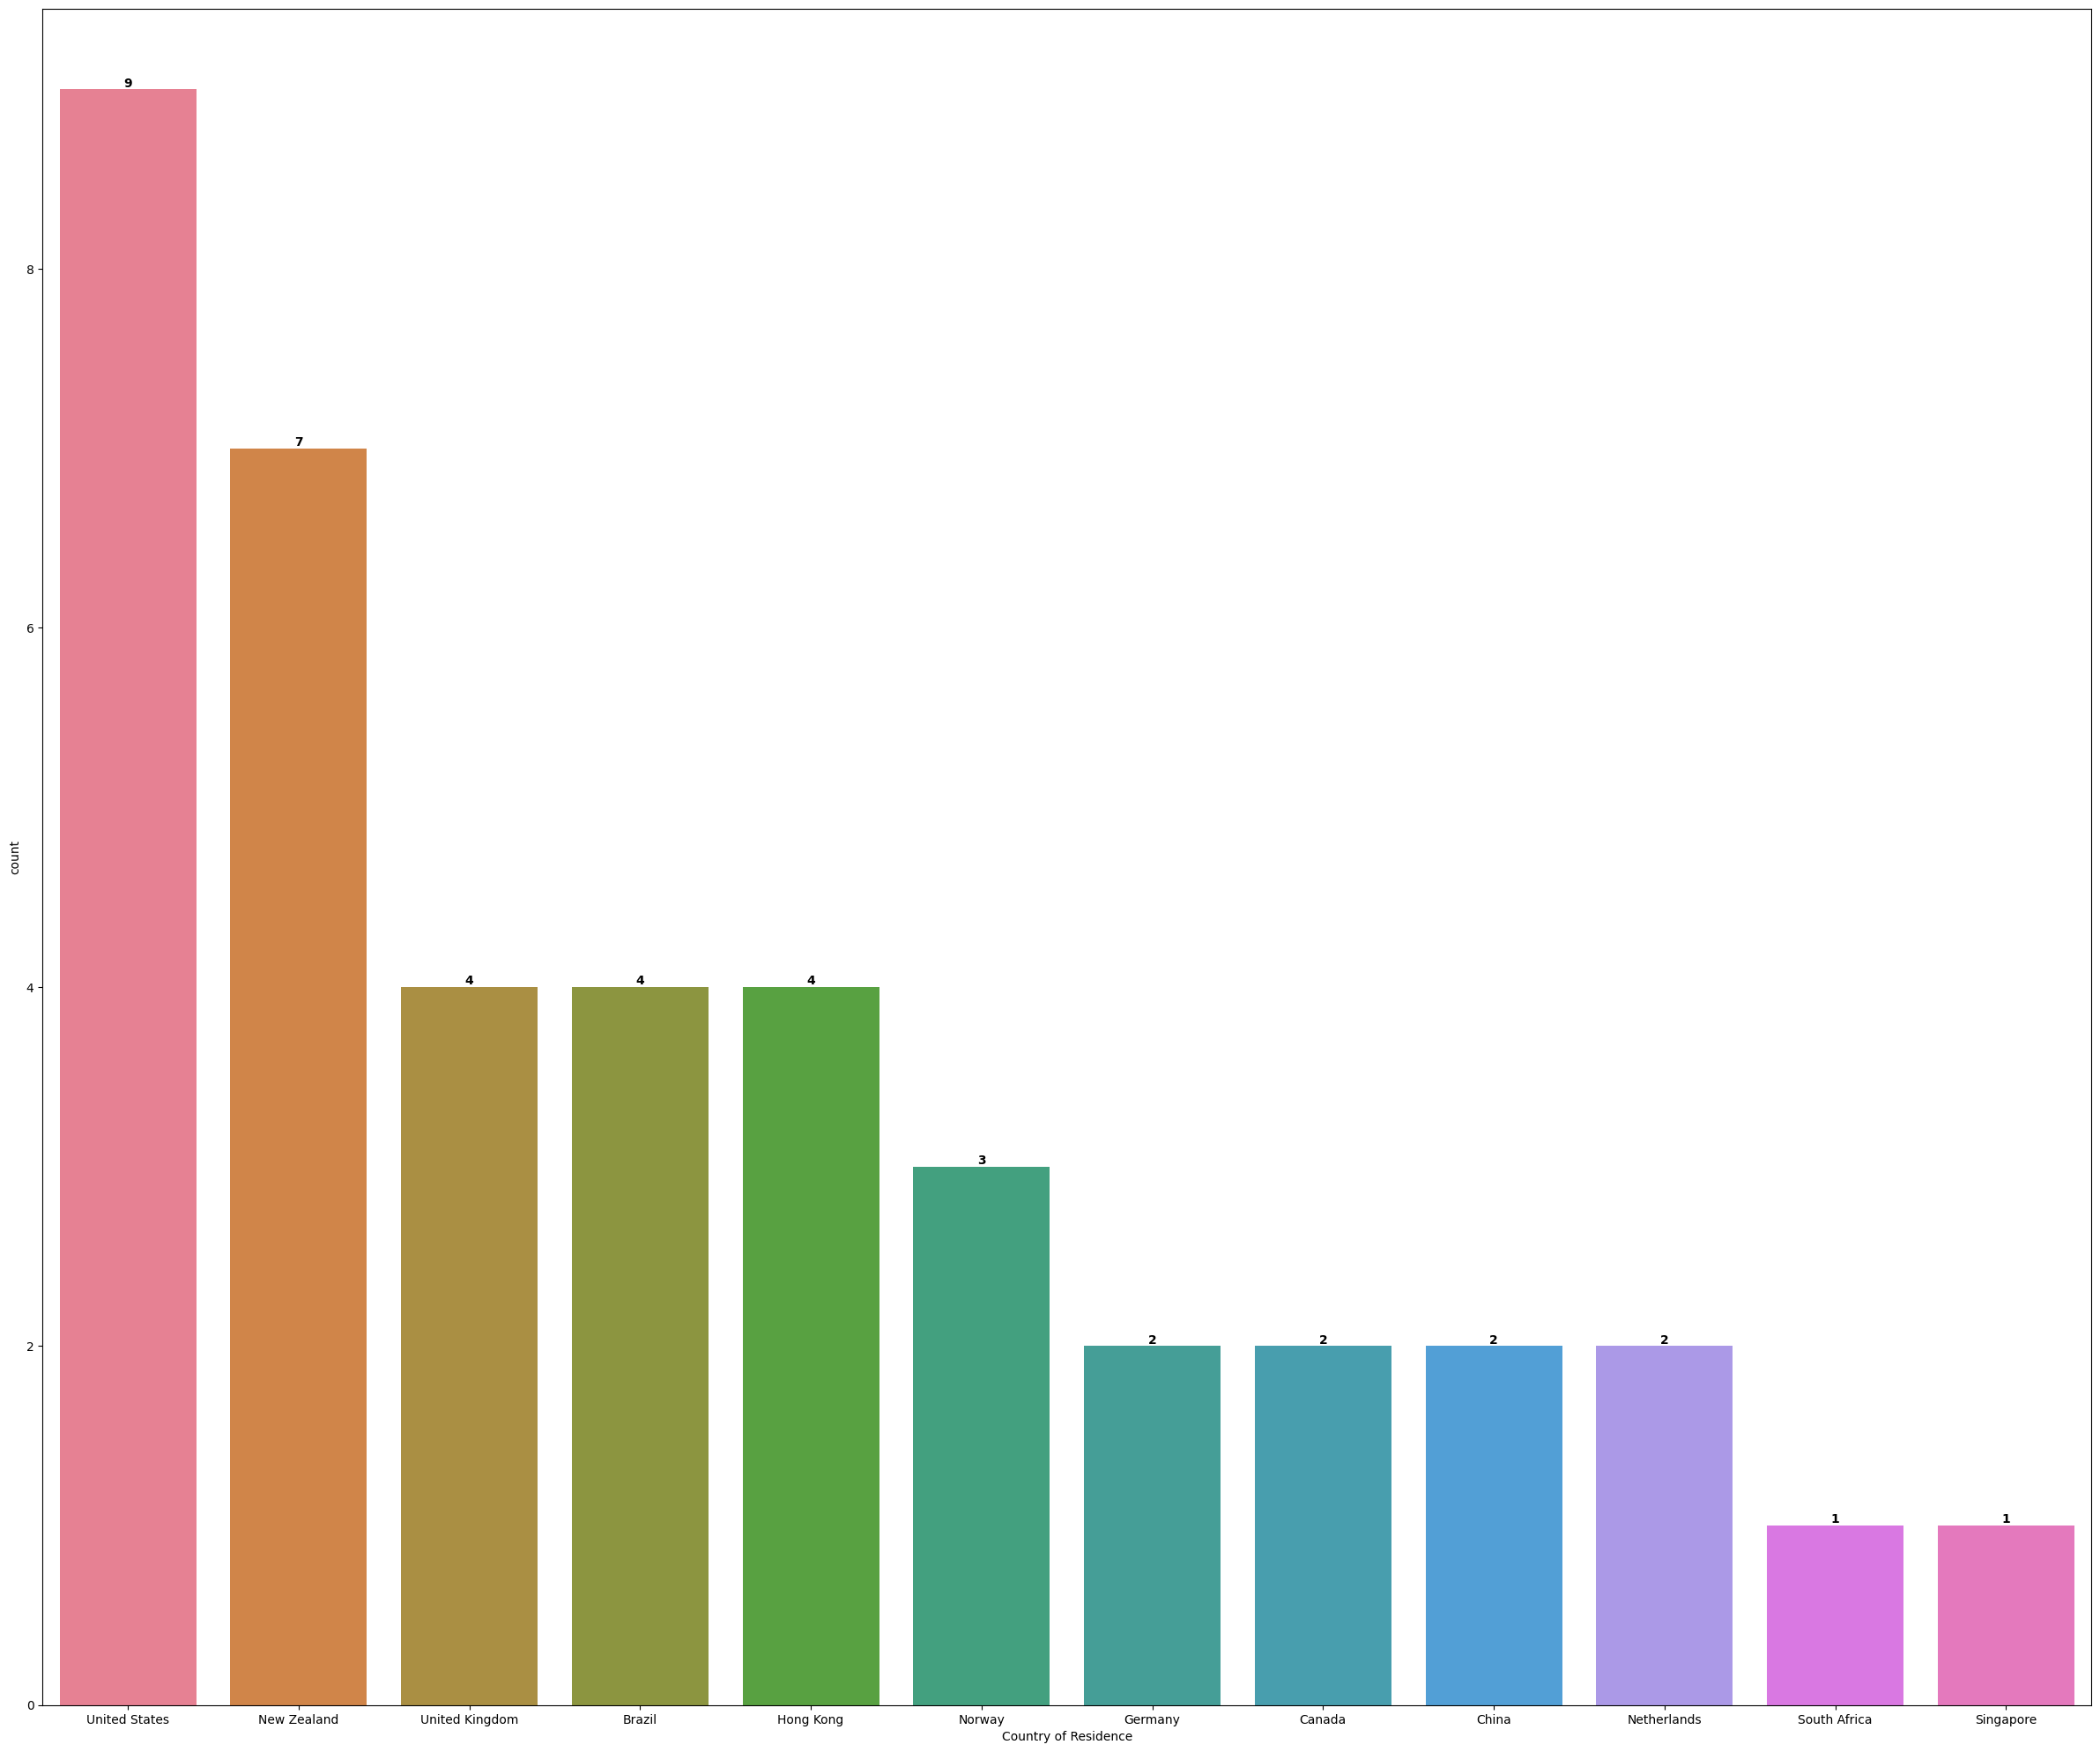

In [4]:
# 2.	Top-3 countries with the highest number of authors

df2 = Author['Country of Residence'].value_counts().reset_index()
plt.figure(figsize=(30, 25))
sns.barplot(data=df2, x="Country of Residence", y = "count" , hue="Country of Residence")
for i, value in enumerate(Author["Country of Residence"].value_counts()):
    plt.text(i, value, str(value), ha="center", va="bottom", weight="bold")

plt.show()

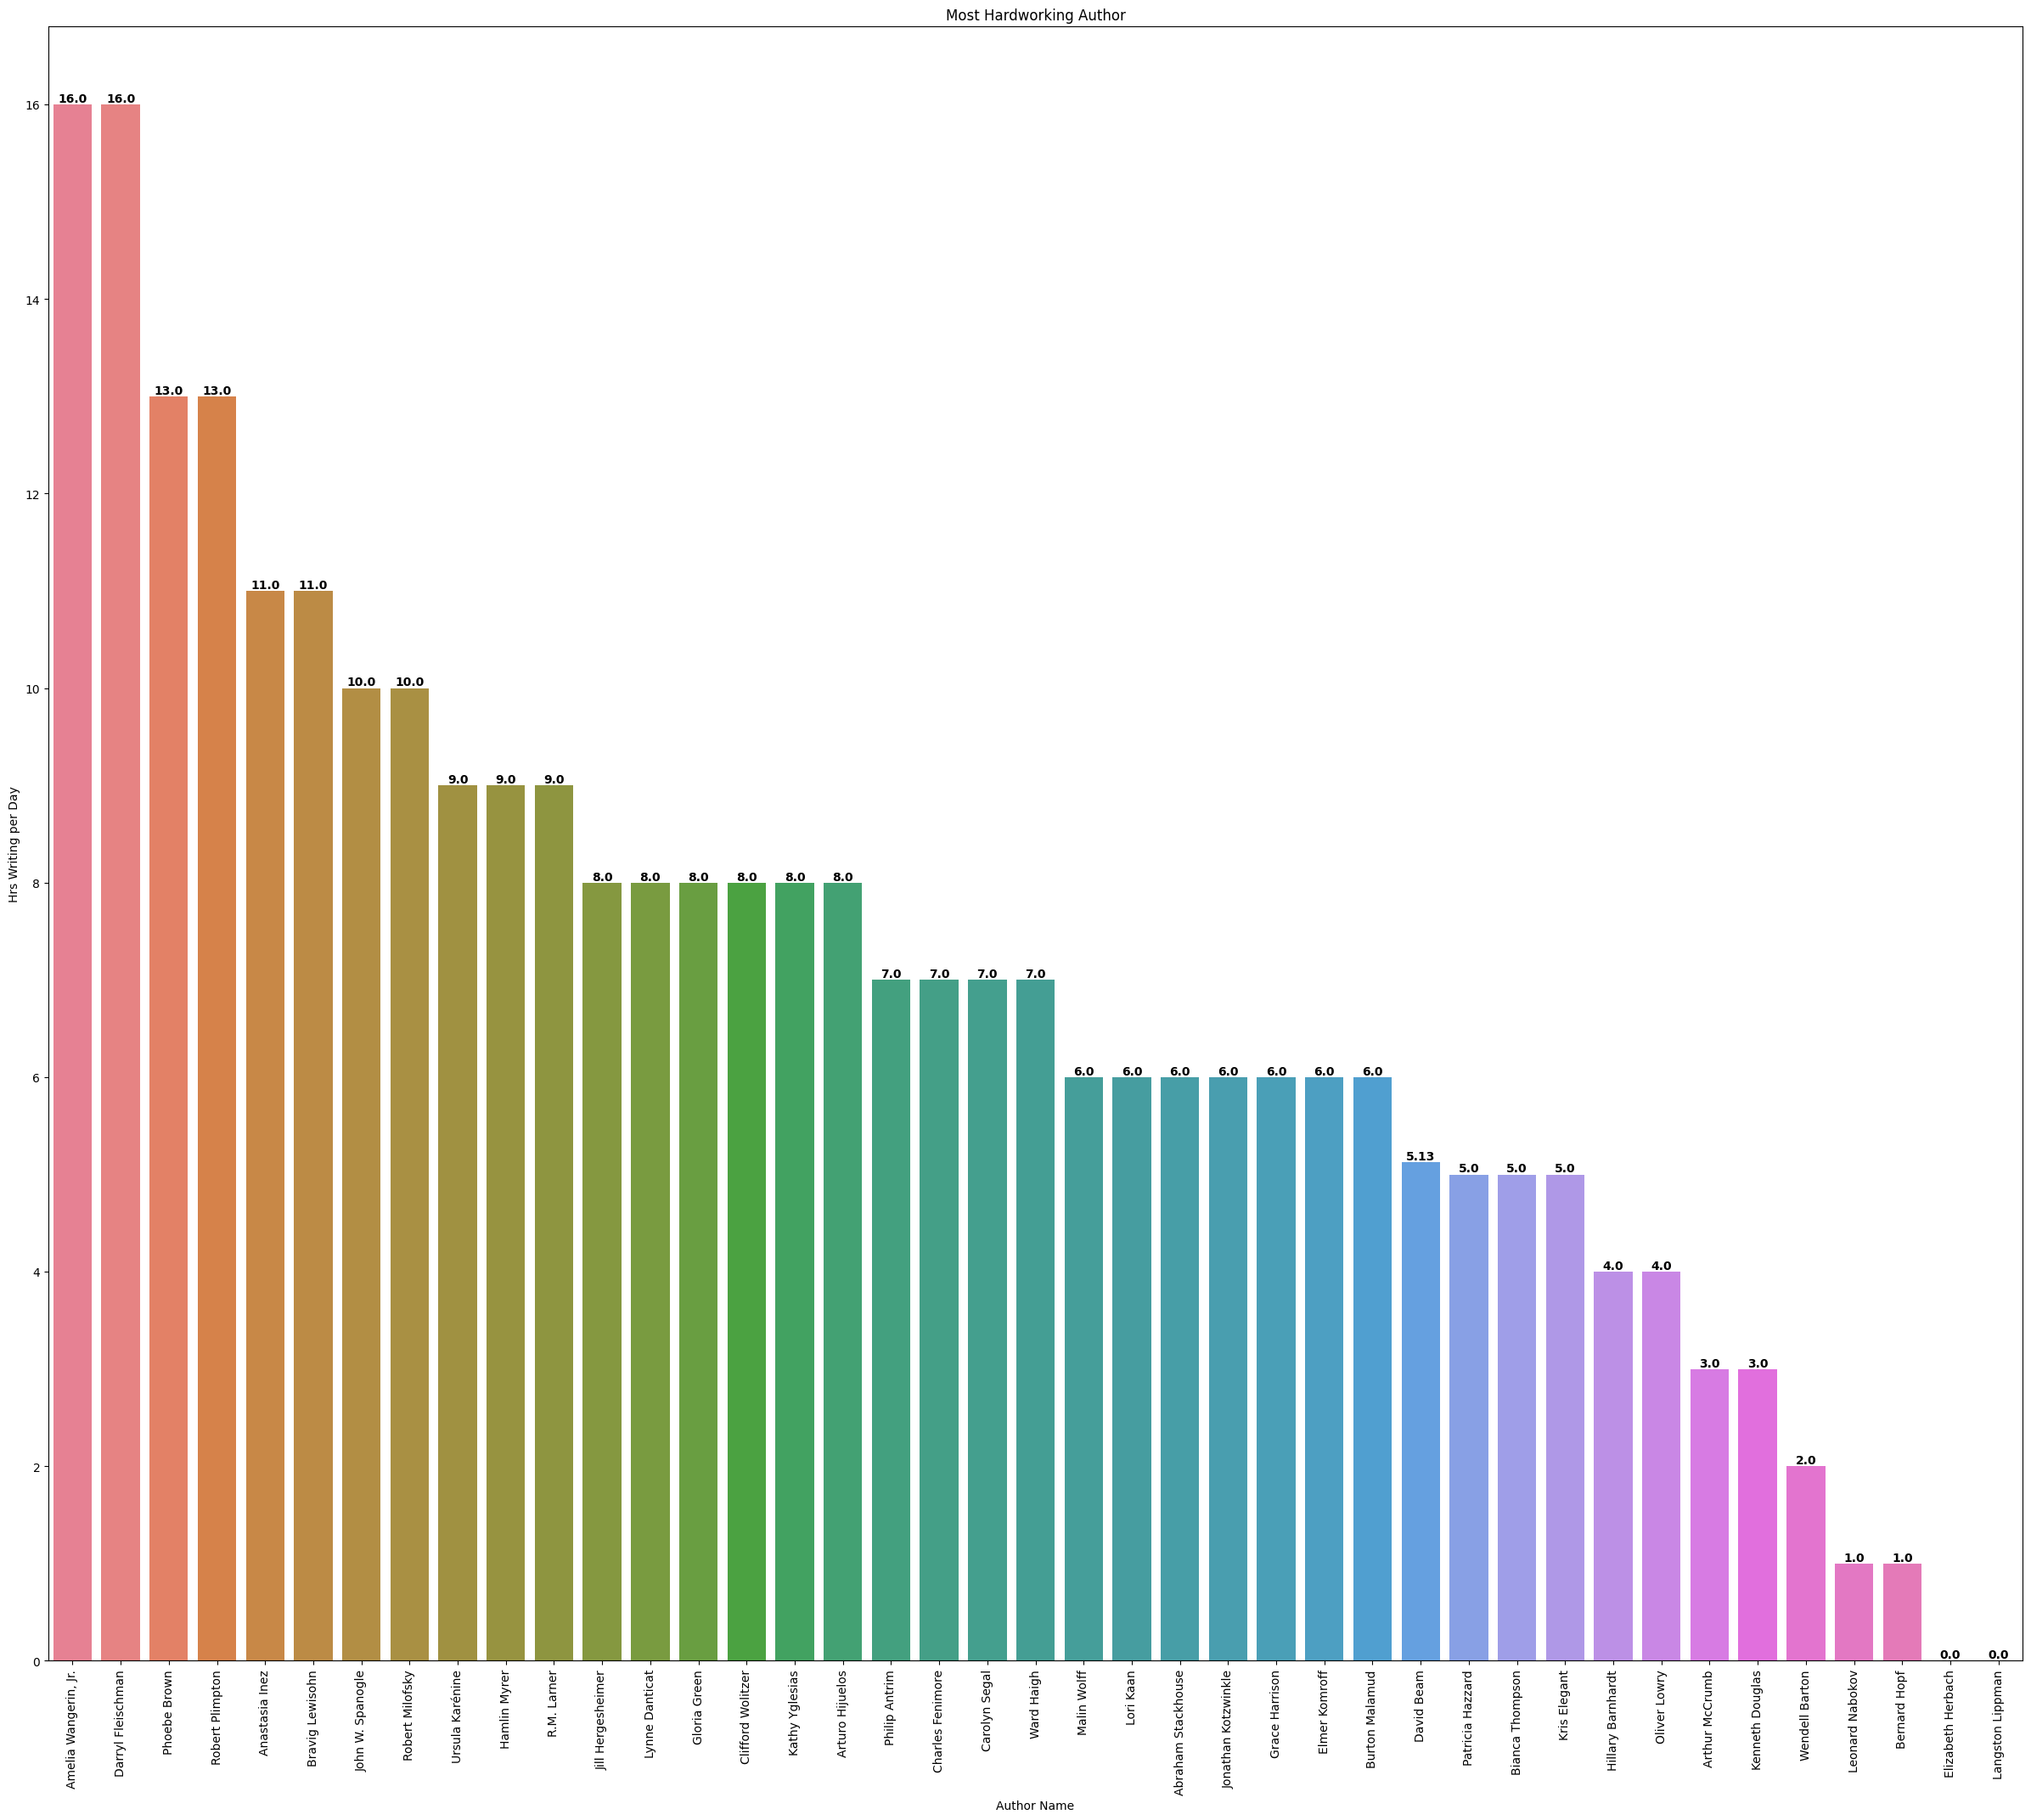

In [5]:
# 3.Who is the hardworking author in terms of working per day

df3 = Author.sort_values(by="Hrs Writing per Day" , ascending=False)
df3 = df3[['Full_Name' , "Hrs Writing per Day"]]

plt.figure(figsize=(30, 25))
sns.barplot(
    data=df3, x="Full_Name", y="Hrs Writing per Day", hue="Full_Name"
)

for i, value in enumerate(df3["Hrs Writing per Day"]):
    plt.text(i, value, str(value), ha="center", va="bottom", weight="bold")

plt.xlabel("Author Name")
plt.ylabel("Hrs Writing per Day")
plt.title("Most Hardworking Author")
plt.xticks(rotation=90)
plt.show()

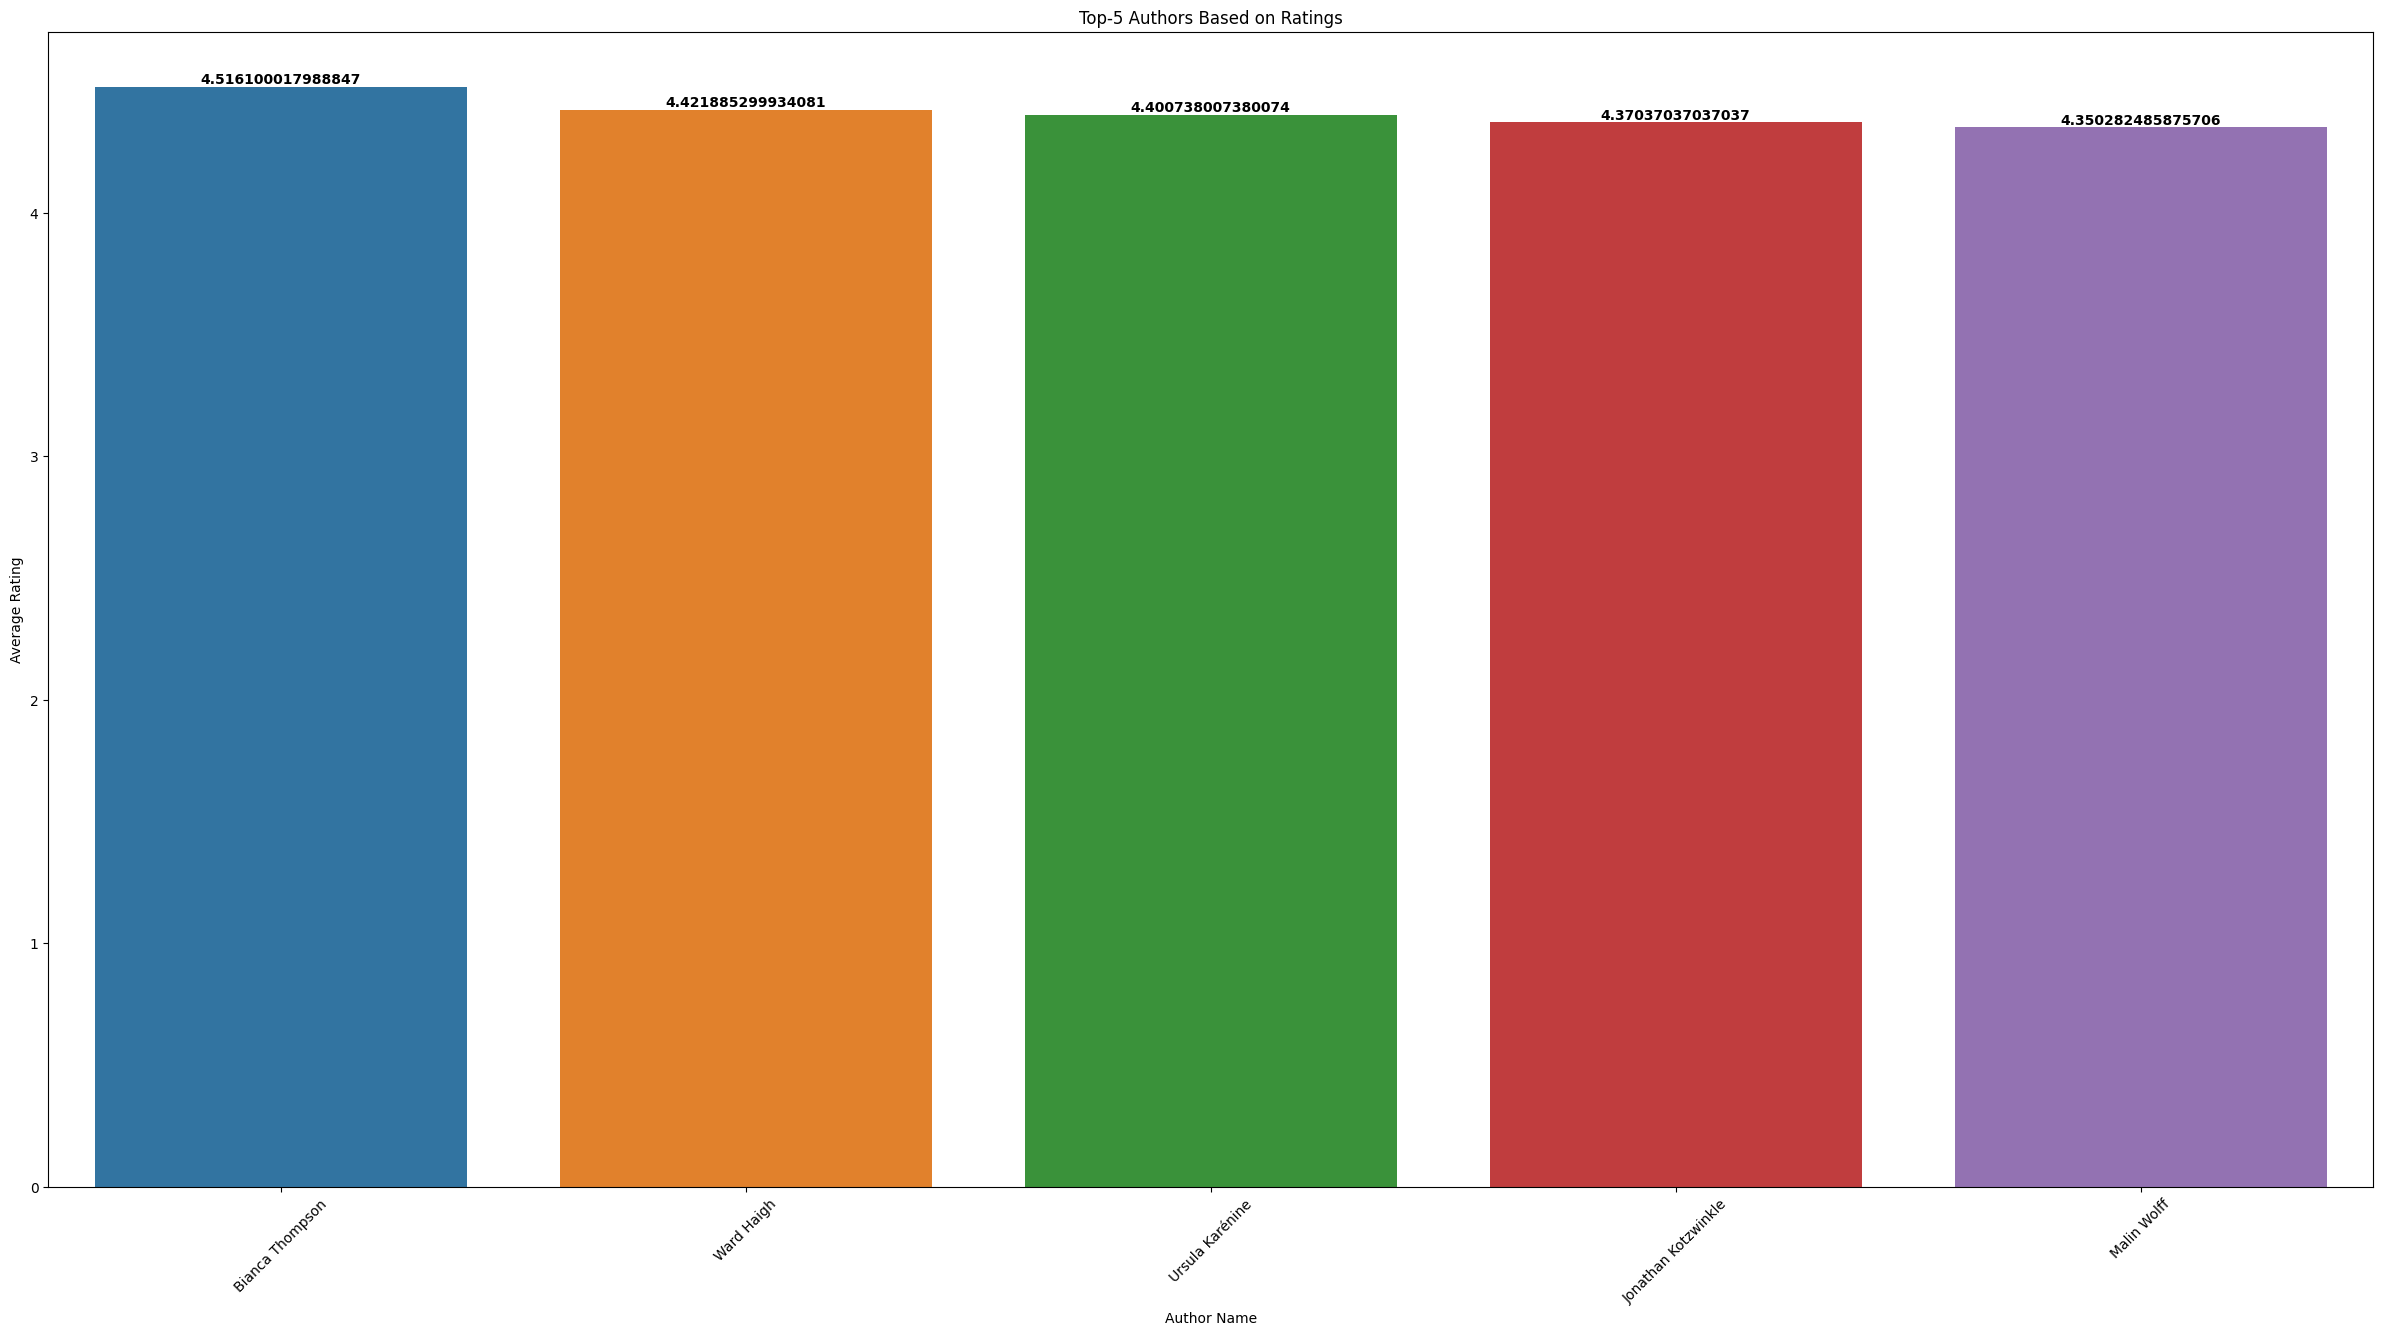

In [6]:
# 4.Top 5 authors having the highest average ratings

DS4 = pd.merge(Book , Ratings , on = "BookID")
DS4 = pd.merge(DS4 , Author , on = "AuthID")
df_4 = DS4.groupby('Full_Name')['Rating'].mean().sort_values(ascending=False).reset_index()[:5]

plt.figure(figsize=(30, 15))
sns.barplot(x=df_4["Full_Name"], y=df_4["Rating"] , hue = df_4['Full_Name'])

for i, value in enumerate(df_4['Rating']):
    plt.text(i, value, str(value), ha="center", va="bottom", weight="bold")

plt.xlabel("Author Name")
plt.ylabel("Average Rating")
plt.title("Top-5 Authors Based on Ratings")
plt.xticks(rotation=45)
plt.show()

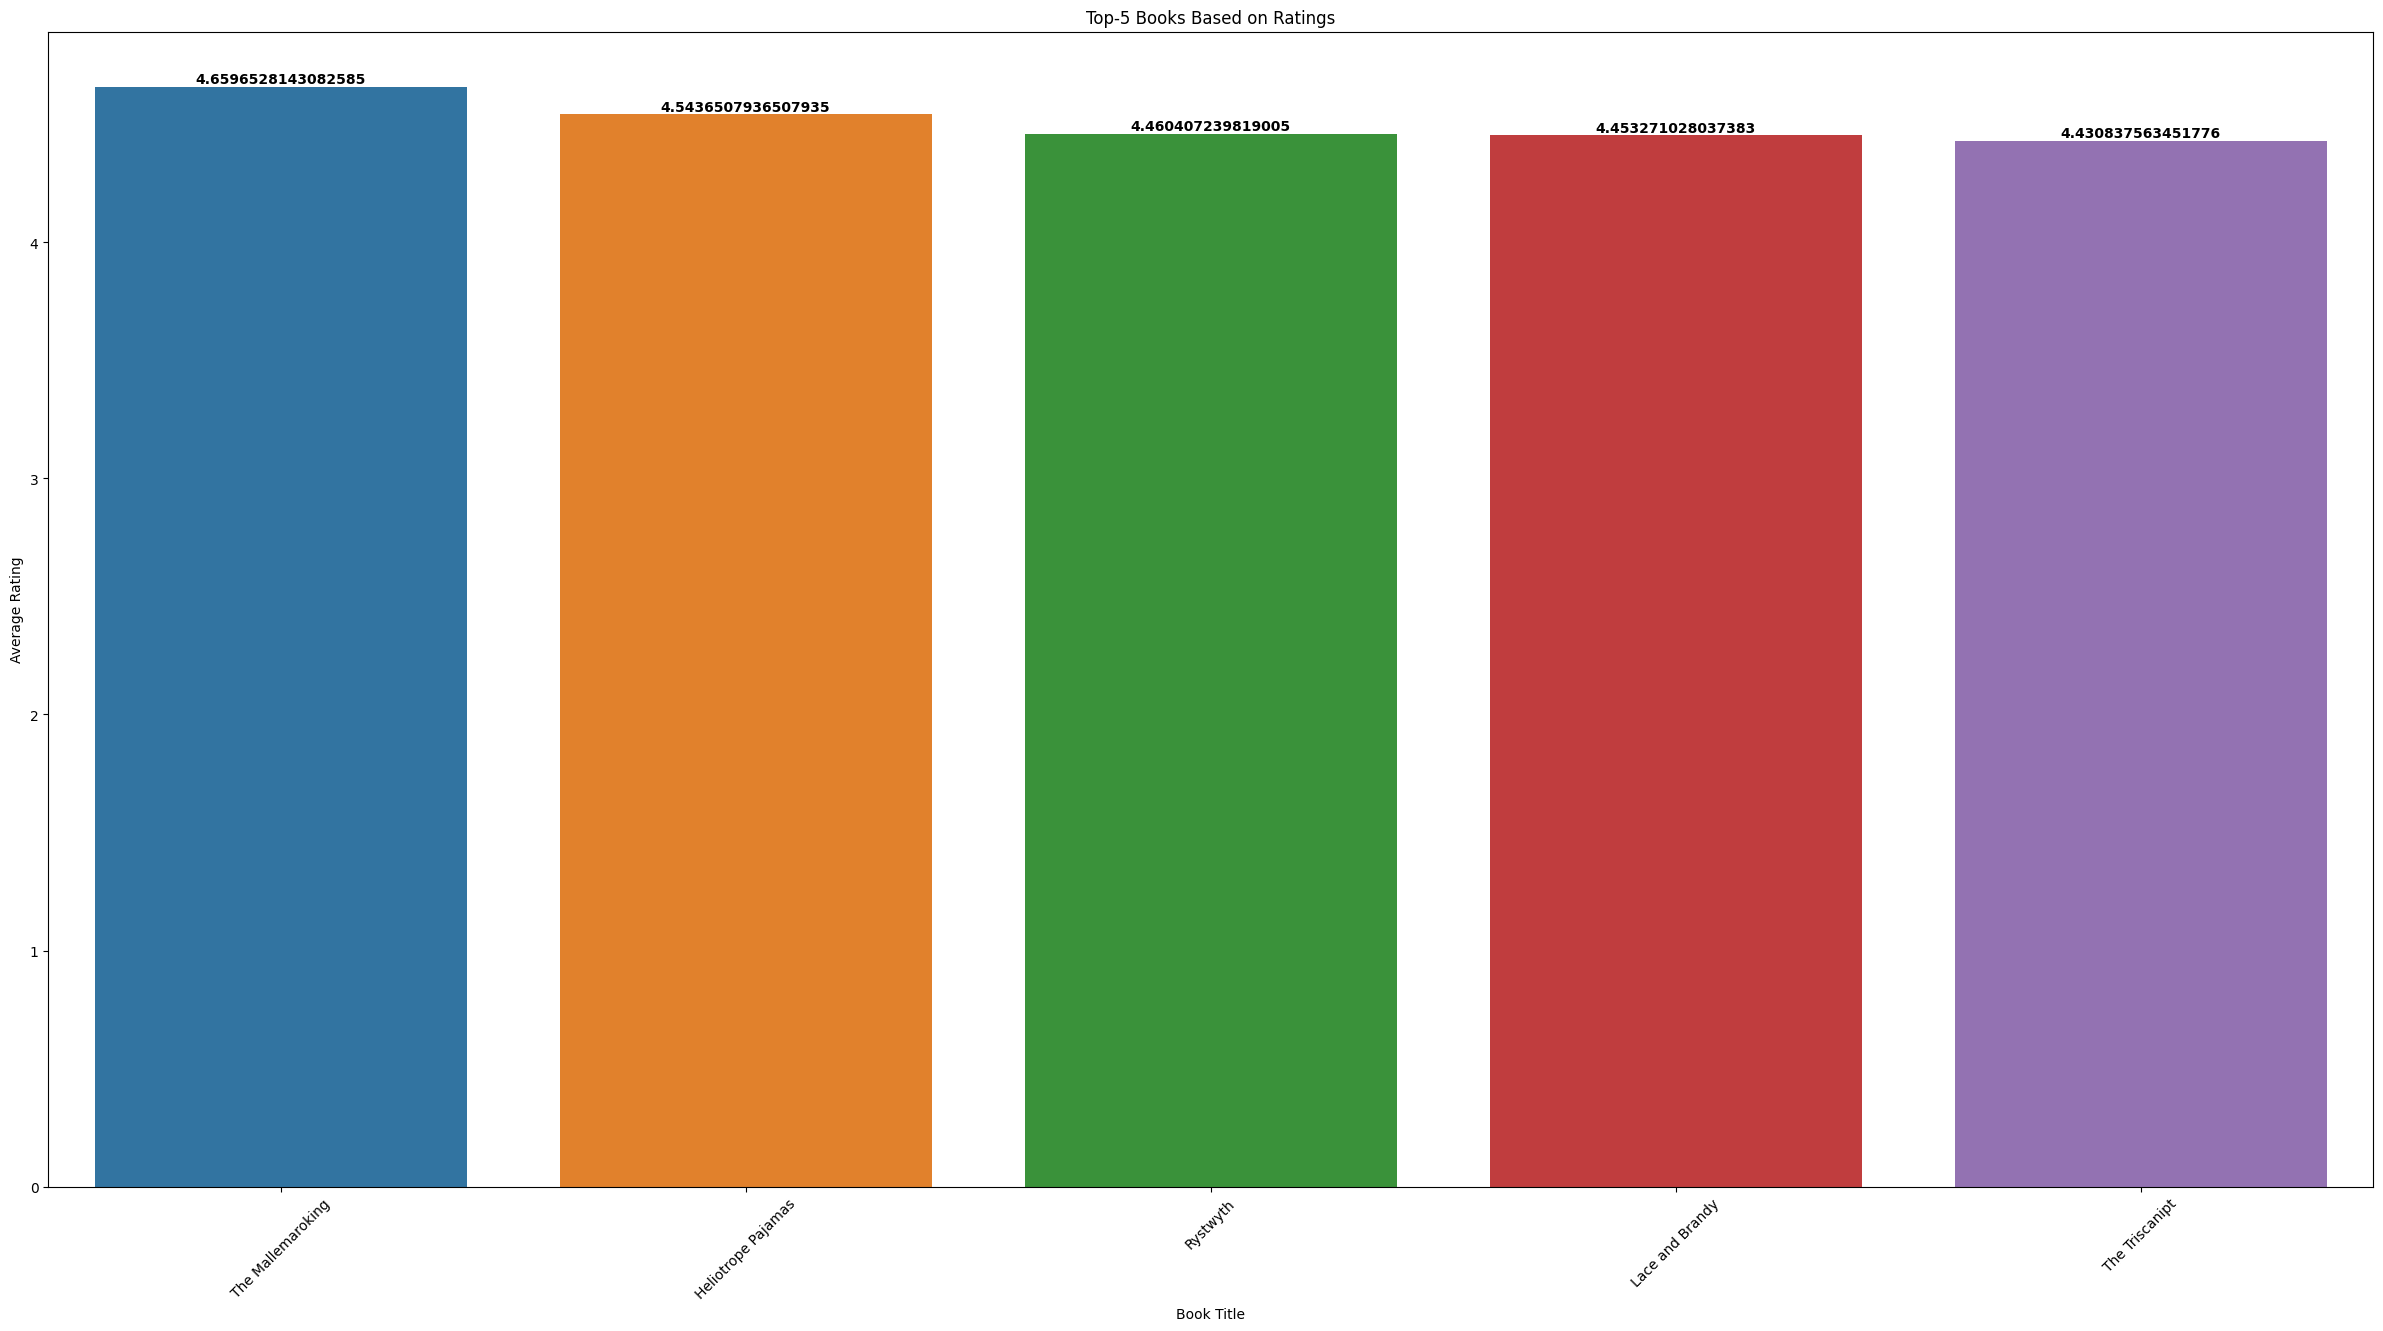

In [16]:
# 5. Top 5 Books having the highest average ratings

DS5 = pd.merge(Book , Ratings , on='BookID')
df5 = pd.DataFrame(DS5.groupby('Title')['Rating'].mean().reset_index()).sort_values(by = 'Rating' , ascending=False)[:5]

plt.figure(figsize=(30, 15))
sns.barplot(x=df5["Title"], y=df5["Rating"] , hue = df5['Title'])

for i, value in enumerate(df5["Rating"]):
    plt.text(i, value, str(value), ha="center", va="bottom", weight="bold")

plt.xlabel("Book Title")
plt.ylabel("Average Rating")
plt.title("Top-5 Books Based on Ratings")
plt.xticks(rotation=45)
plt.show()

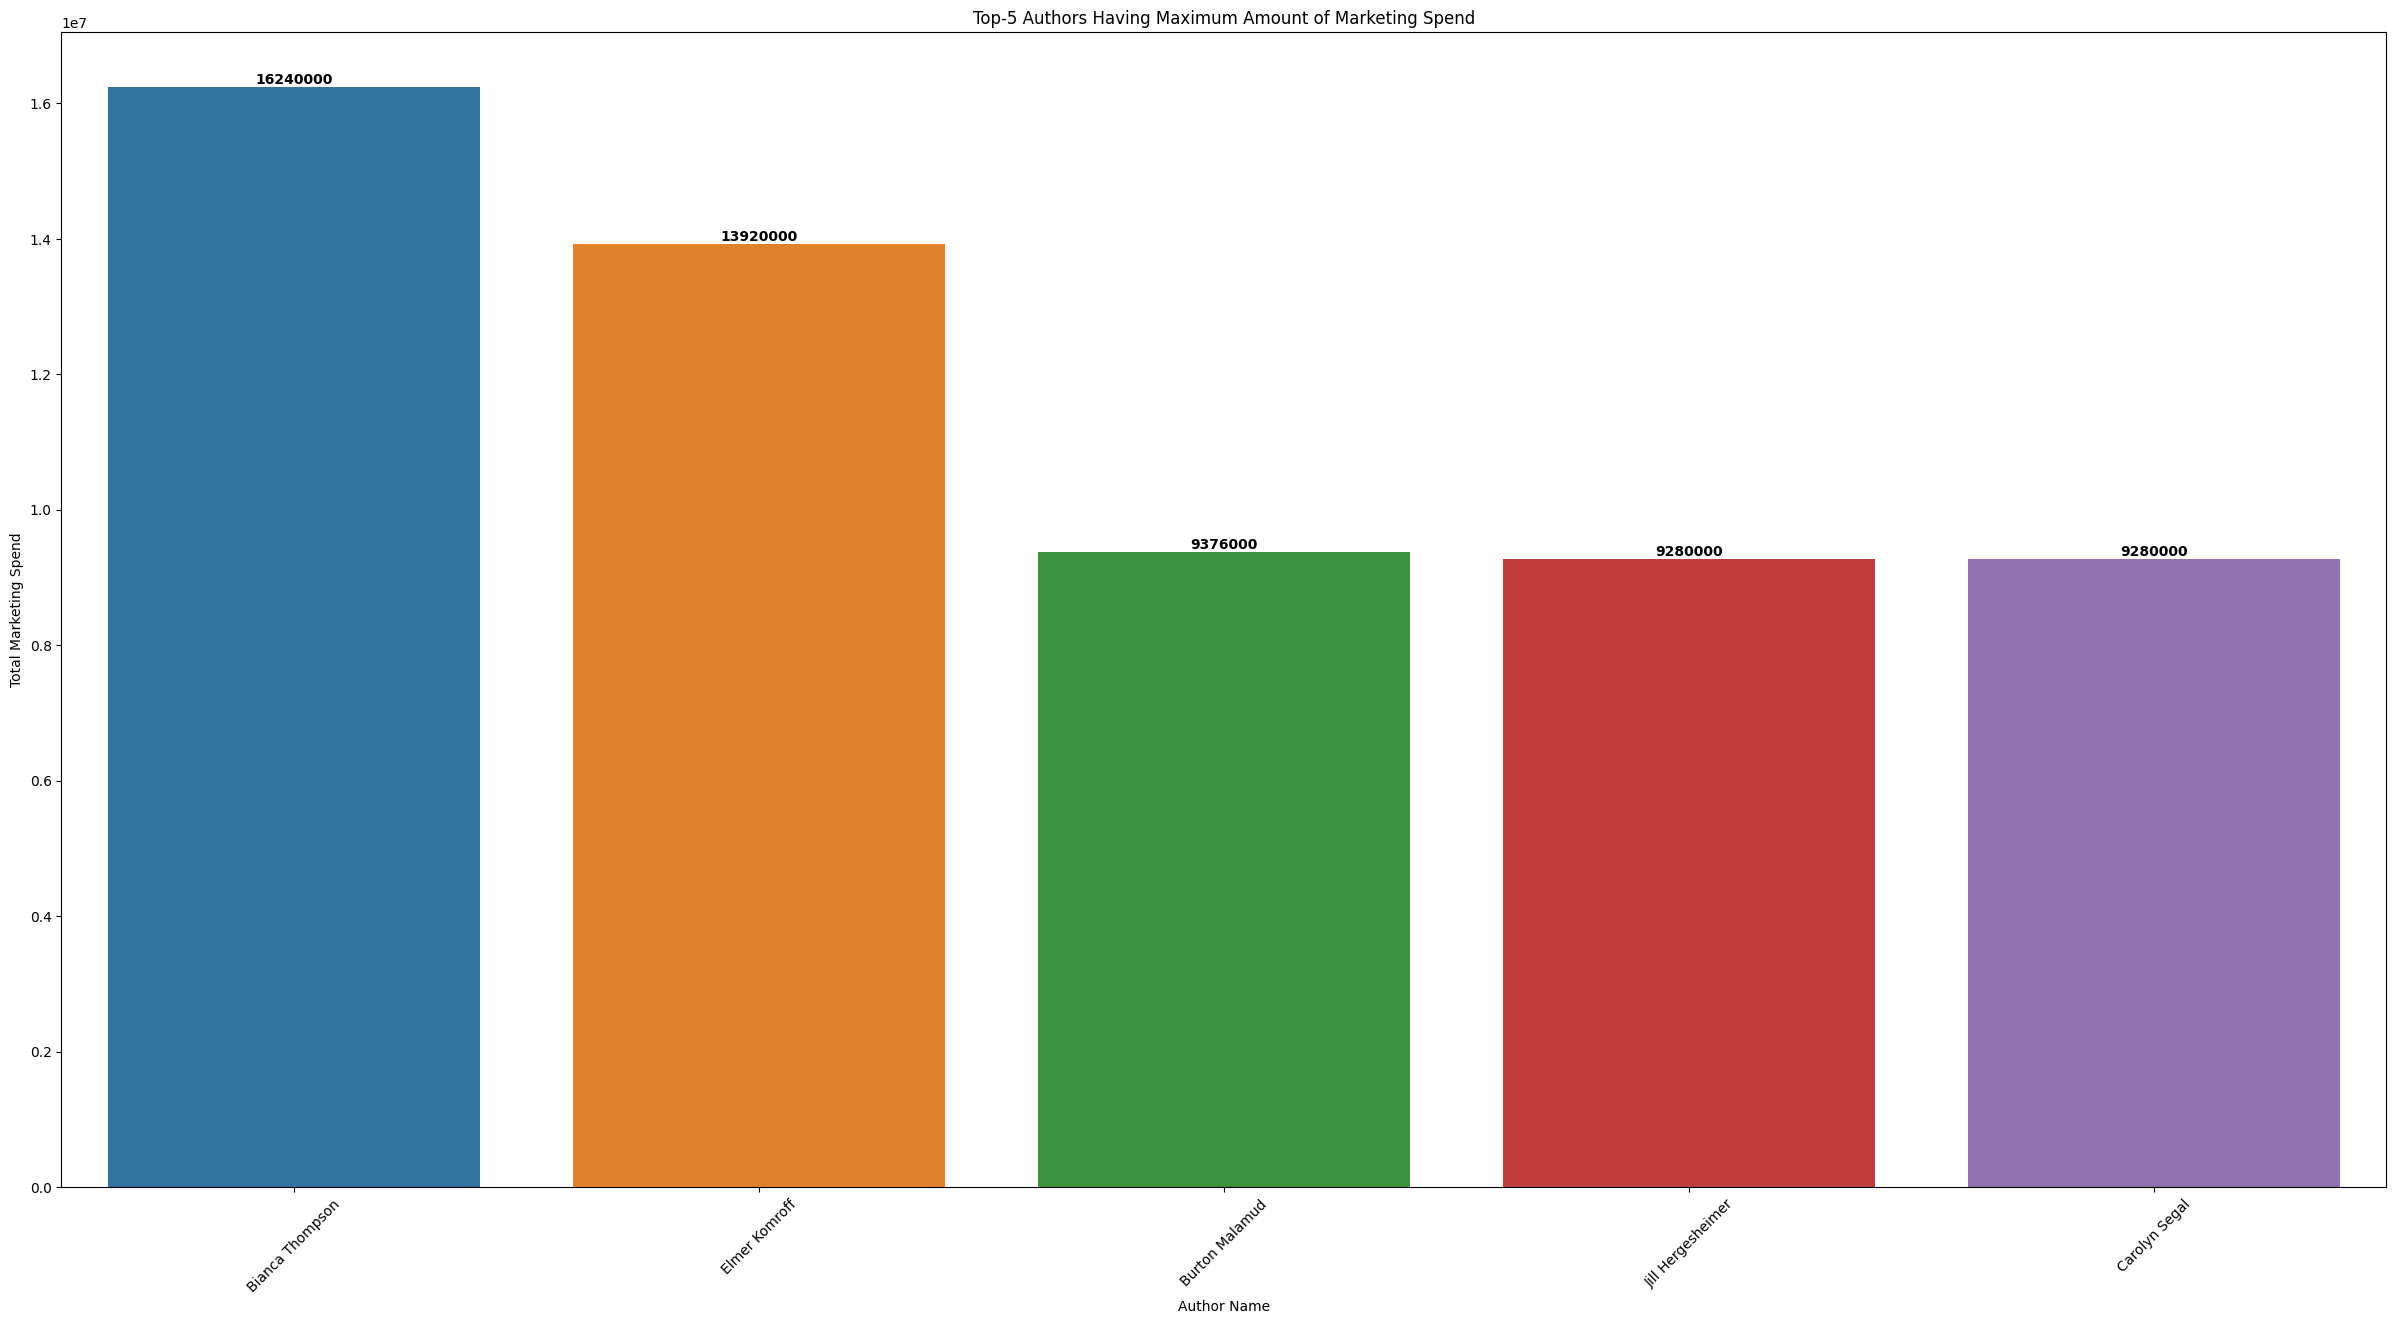

In [14]:
# 6. Top-5 authors spending maximum amount on marketing

DS6 = pd.merge(Book, Author, on="AuthID")
DS6 = pd.merge(DS6, Edition, on="BookID")
DS6 = pd.merge(DS6, Publisher, on="PubID")
df6 = pd.DataFrame(
    DS6.groupby("Full_Name")["Marketing Spend"].sum().reset_index()
).sort_values(by="Marketing Spend", ascending=False)[:5]

plt.figure(figsize=(30, 15))
sns.barplot(x=df6["Full_Name"], y=df6["Marketing Spend"], hue=df6["Full_Name"])

for i, value in enumerate(df6["Marketing Spend"]):
    plt.text(i, value, str(value), ha="center", va="bottom", weight="bold")

plt.xlabel("Author Name")
plt.ylabel("Total Marketing Spend")
plt.title("Top-5 Authors Having Maximum Amount of Marketing Spend")
plt.xticks(rotation=45)
plt.show()

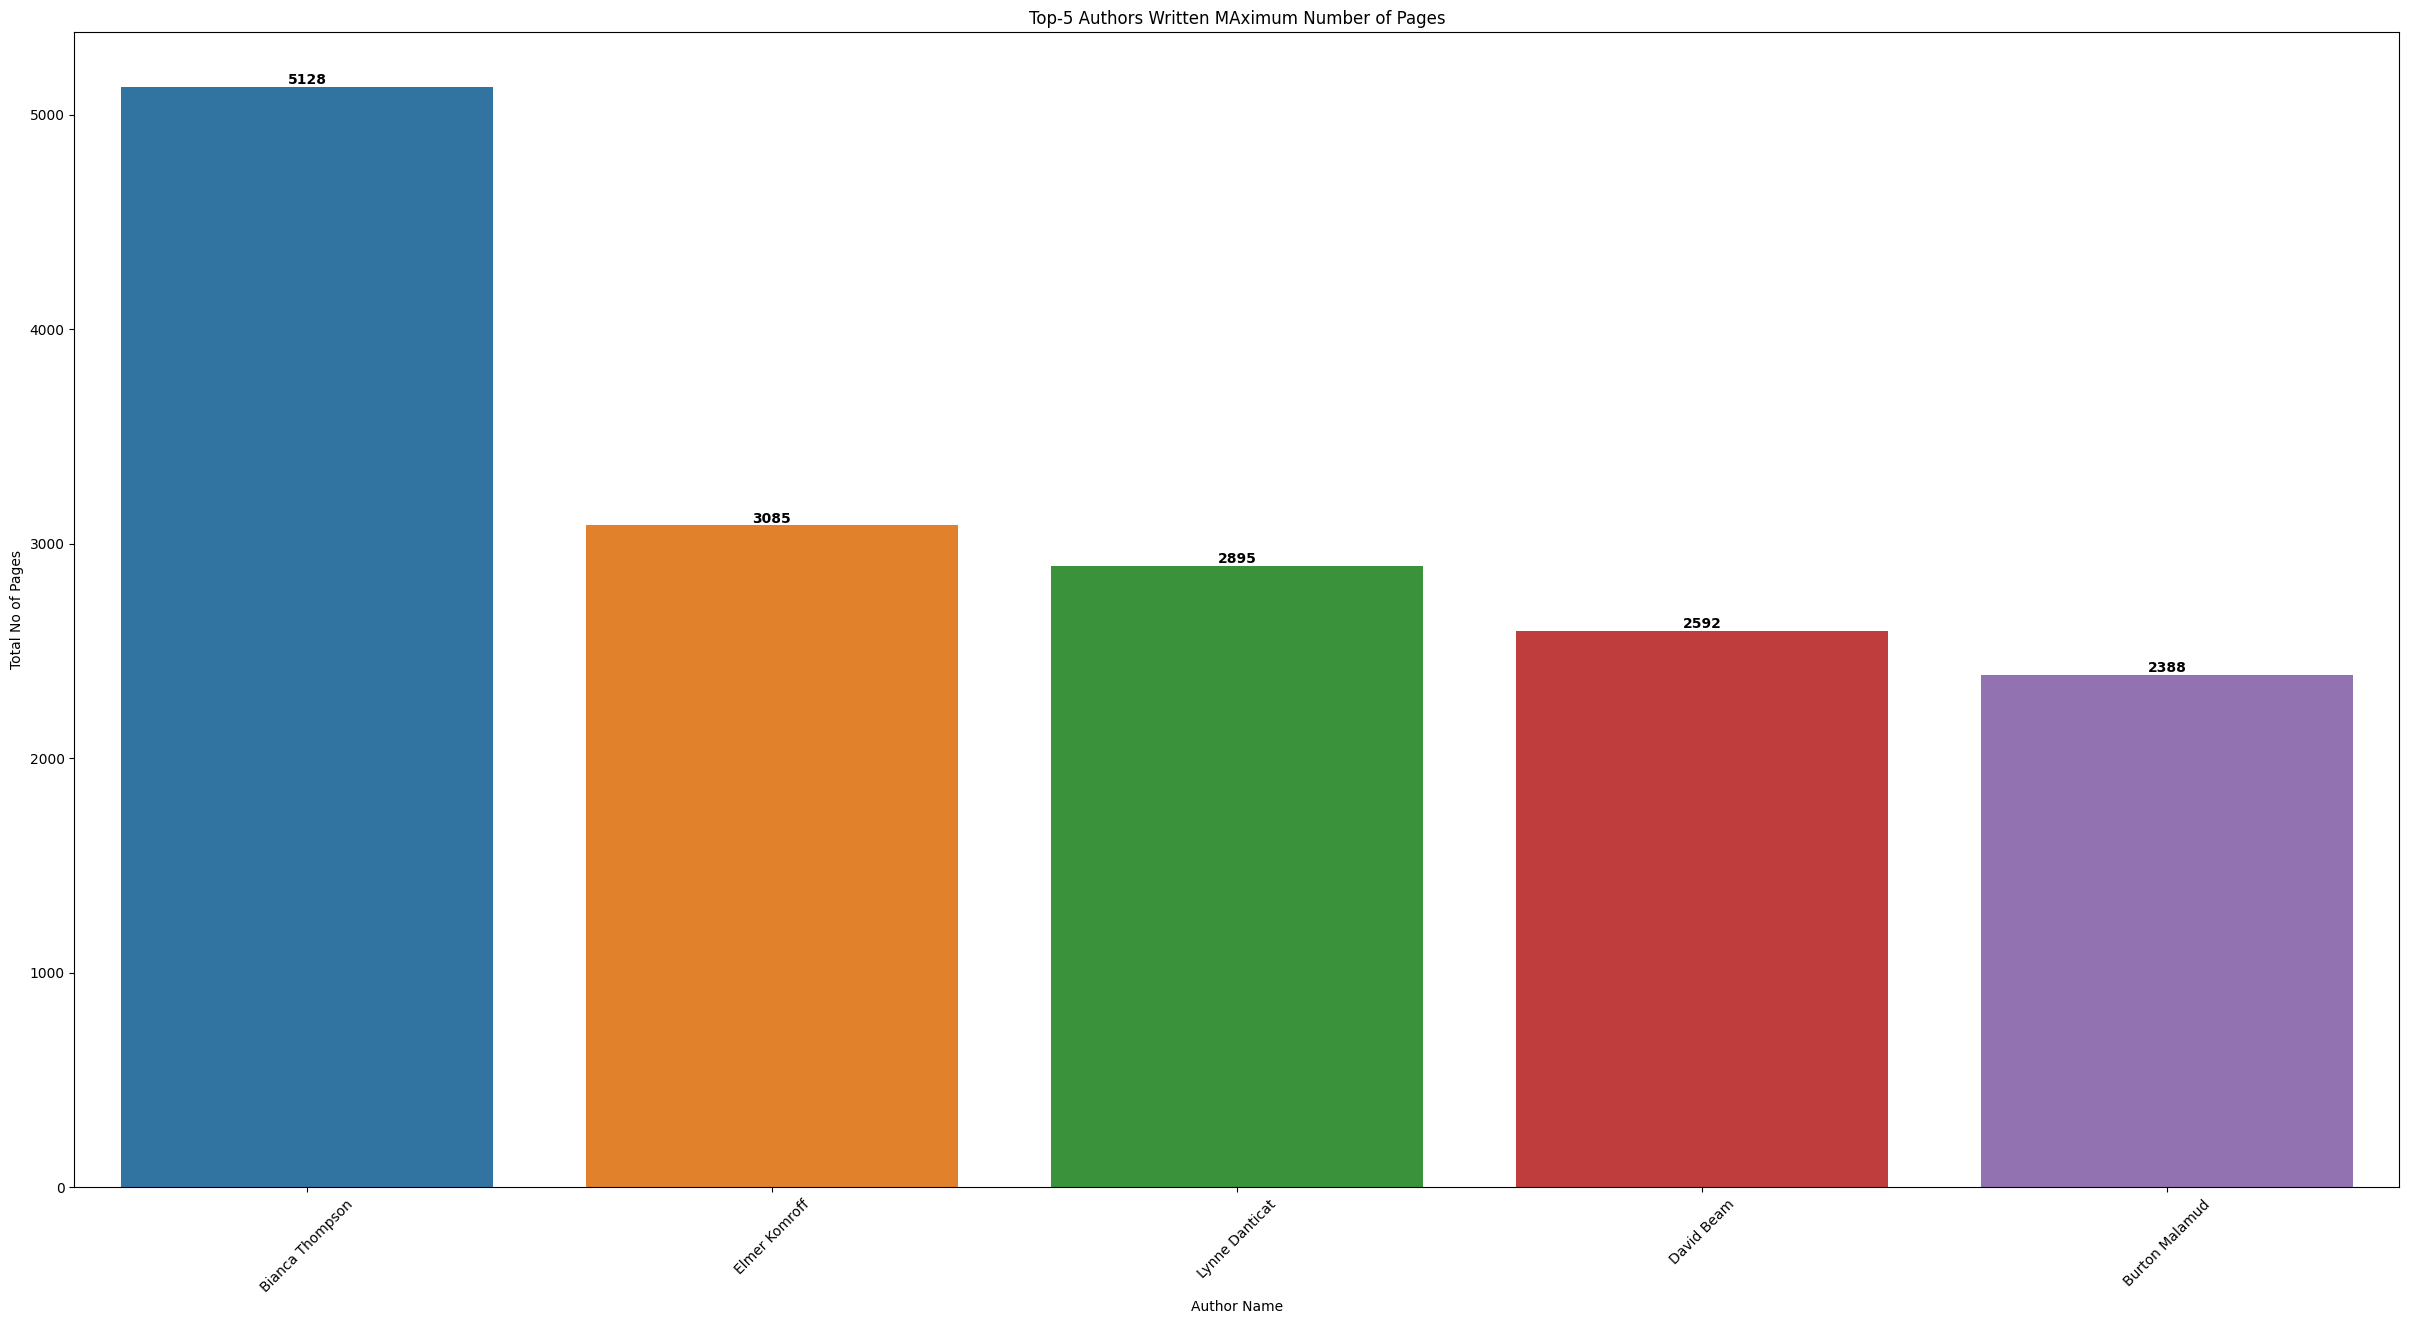

In [15]:
# 7.	Top 5 authors writing the highest total number of pages

DS7 = pd.merge(Book, Author, on="AuthID")
DS7 = pd.merge(DS7, Edition, on="BookID")
df7 = pd.DataFrame(DS7.groupby("Full_Name")["Pages"].sum().reset_index()).sort_values(
    by="Pages", ascending=False
)[:5]

plt.figure(figsize=(30, 15))
sns.barplot(x=df7["Full_Name"], y=df7["Pages"], hue=df7["Full_Name"])

for i, value in enumerate(df7["Pages"]):
    plt.text(i, value, str(value), ha="center", va="bottom", weight="bold")

plt.xlabel("Author Name")
plt.ylabel("Total No of Pages")
plt.title("Top-5 Authors Written MAximum Number of Pages")
plt.xticks(rotation=45)
plt.show()

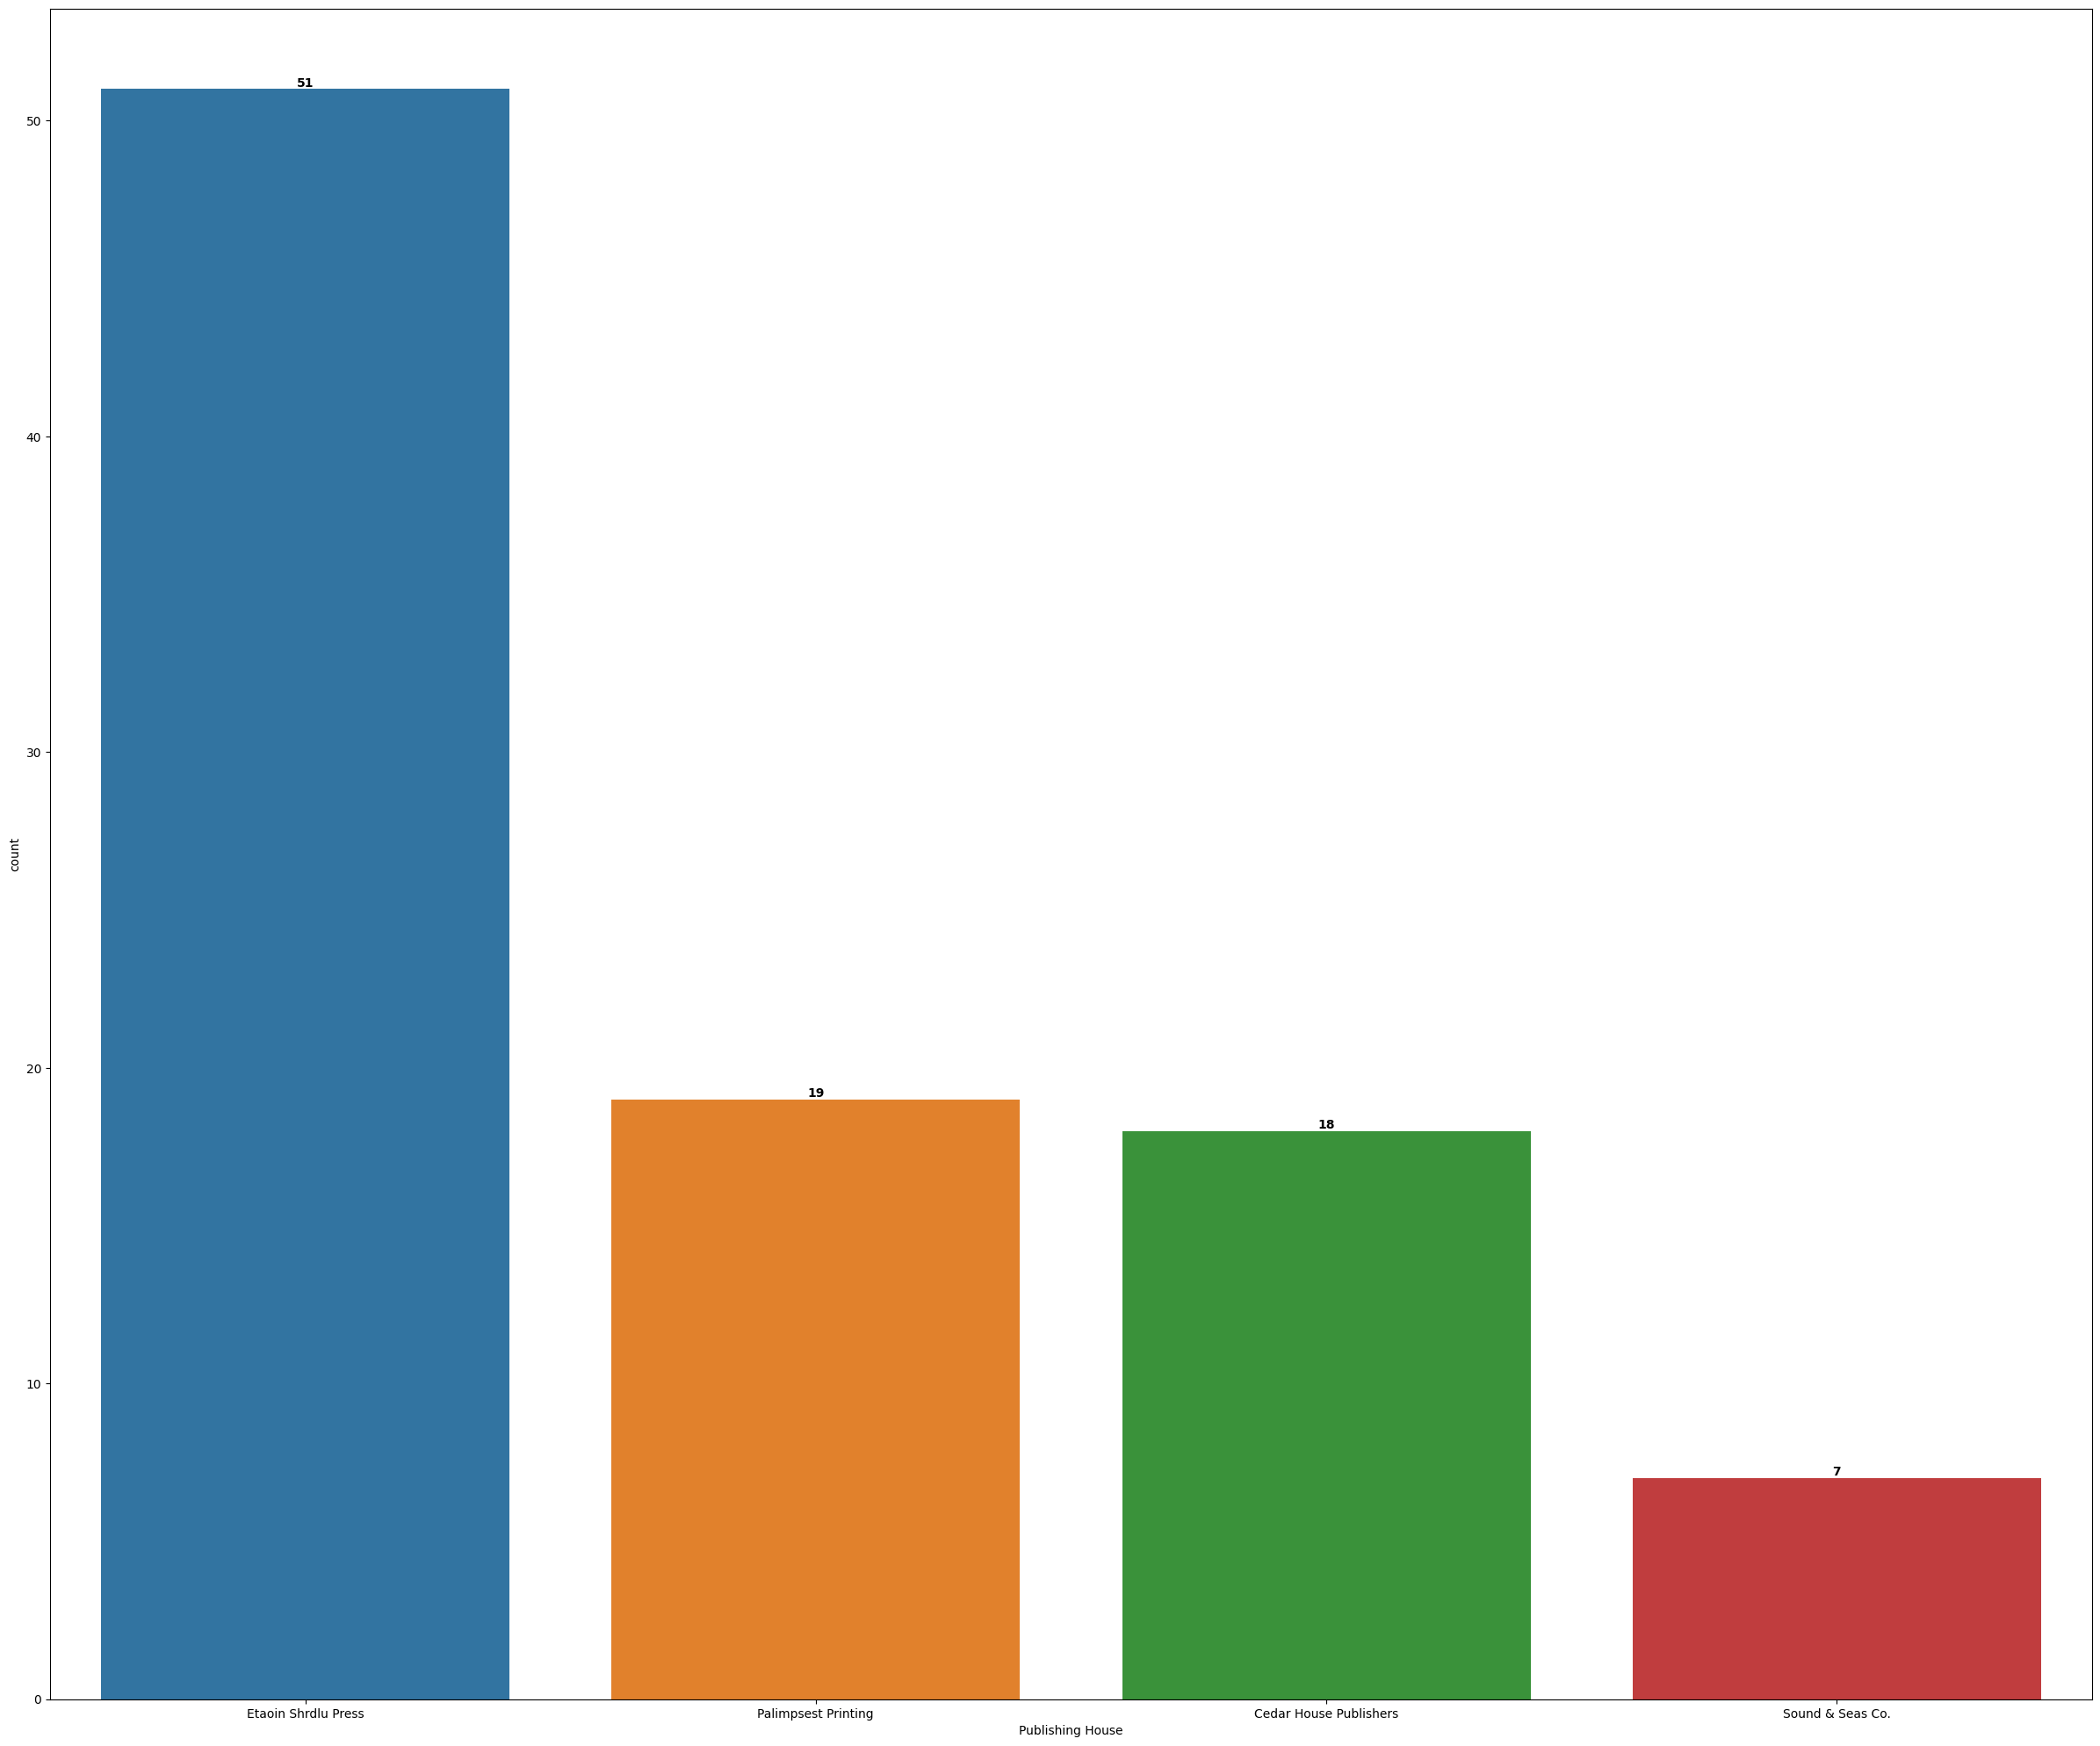

In [19]:
# 8. Top-5 Publication House (in terms of count of books published)

DS8 = pd.merge(Edition, Publisher, on="PubID")
df8 = DS8["Publishing House"].value_counts().reset_index()
plt.figure(figsize=(30, 25))
sns.barplot(data=df8, x="Publishing House", y="count", hue="Publishing House")
for i, value in enumerate(DS8["Publishing House"].value_counts()):
    plt.text(i, value, str(value), ha="center", va="bottom", weight="bold")

plt.show()

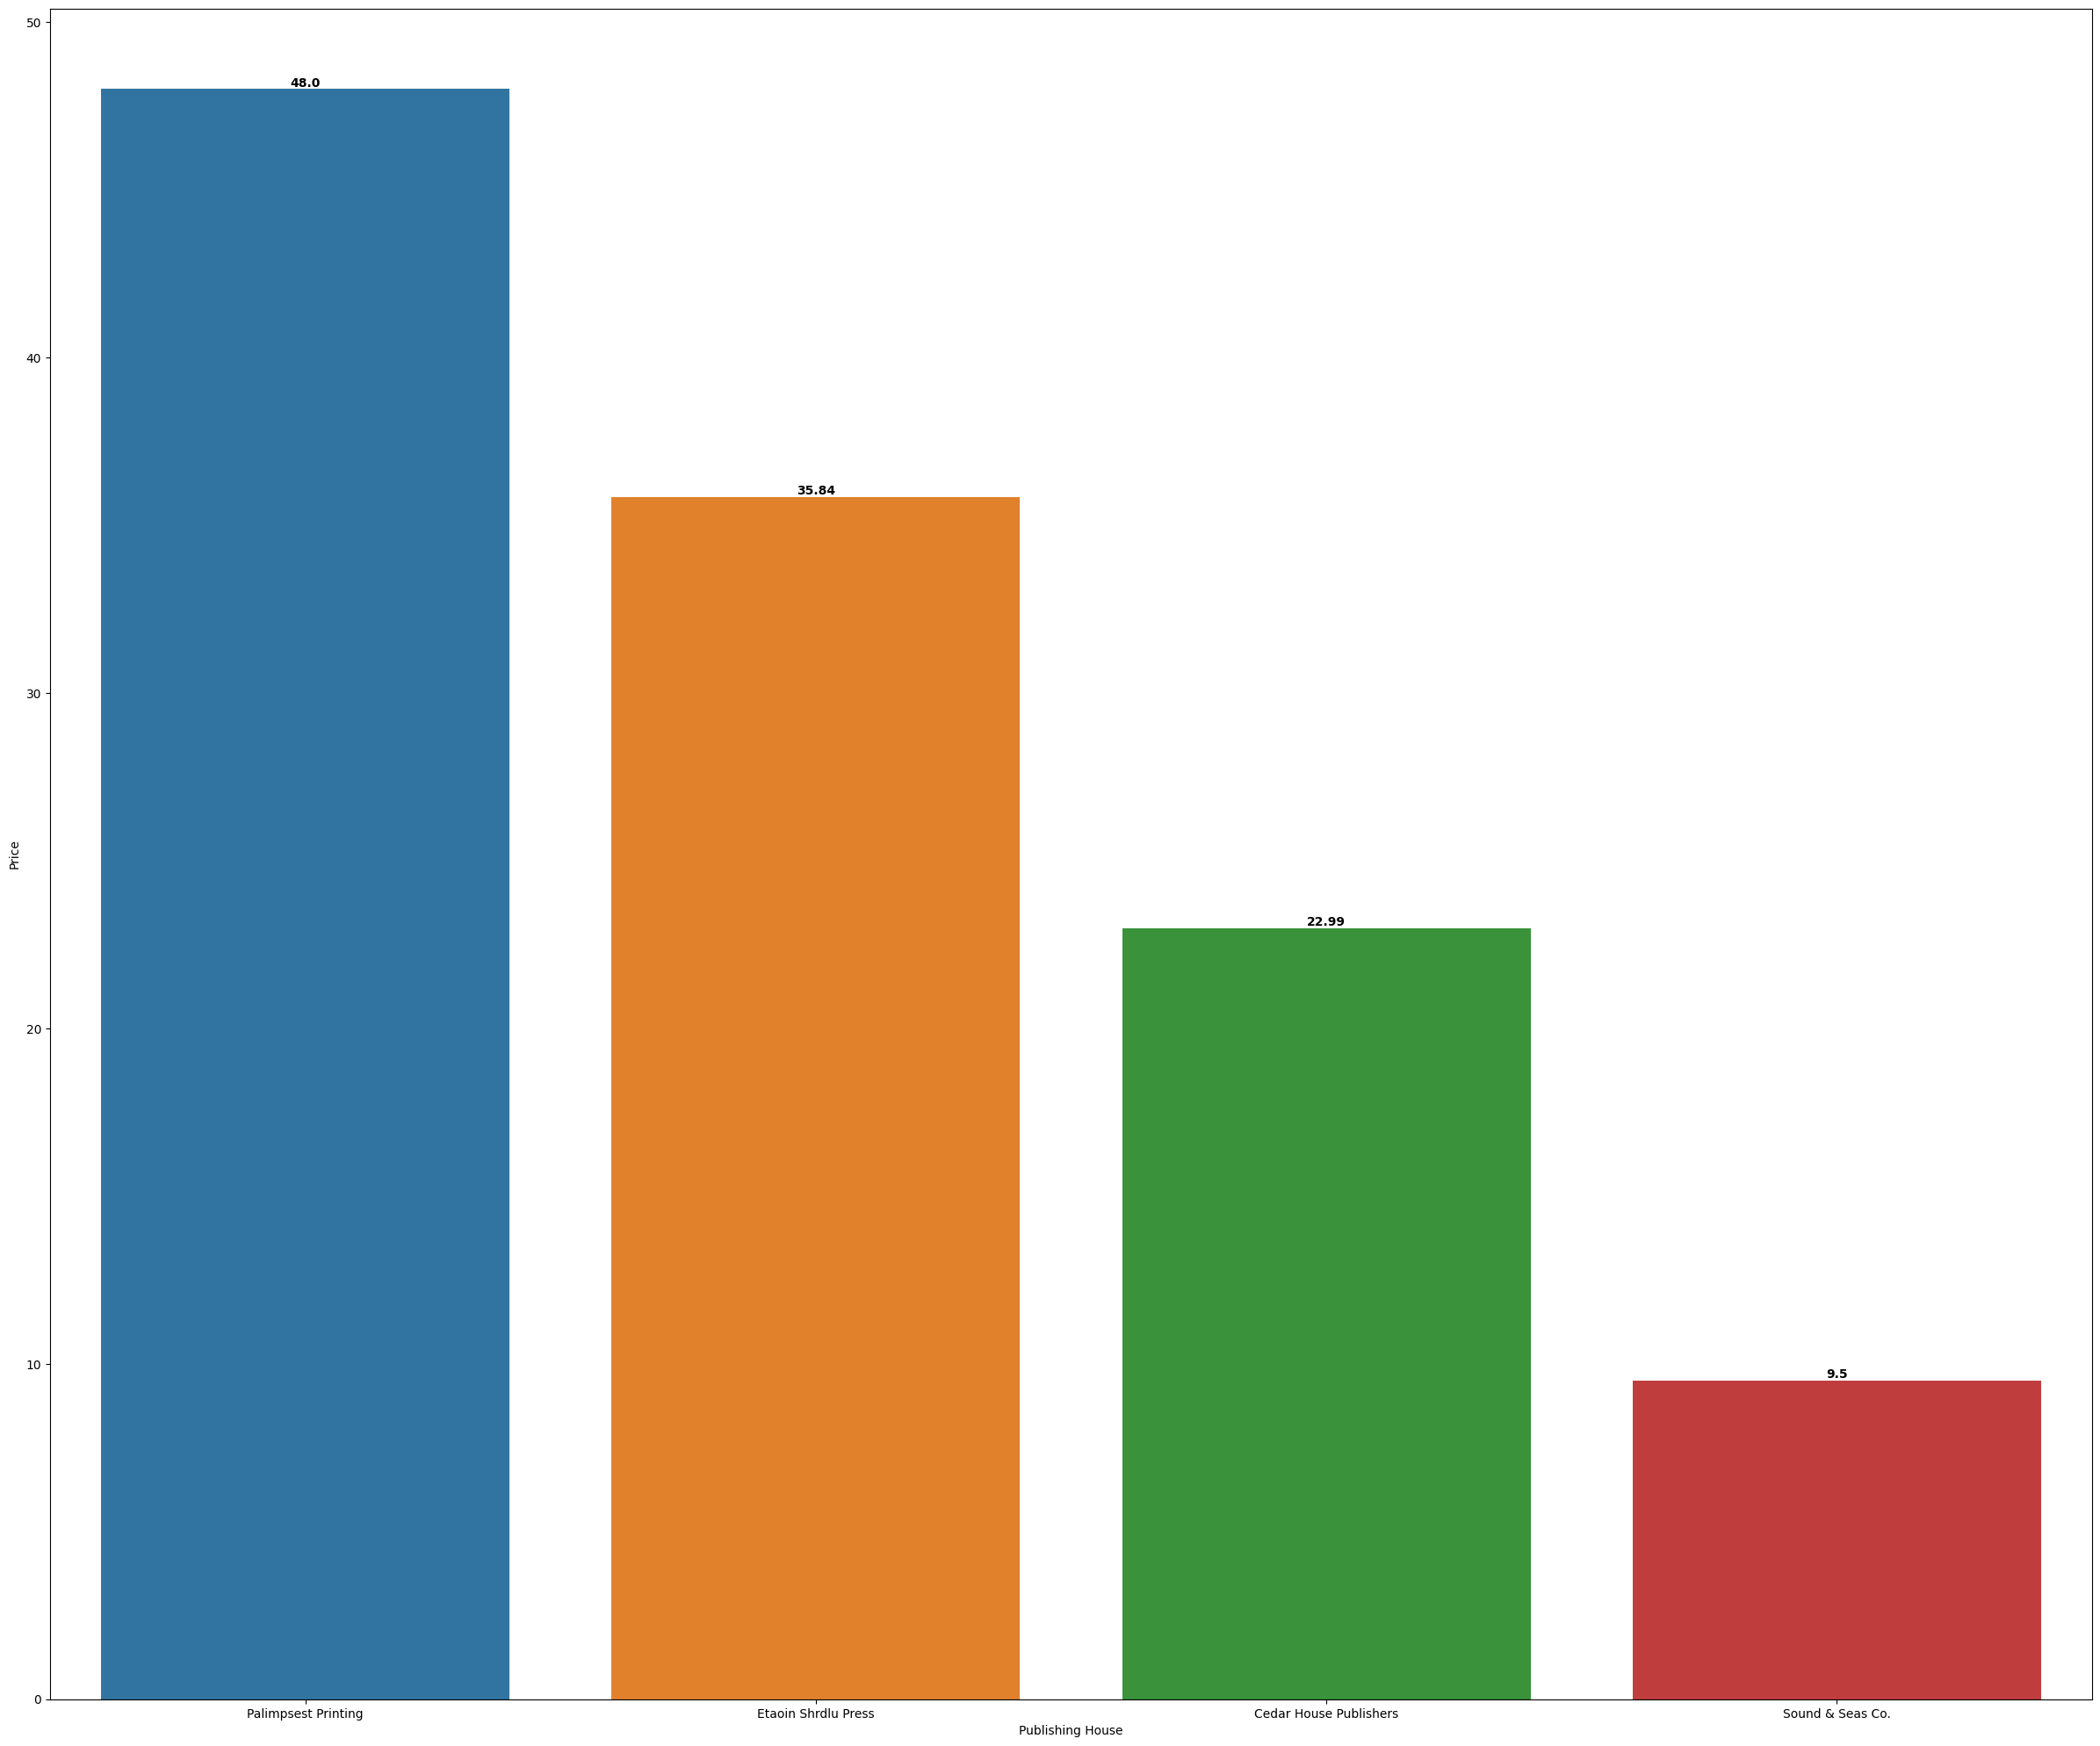

In [5]:
# 9.Top-5 publication house with highest-priced books

DS9 = pd.merge(Edition, Publisher, on="PubID")
df9 = pd.DataFrame(
    DS9.groupby("Publishing House")["Price"].max().reset_index()
).sort_values(by="Price" , ascending= False)

plt.figure(figsize=(30, 25))
sns.barplot(data= df9, x="Publishing House", y="Price", hue="Publishing House")
for i, value in enumerate(df9["Price"]):
    plt.text(i, value, str(value), ha="center", va="bottom", weight="bold")

plt.show()

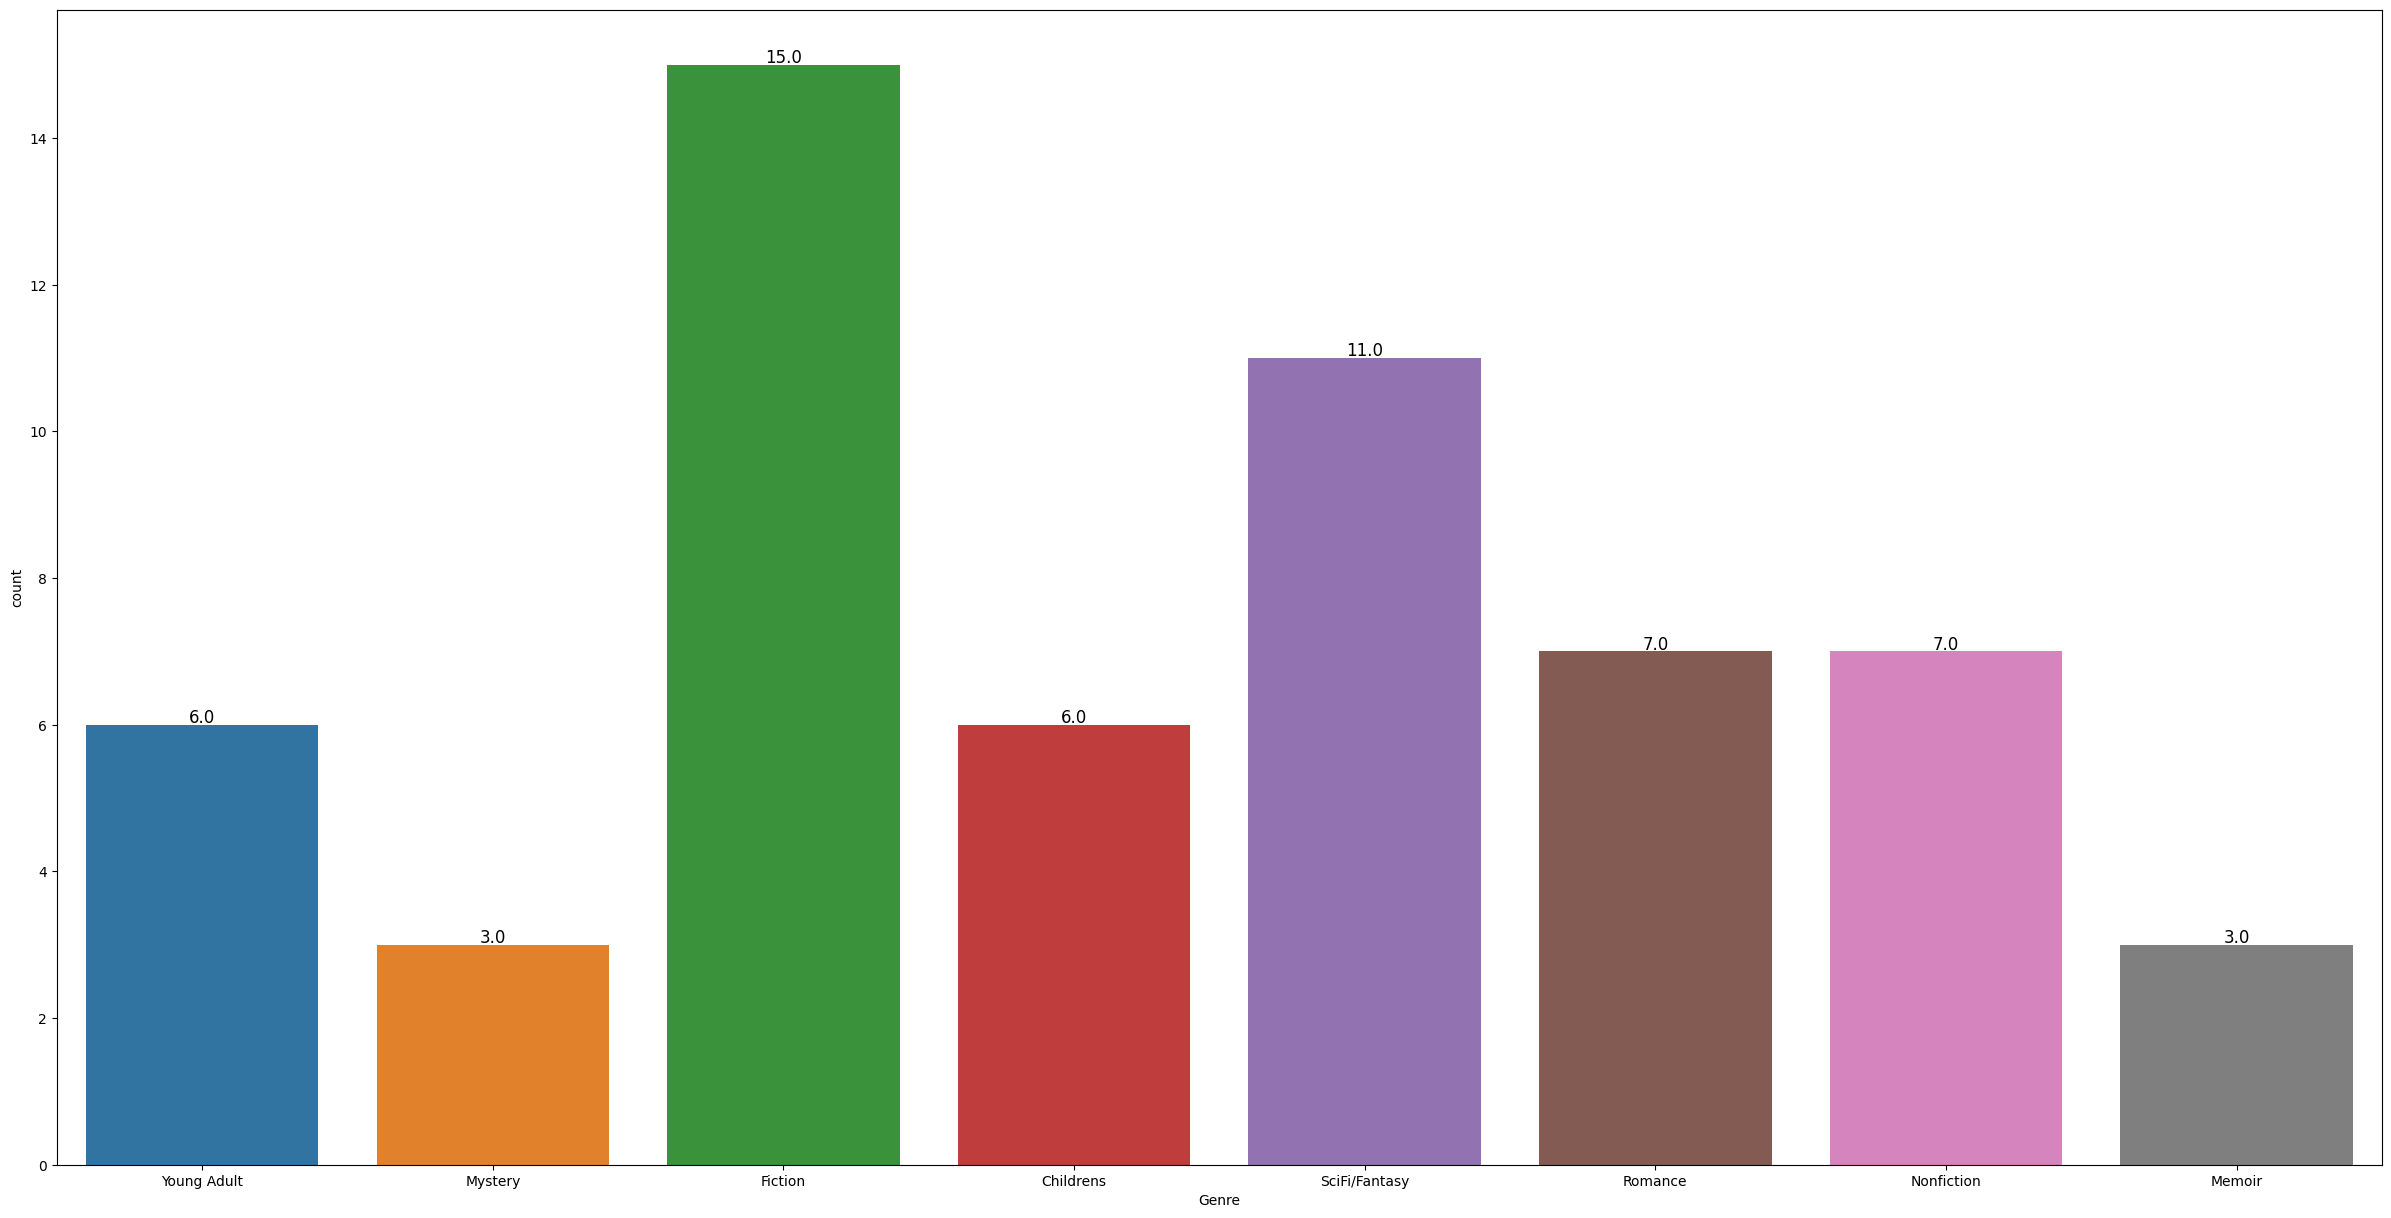

In [22]:
# 10.	Total number of books in each genre

plt.figure(figsize=(30, 15))
ax = sns.countplot(data=Info, x="Genre", hue="Genre")

for p in ax.patches:
    ax.annotate(f"{p.get_height()}",(p.get_x() + p.get_width() / 2.0, p.get_height()),ha="center",va="center",fontsize=12,color="black",xytext=(0, 5),textcoords="offset points",)

plt.show()

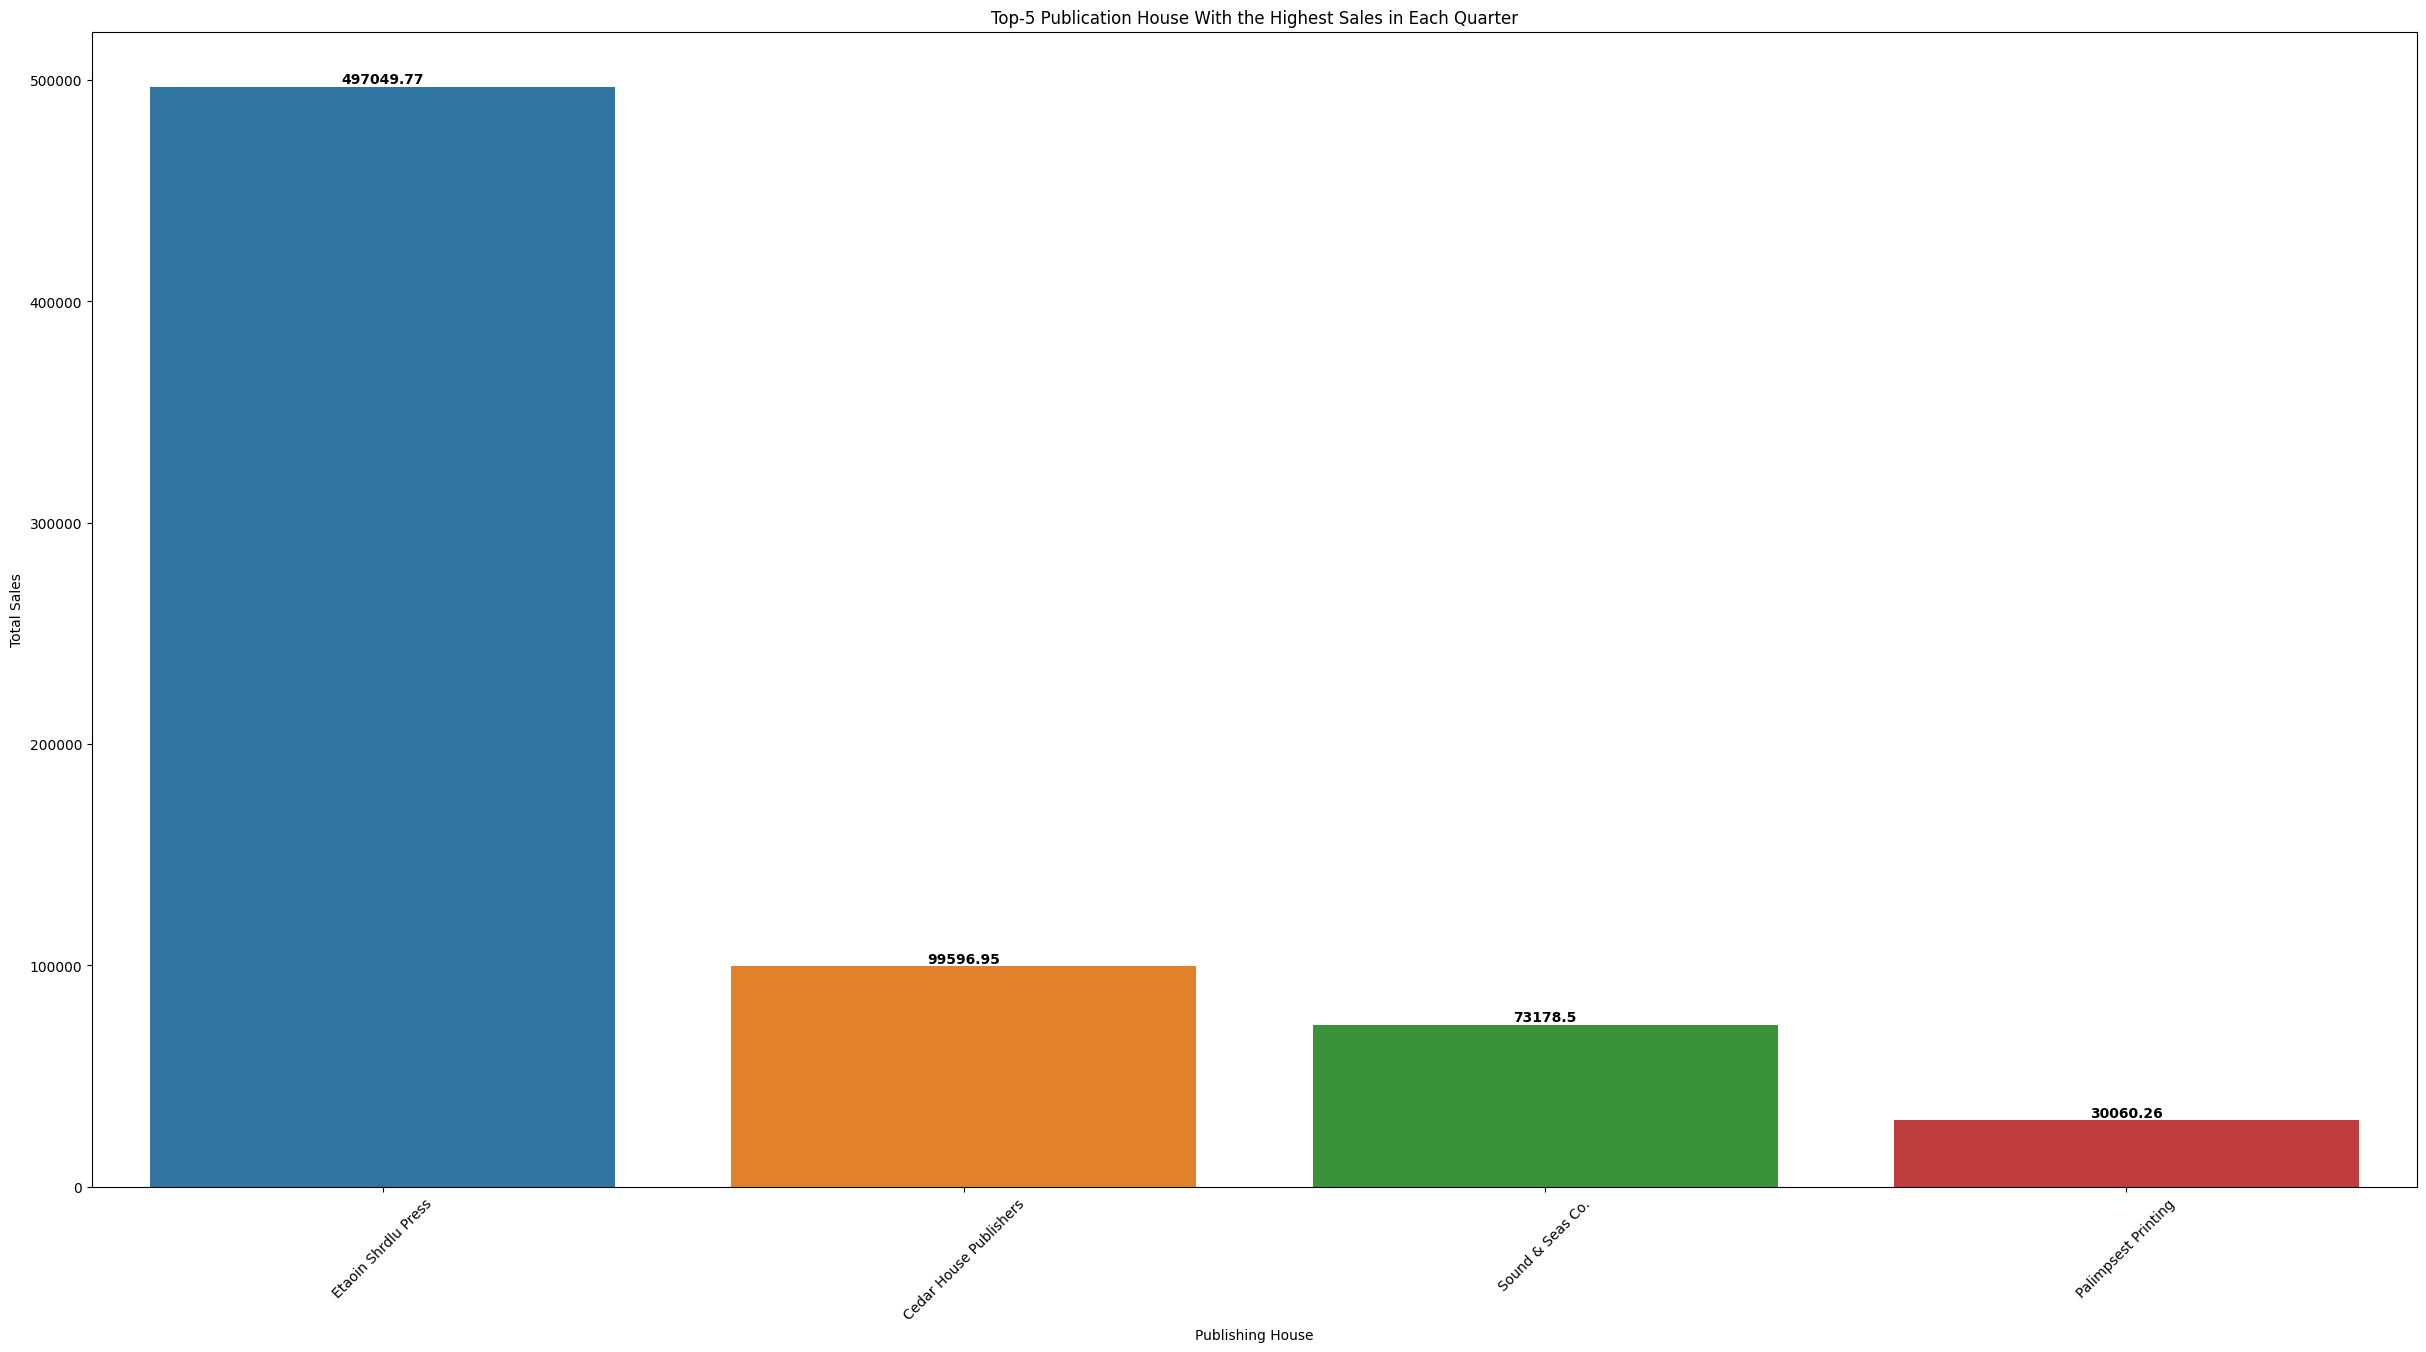

In [94]:
# 11.	Top-5 publication house with the highest sales in each quarter

DS11 = pd.concat([Sales_Q1.value_counts("ISBN").reset_index(),Sales_Q2.value_counts("ISBN").reset_index(),Sales_Q3.value_counts("ISBN").reset_index(),Sales_Q4.value_counts("ISBN").reset_index(),],ignore_index=True)
DS11 = pd.merge(DS11, Edition, on="ISBN")
DS11["Total Price"] = DS11["count"] * DS11["Price"]
DS11 = pd.merge(DS11, Publisher, on="PubID")
df11 = pd.DataFrame(DS11.groupby("Publishing House")["Total Price"].sum()).reset_index().sort_values(by = "Total Price" , ascending= False)

plt.figure(figsize=(30, 15))
sns.barplot(
    x=df11["Publishing House"], y=df11["Total Price"], hue=df11["Publishing House"]
)

for i, value in enumerate(df11["Total Price"]):
    plt.text(i, value, str(value), ha="center", va="bottom", weight="bold")

plt.xlabel("Publishing House")
plt.ylabel("Total Sales")
plt.title("Top-5 Publication House With the Highest Sales in Each Quarter")
plt.xticks(rotation=45)
plt.show()

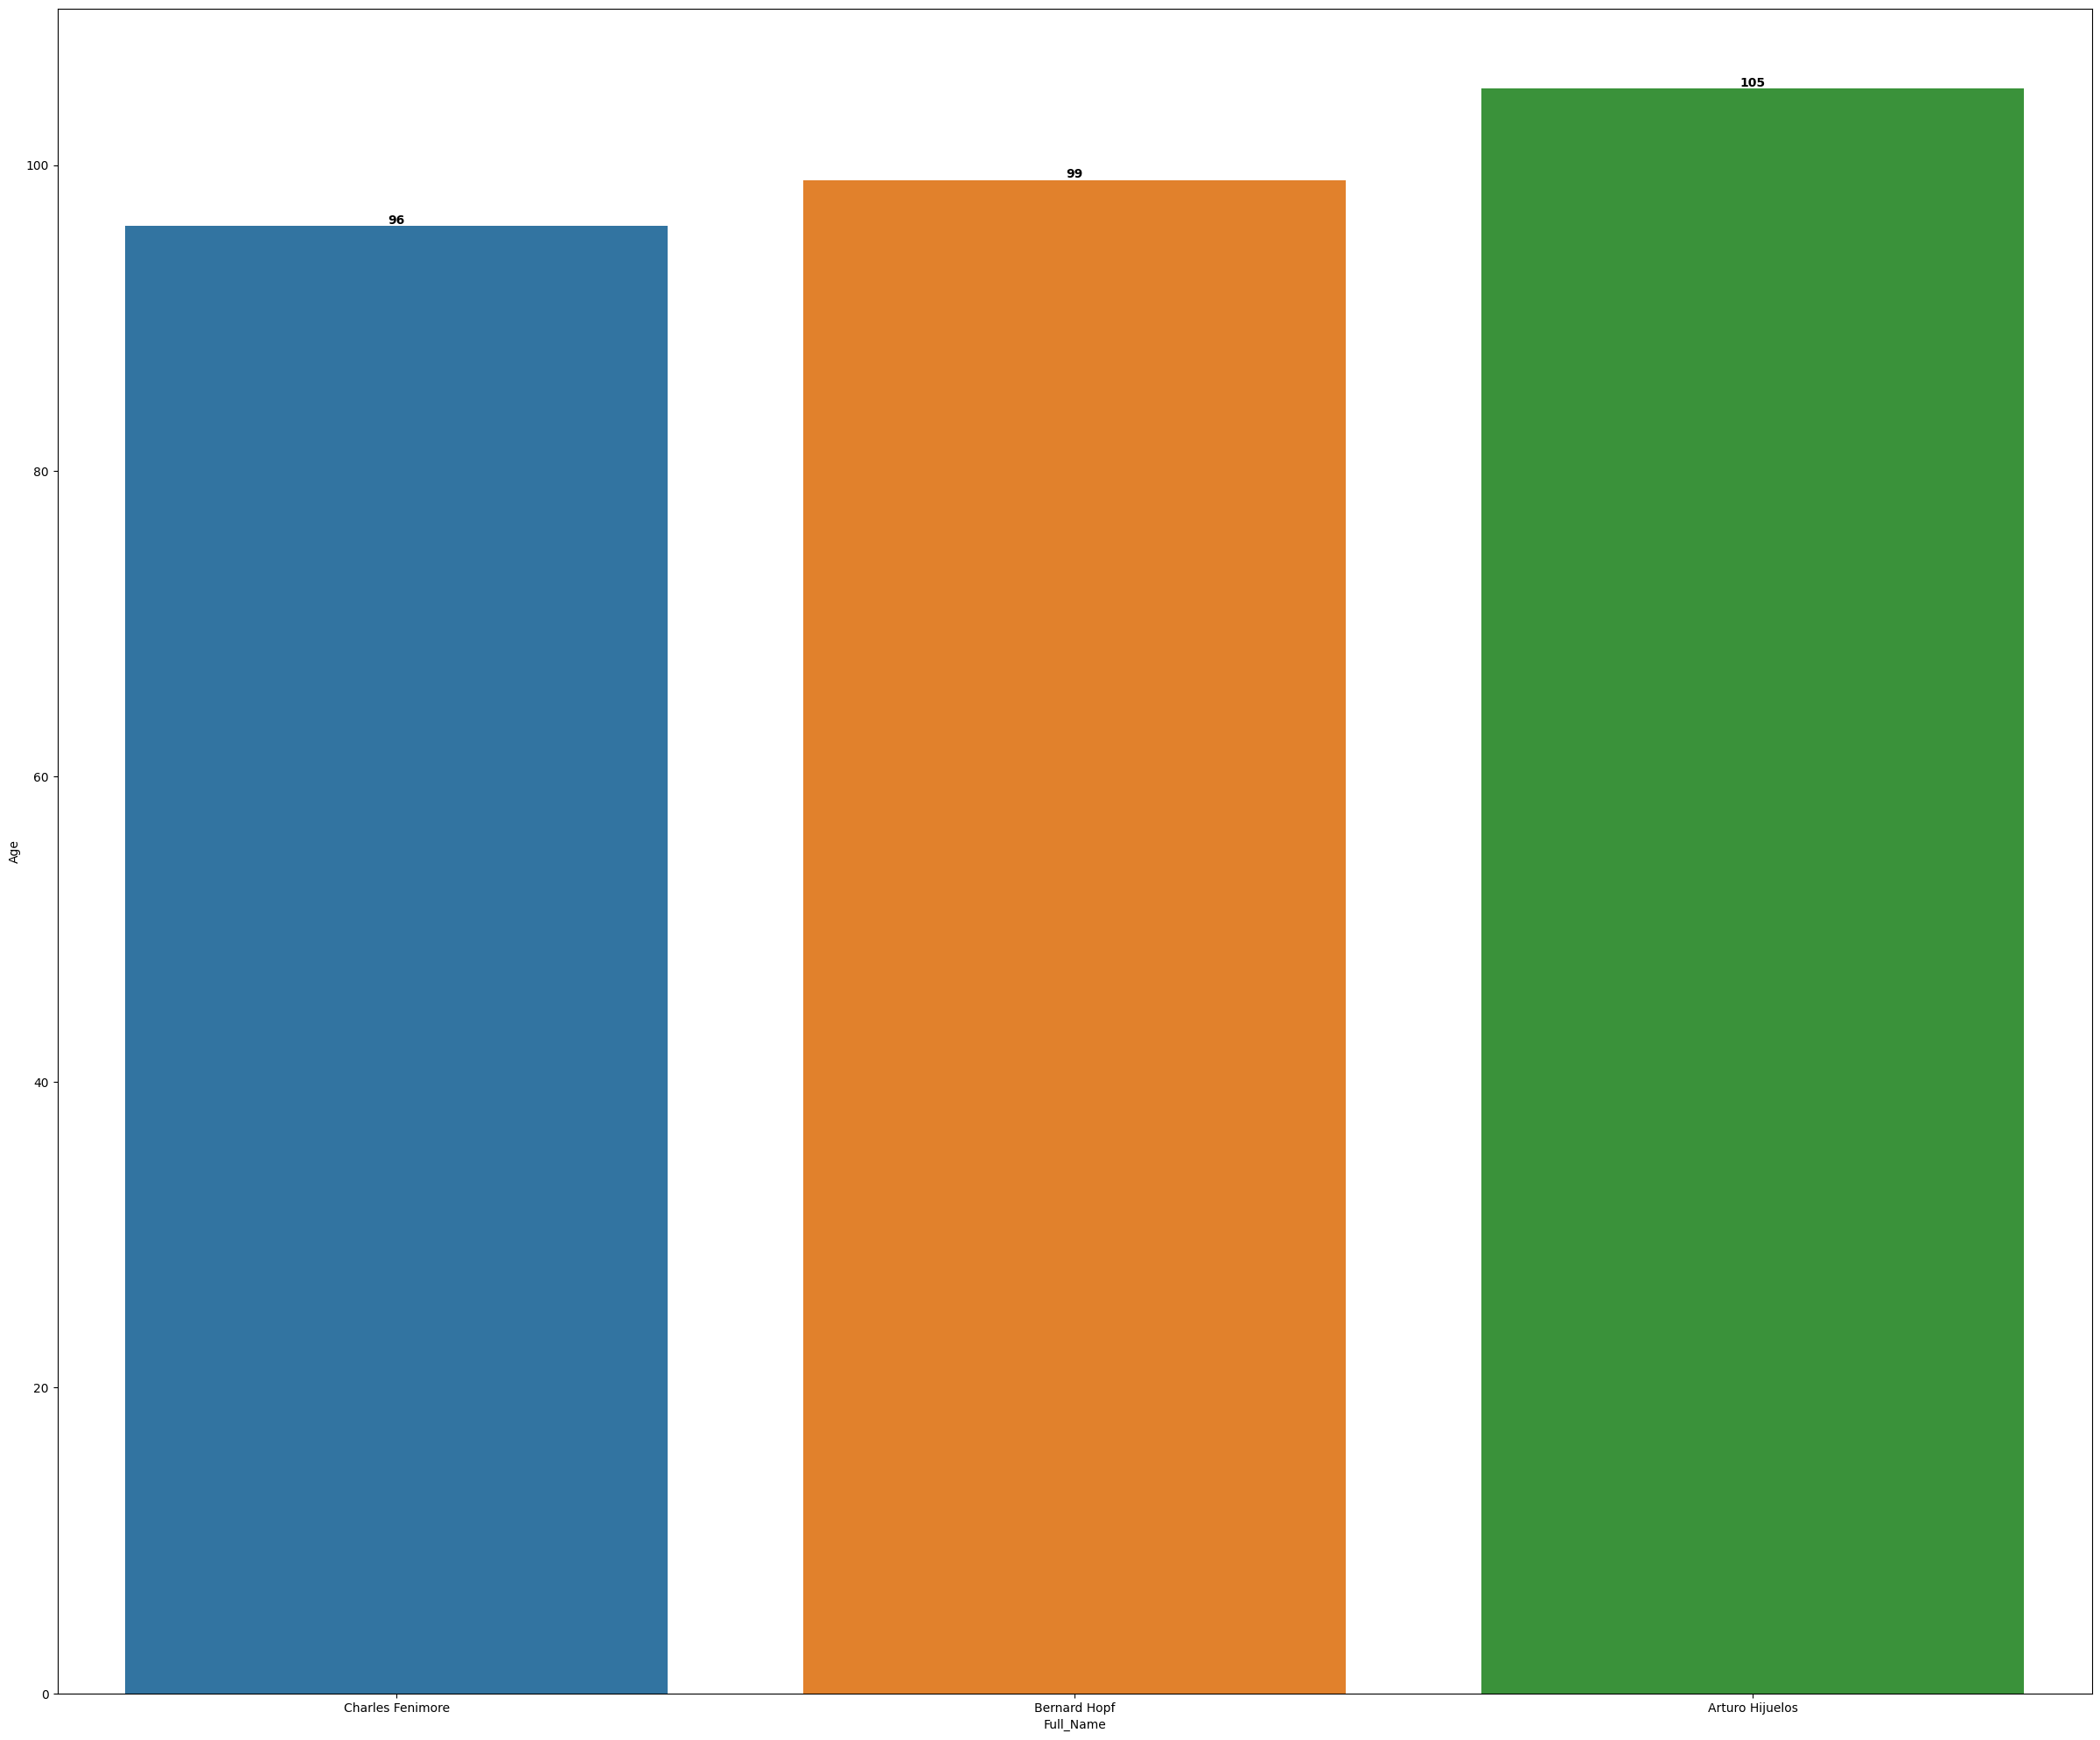

In [34]:
# 12. Top-3 youngest authors

from datetime import datetime
df12 = Author

def calculate_age(birthdate):
    current_date = datetime.now()
    age = (
        current_date.year
        - birthdate.year
        - ((current_date.month, current_date.day) < (birthdate.month, birthdate.day))
    )
    return age

df12["Age"] = (df12["Birthday"].apply(calculate_age))*-1
df12 = df12[["Full_Name", "Age"]]
df12 = df12.sort_values(by="Age" , ascending=True)[:3]

plt.figure(figsize=(30, 25))
sns.barplot(data=df12, x="Full_Name", y="Age", hue="Full_Name")
for i, value in enumerate(df12["Age"]):
    plt.text(i, value, str(value), ha="center", va="bottom", weight="bold")

plt.show()

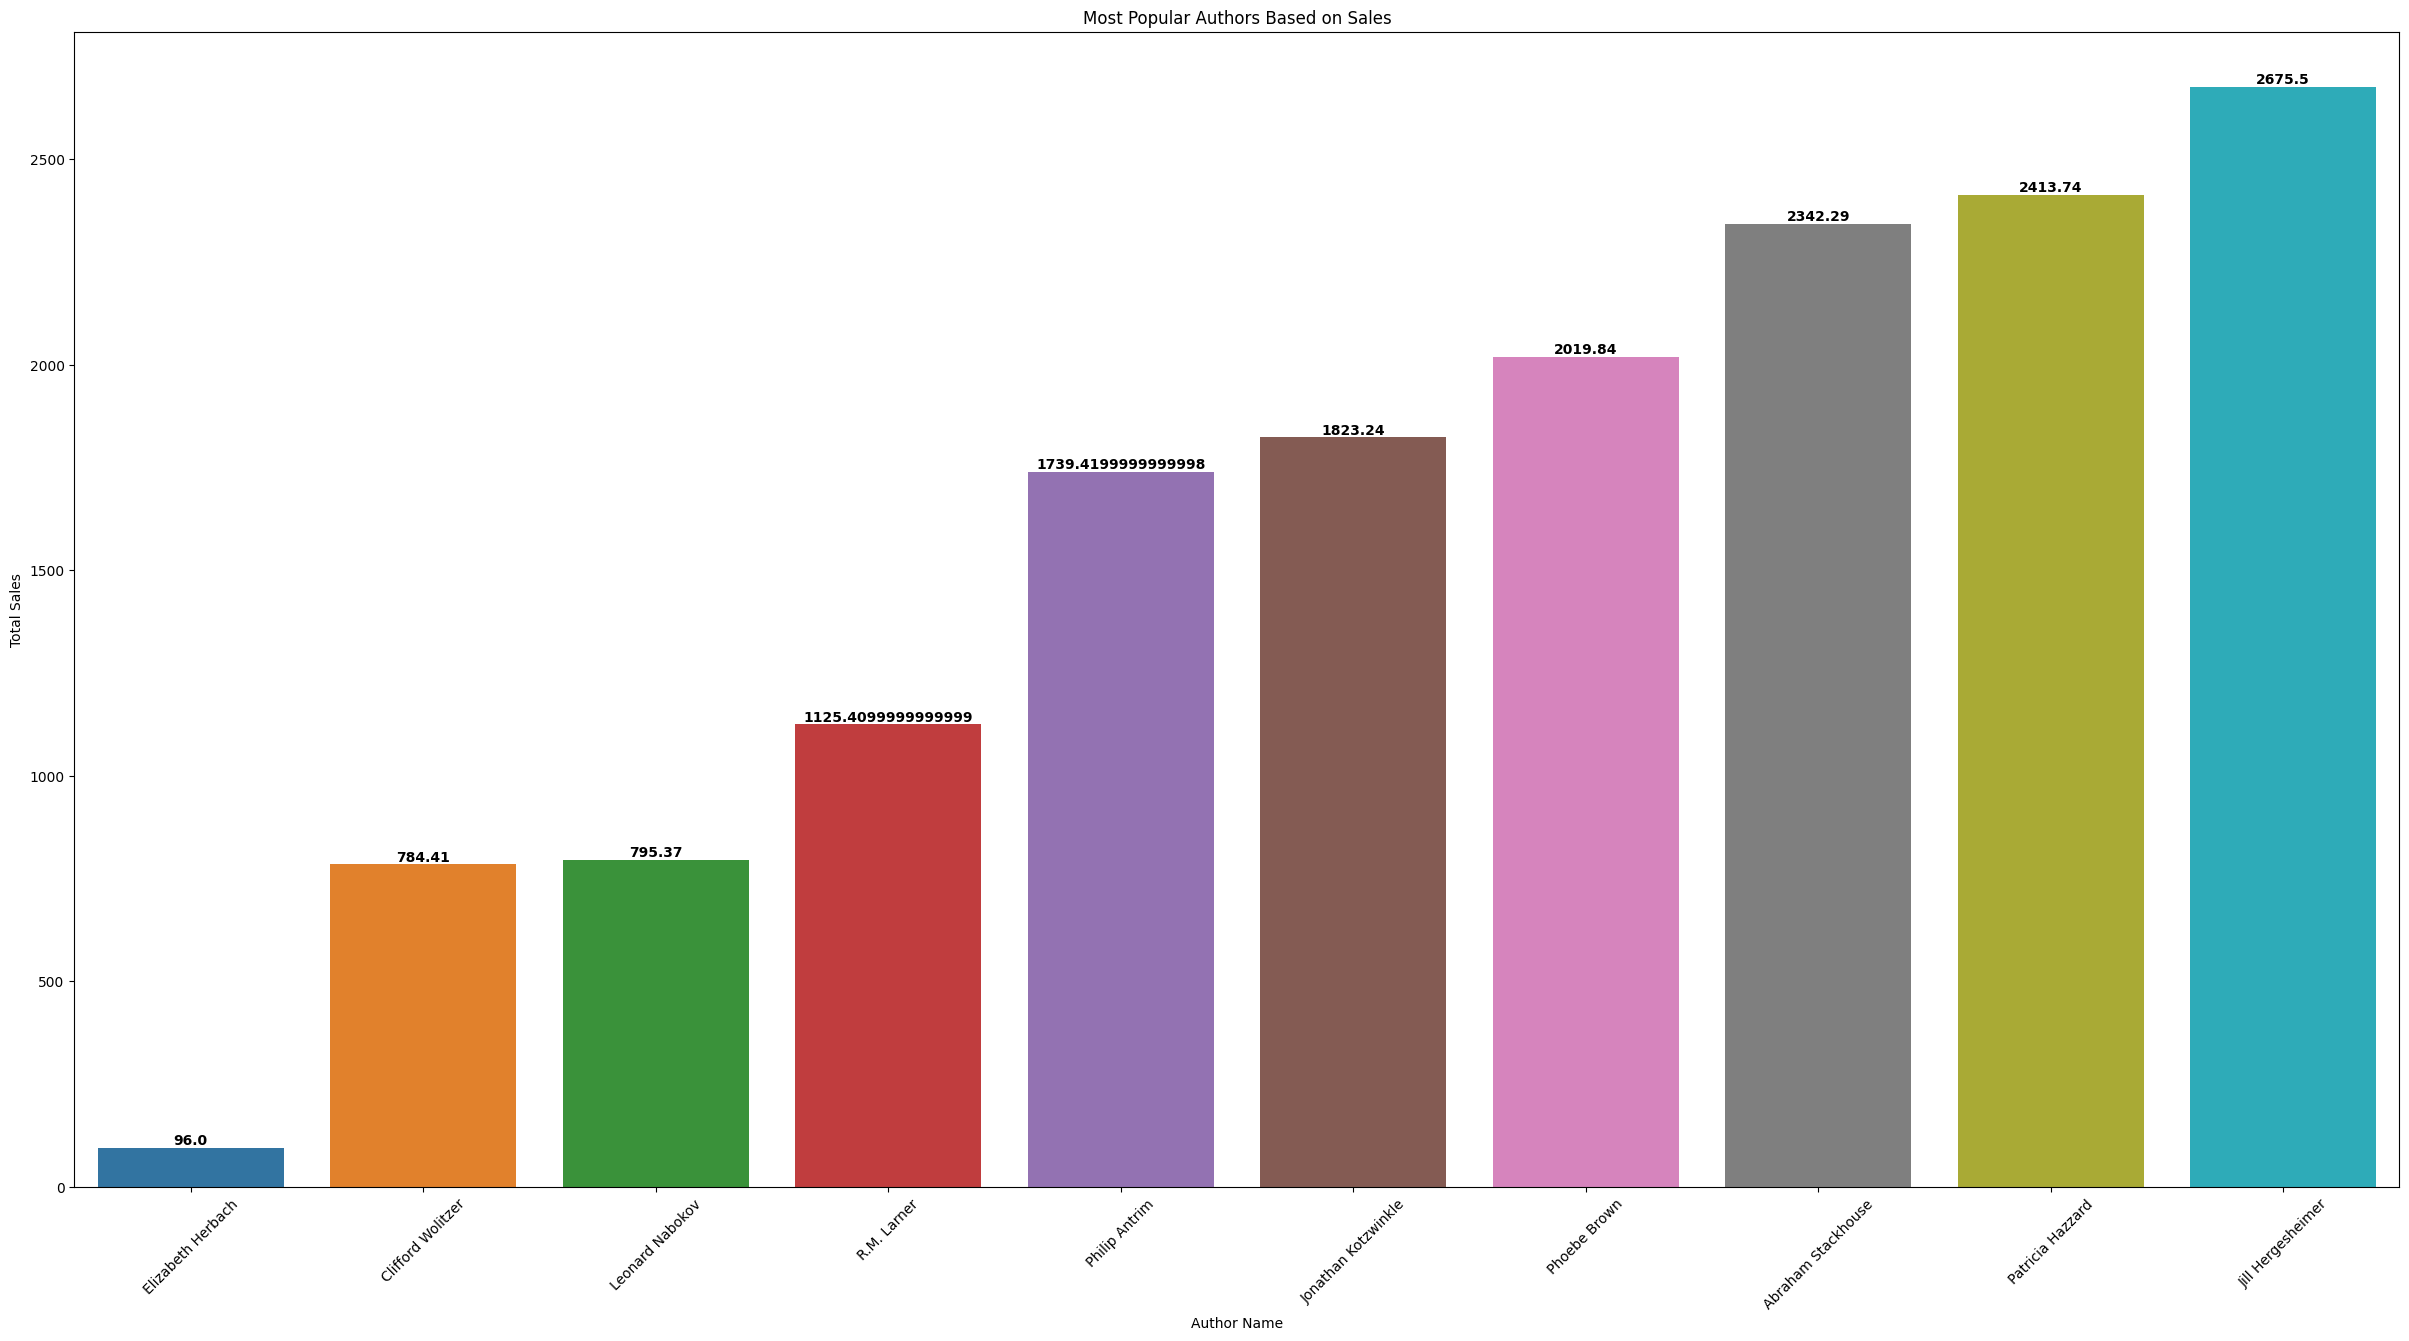

In [38]:
# 13.	Whose (Author) book is least read by the readers

Sales = pd.concat([Sales_Q1.value_counts("ISBN").reset_index(),Sales_Q2.value_counts("ISBN").reset_index(),Sales_Q3.value_counts("ISBN").reset_index(),Sales_Q4.value_counts('ISBN').reset_index(),],ignore_index=True,)
Sales = pd.merge(Sales , Edition , on="ISBN")
Sales['Total Price'] = Sales['count'] * Sales['Price']
Sales = Sales[['ISBN' , 'Total Price']].sort_values(by='Total Price' , ascending=False)

DS1A = pd.merge(Book, Edition, on="BookID")
DS1A = pd.merge(DS1A, Author, on="AuthID")
DS1A = pd.merge(DS1A, Sales , on="ISBN")
DS1A = DS1A.groupby('Full_Name')['Total Price'].sum().reset_index().sort_values(by="Total Price", ascending=True)[:10]
df1a = DS1A

plt.figure(figsize=(30, 15))
sns.barplot(x=df1a["Full_Name"], y=df1a["Total Price"], hue=df1a["Full_Name"])

for i, value in enumerate(df1a["Total Price"]):
    plt.text(i, value, str(value), ha="center", va="bottom", weight="bold")

plt.xlabel("Author Name")
plt.ylabel("Total Sales")
plt.title("Most Popular Authors Based on Sales")
plt.xticks(rotation=45)
plt.show()

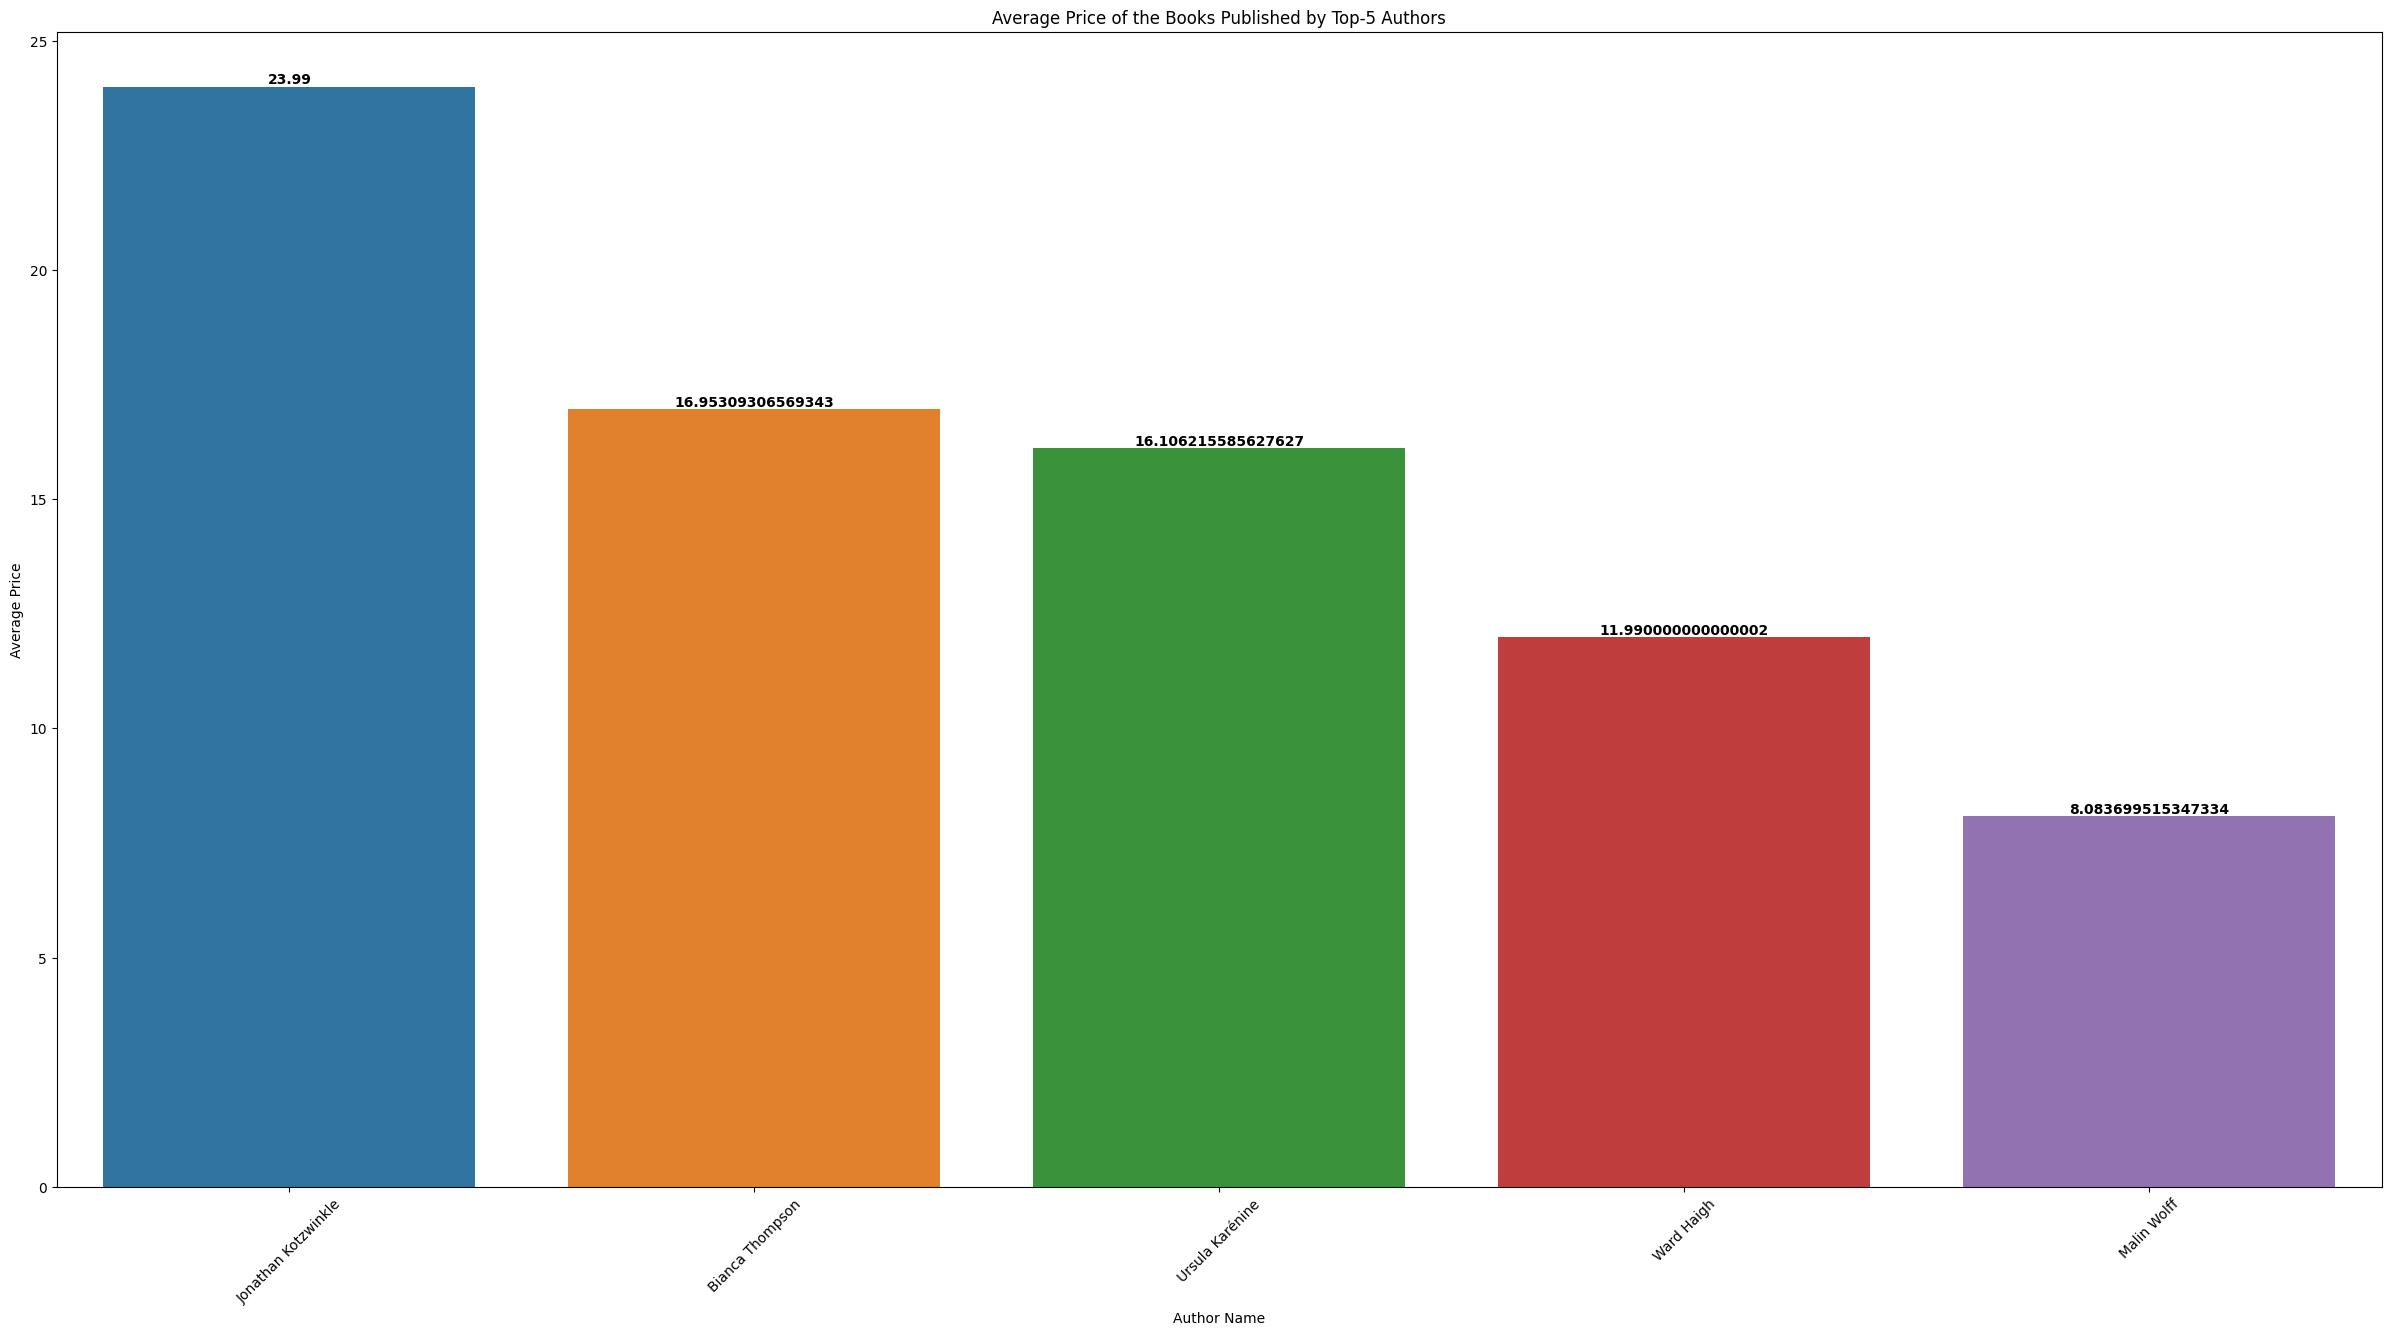

In [95]:
# 14.	Average price of the books published by top-5 authors (in terms of their published books)

DS14 = pd.merge(Author, Book, on="AuthID")
DS14 = pd.merge(DS14, Ratings, on="BookID")
DS14 = pd.merge(DS14, Edition, on="BookID")
DS14["Full_Name"] = DS14["First Name"] + " " + DS14["Last Name"]

Top_Authors = list(
    (
        DS14.groupby("Full_Name")["Rating"]
        .mean()
        .reset_index()
        .sort_values(by="Rating", ascending=False)
    )["Full_Name"][:5]
)

DS14 = DS14[DS14["Full_Name"].isin(Top_Authors)]
df14 = pd.DataFrame(DS14.groupby("Full_Name")['Price'].mean()).reset_index().sort_values(by = 'Price' , ascending=False)

plt.figure(figsize=(30, 15))
sns.barplot(x=df14["Full_Name"], y=df14["Price"], hue=df14["Full_Name"])

for i, value in enumerate(df14["Price"]):
    plt.text(i, value, str(value), ha="center", va="bottom", weight="bold")

plt.xlabel("Author Name")
plt.ylabel("Average Price")
plt.title("Average Price of the Books Published by Top-5 Authors")
plt.xticks(rotation=45)
plt.show()

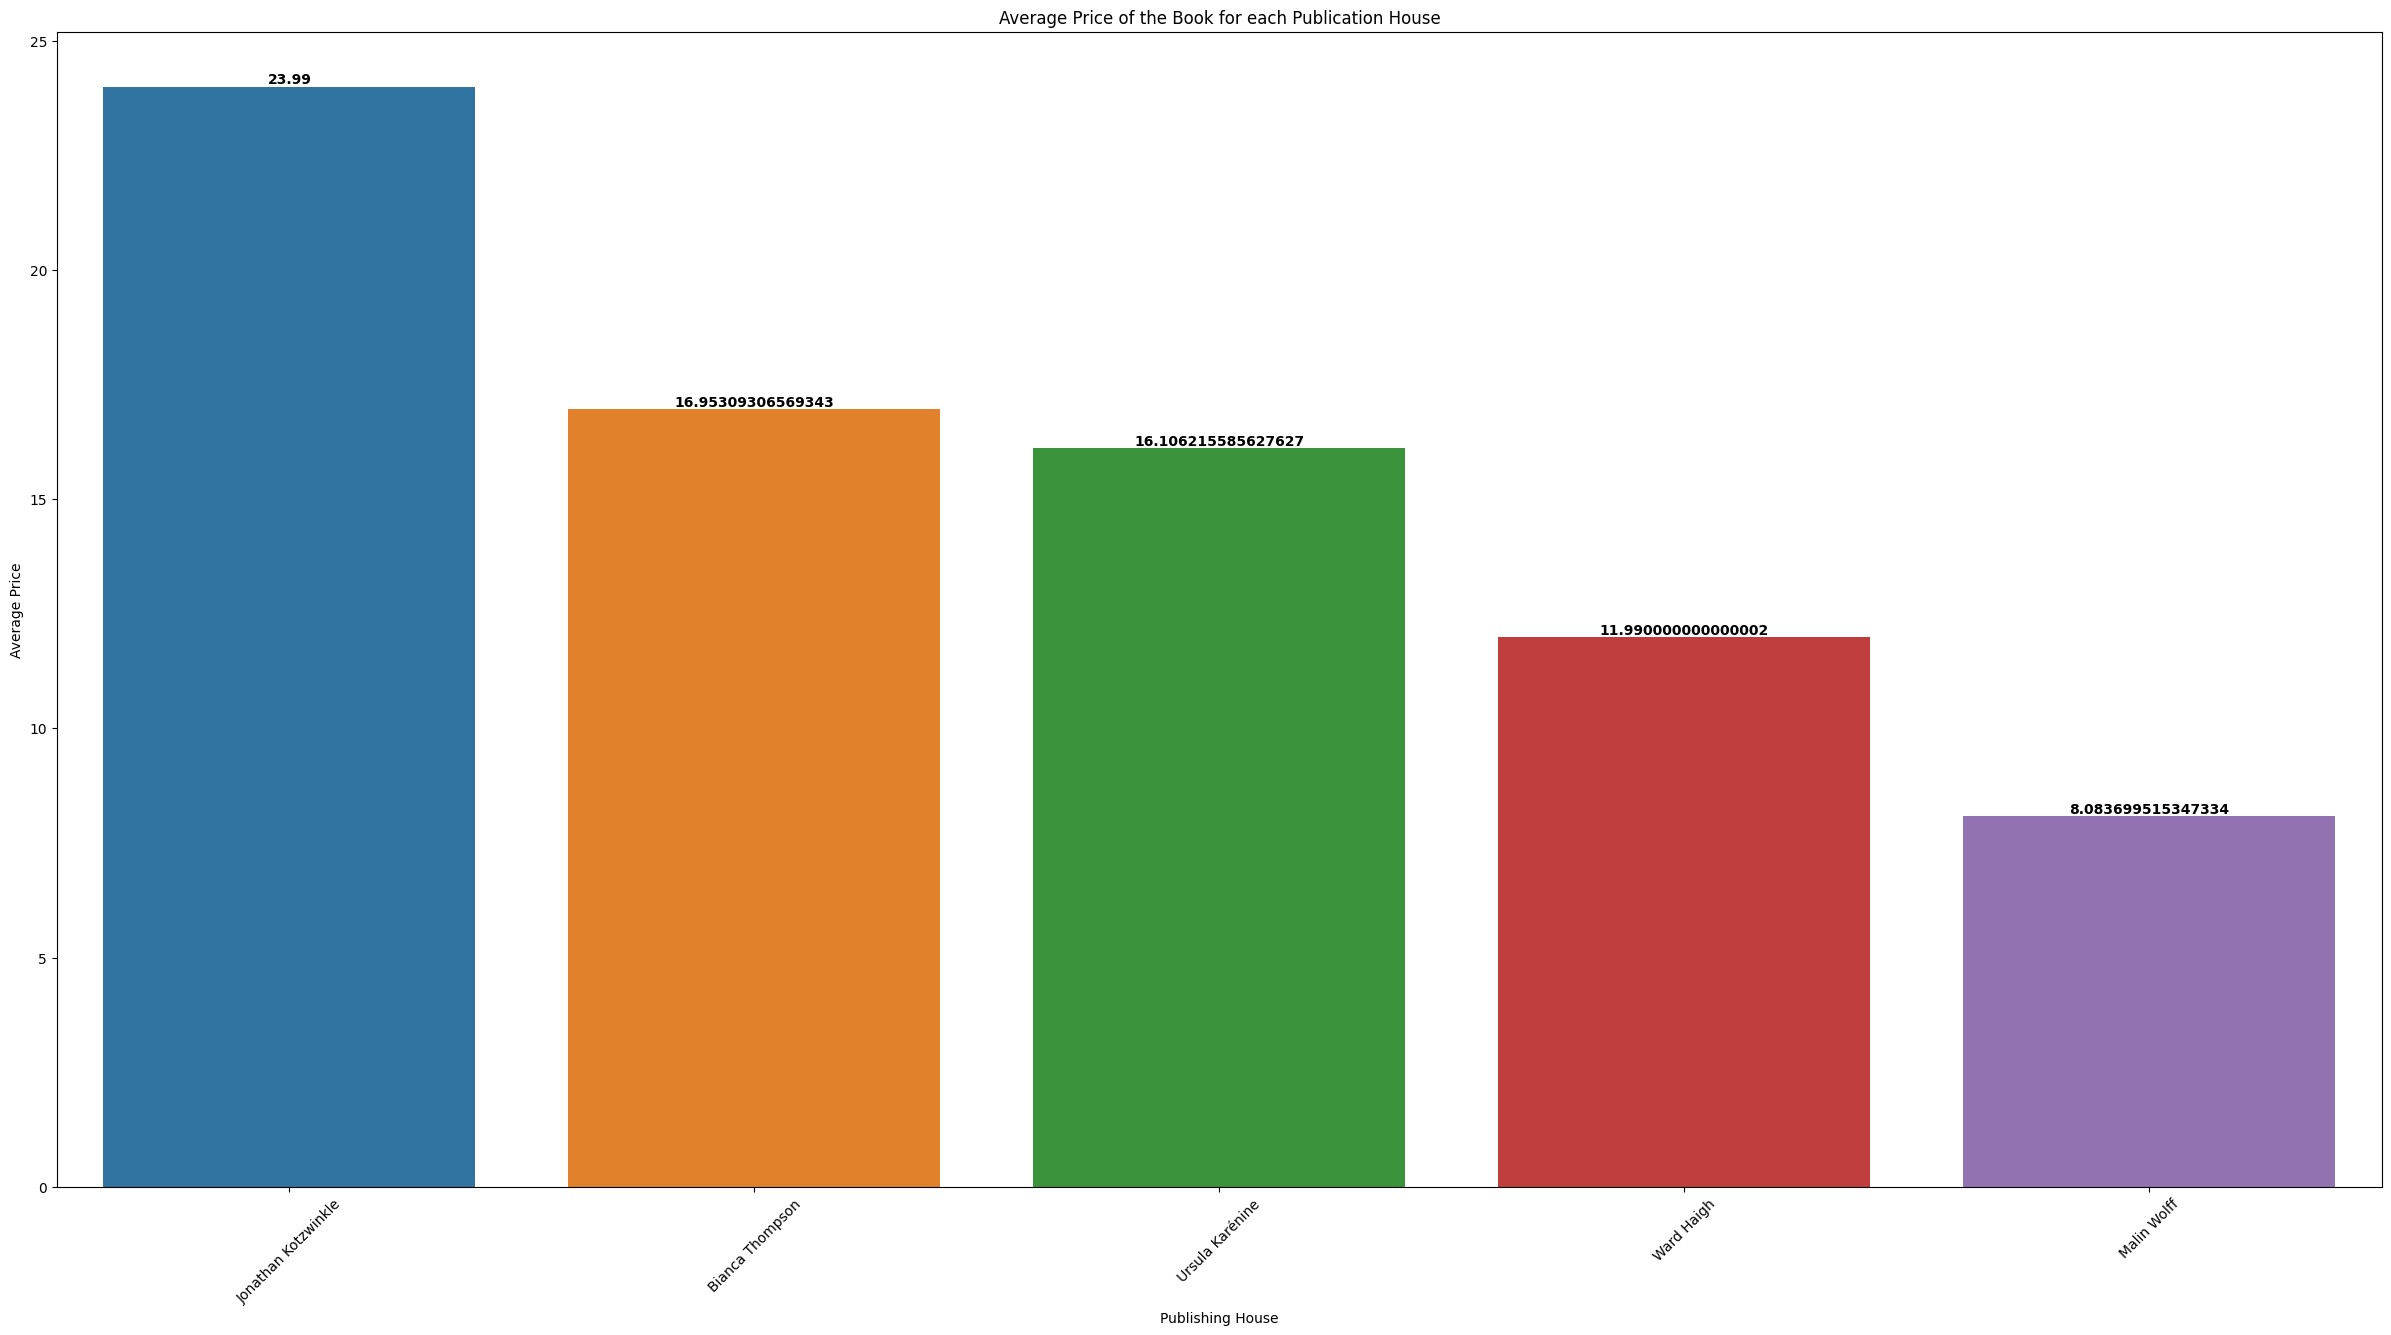

In [16]:
# 15.	Average price of the books for each publication house

DS15 = pd.merge(Book  ,Edition , on = "BookID")
DS15 = pd.merge(DS15, Publisher, on="PubID")
df15 = (pd.DataFrame(DS15.groupby("Publishing House")["Price"].mean()).reset_index().sort_values(by="Price", ascending=False))

plt.figure(figsize=(30, 15))
sns.barplot(x=df14["Full_Name"], y=df14["Price"], hue=df14["Full_Name"])

for i, value in enumerate(df14["Price"]):
    plt.text(i, value, str(value), ha="center", va="bottom", weight="bold")

plt.xlabel("Publishing House")
plt.ylabel("Average Price")
plt.title("Average Price of the Book for each Publication House")
plt.xticks(rotation=45)
plt.show()

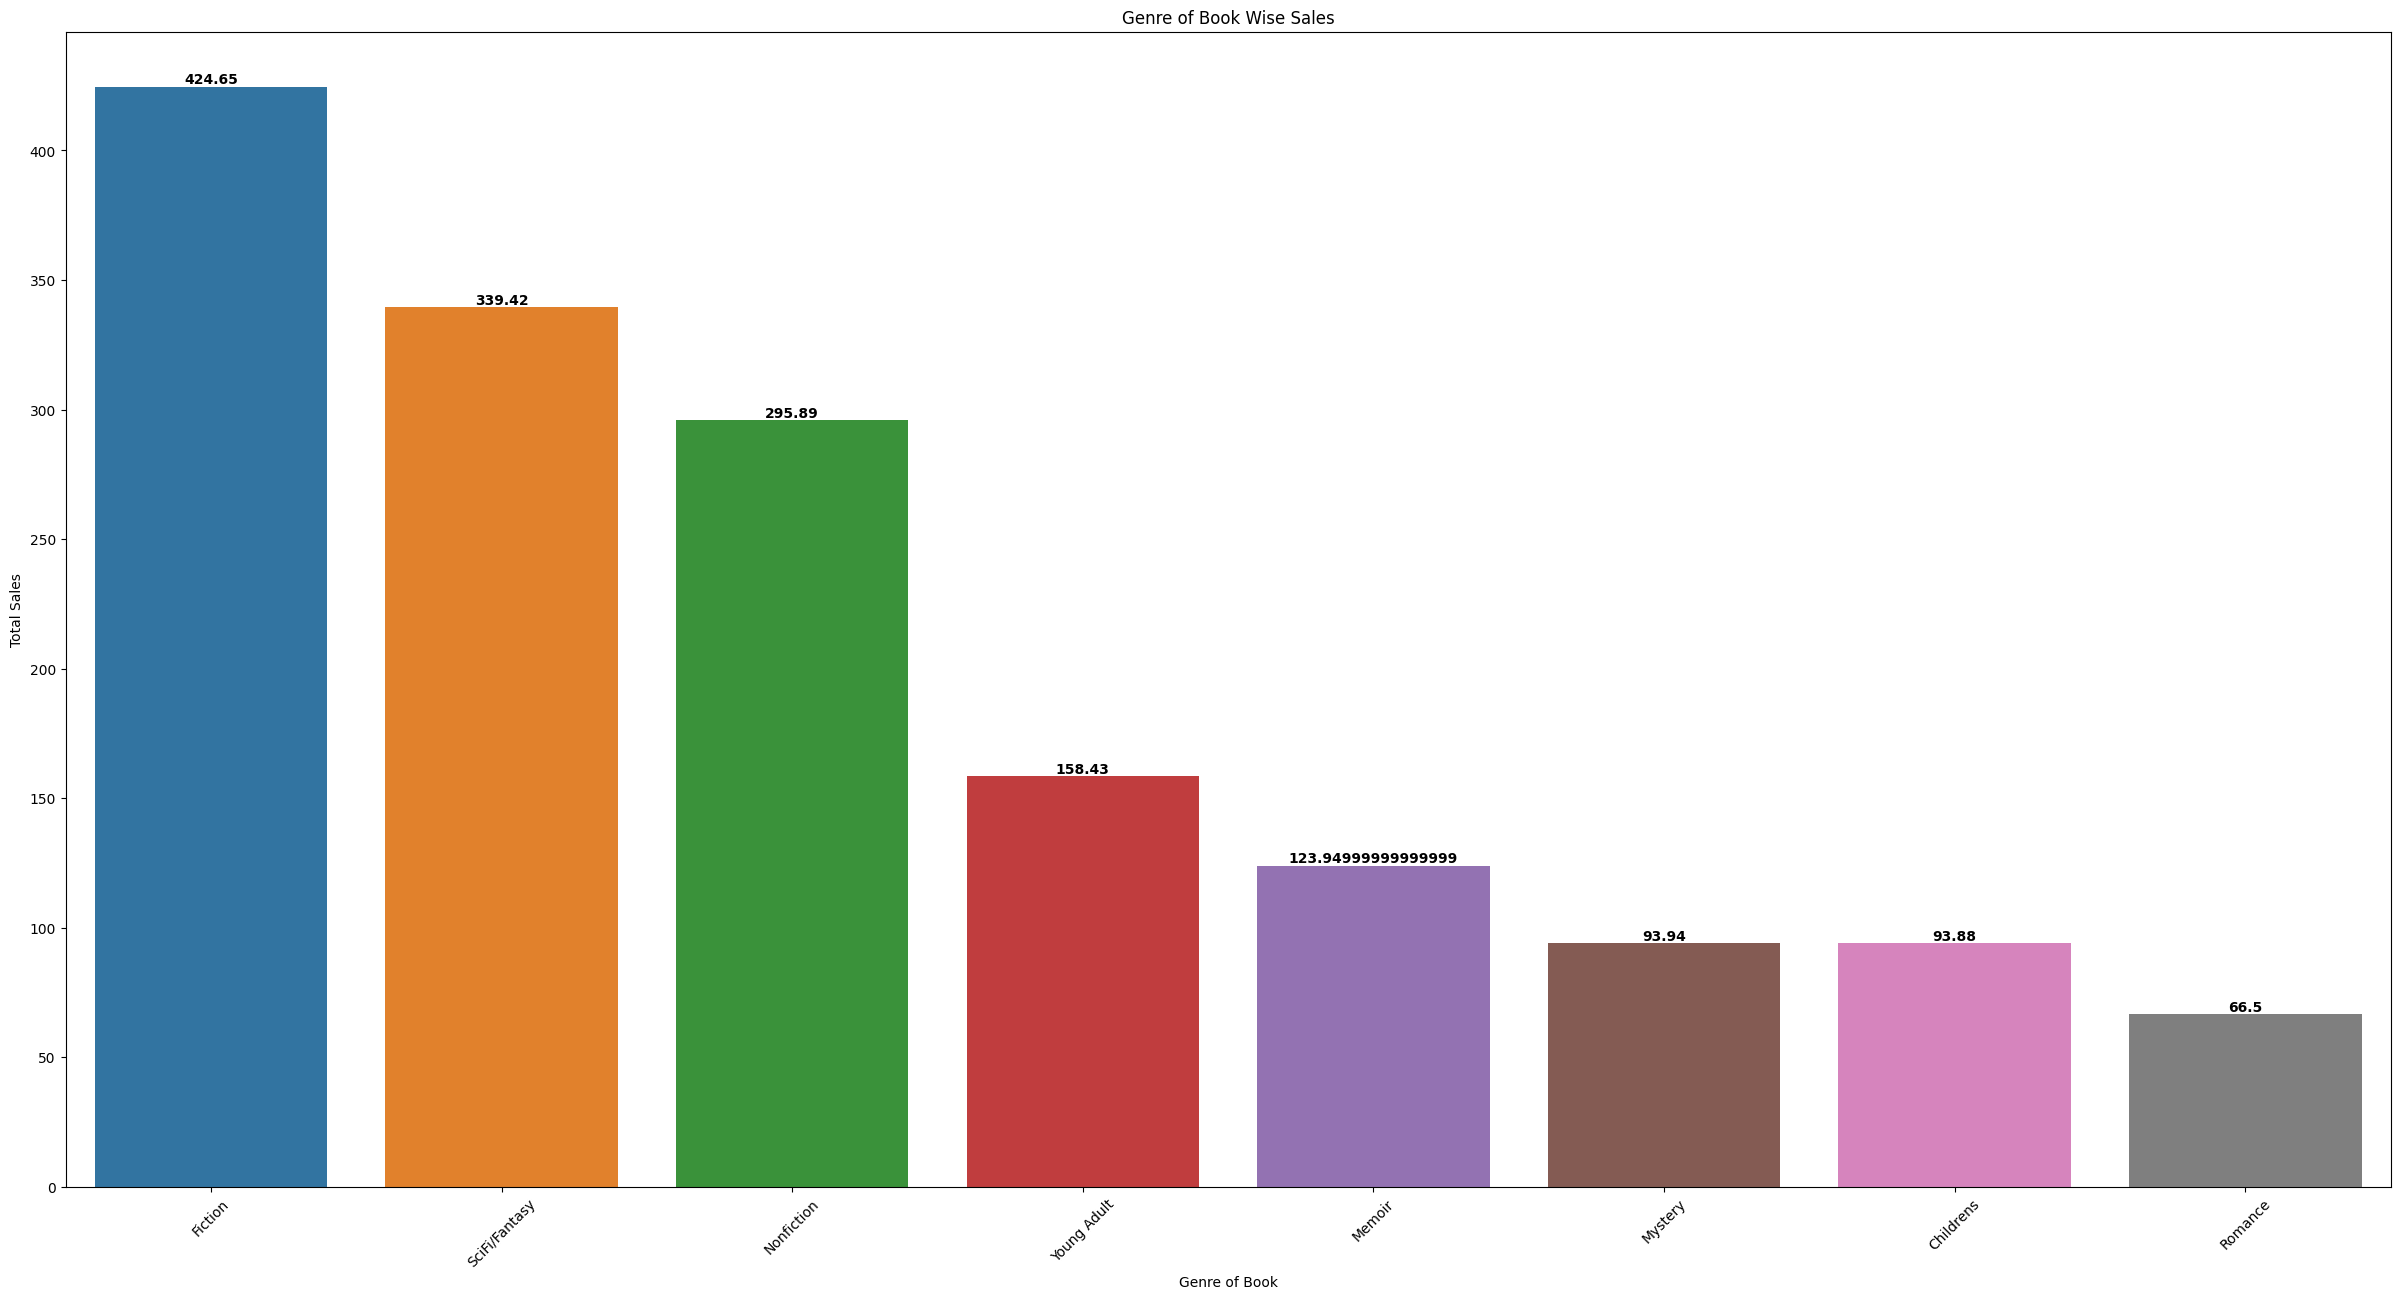

In [21]:
# 16.	Which genre of the book has the highest sales

DS16 = pd.merge(Info, Edition, on="BookID")
df16 = (pd.DataFrame(DS16.groupby("Genre")["Price"].sum()).reset_index().sort_values(by="Price" , ascending= False))

plt.figure(figsize=(30, 15))
sns.barplot(x=df16["Genre"], y=df16["Price"], hue=df16["Genre"])

for i, value in enumerate(df16["Price"]):
    plt.text(i, value, str(value), ha="center", va="bottom", weight="bold")

plt.xlabel("Genre of Book")
plt.ylabel("Total Sales")
plt.title("Genre of Book Wise Sales")
plt.xticks(rotation=45)
plt.show()

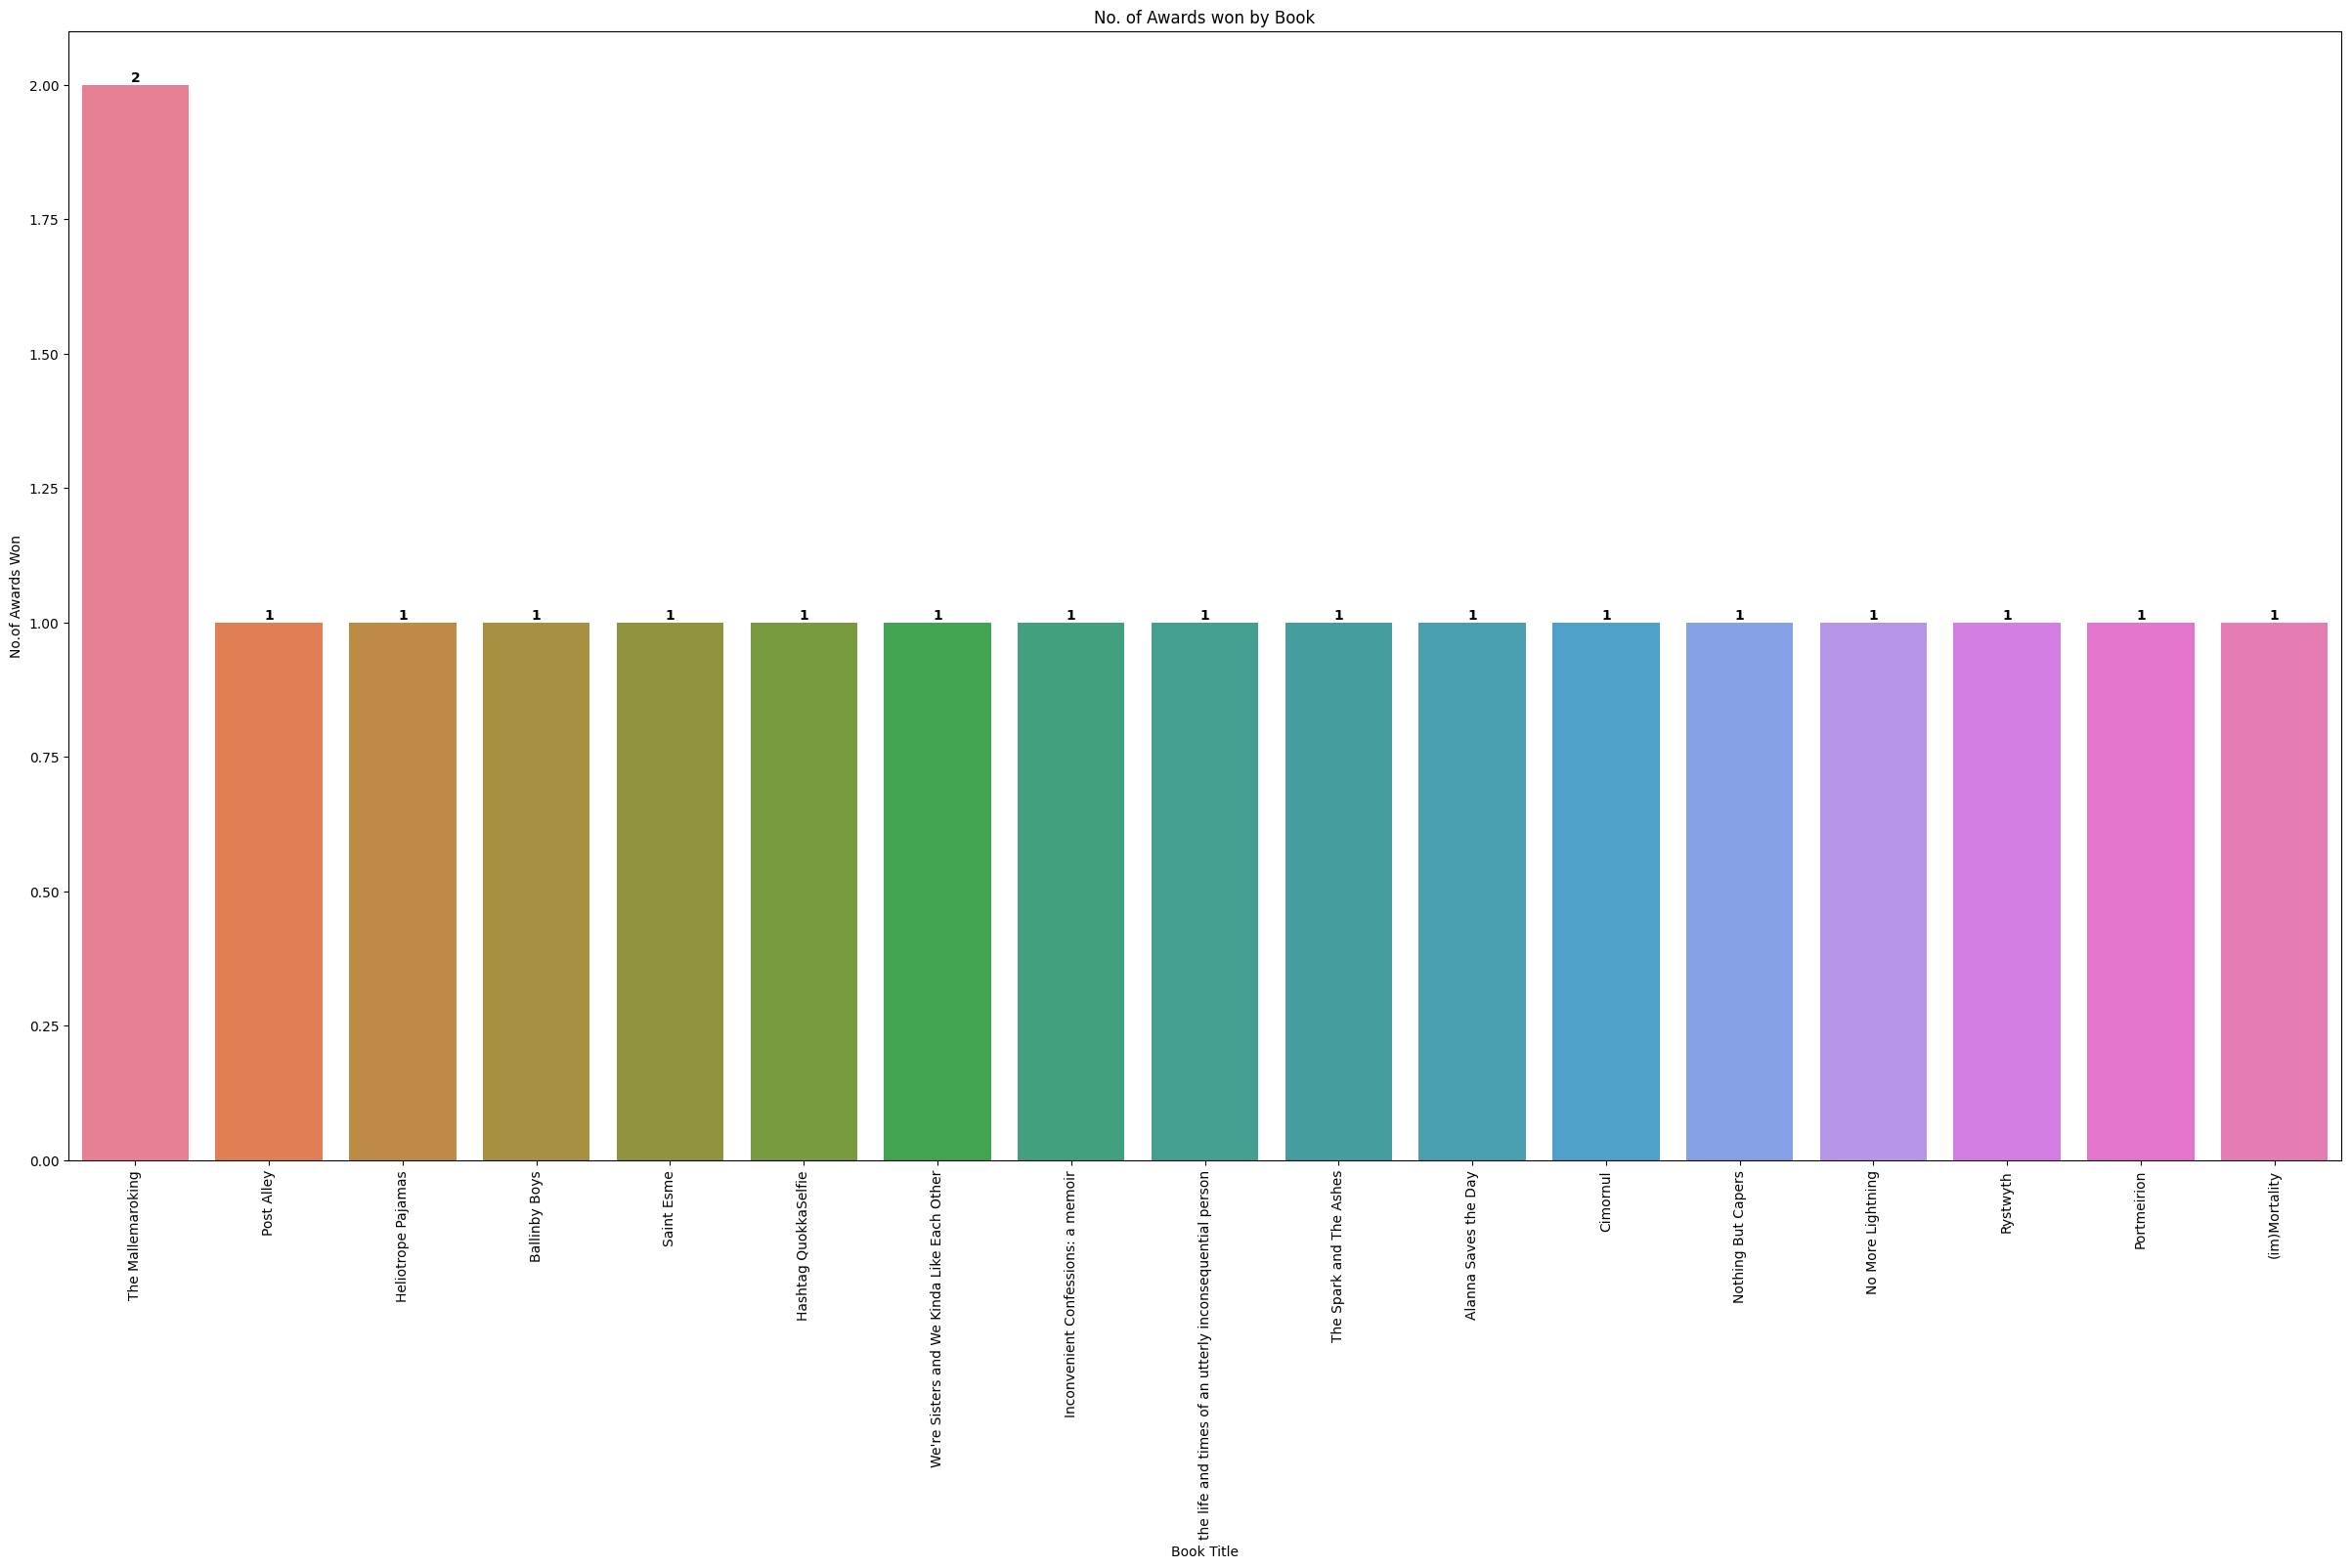

In [26]:
# 17.Top 5 books having won the maximum number of awards

DS17 = Award["Title"].value_counts().reset_index()
plt.figure(figsize=(30, 15))
sns.barplot(x=DS17["Title"], y=DS17["count"], hue=DS17["Title"])

for i, value in enumerate(DS17["count"]):
    plt.text(i, value, str(value), ha="center", va="bottom", weight="bold")

plt.xlabel("Book Title")
plt.ylabel("No.of Awards Won")
plt.title("No. of Awards won by Book")
plt.xticks(rotation=90)
plt.show()

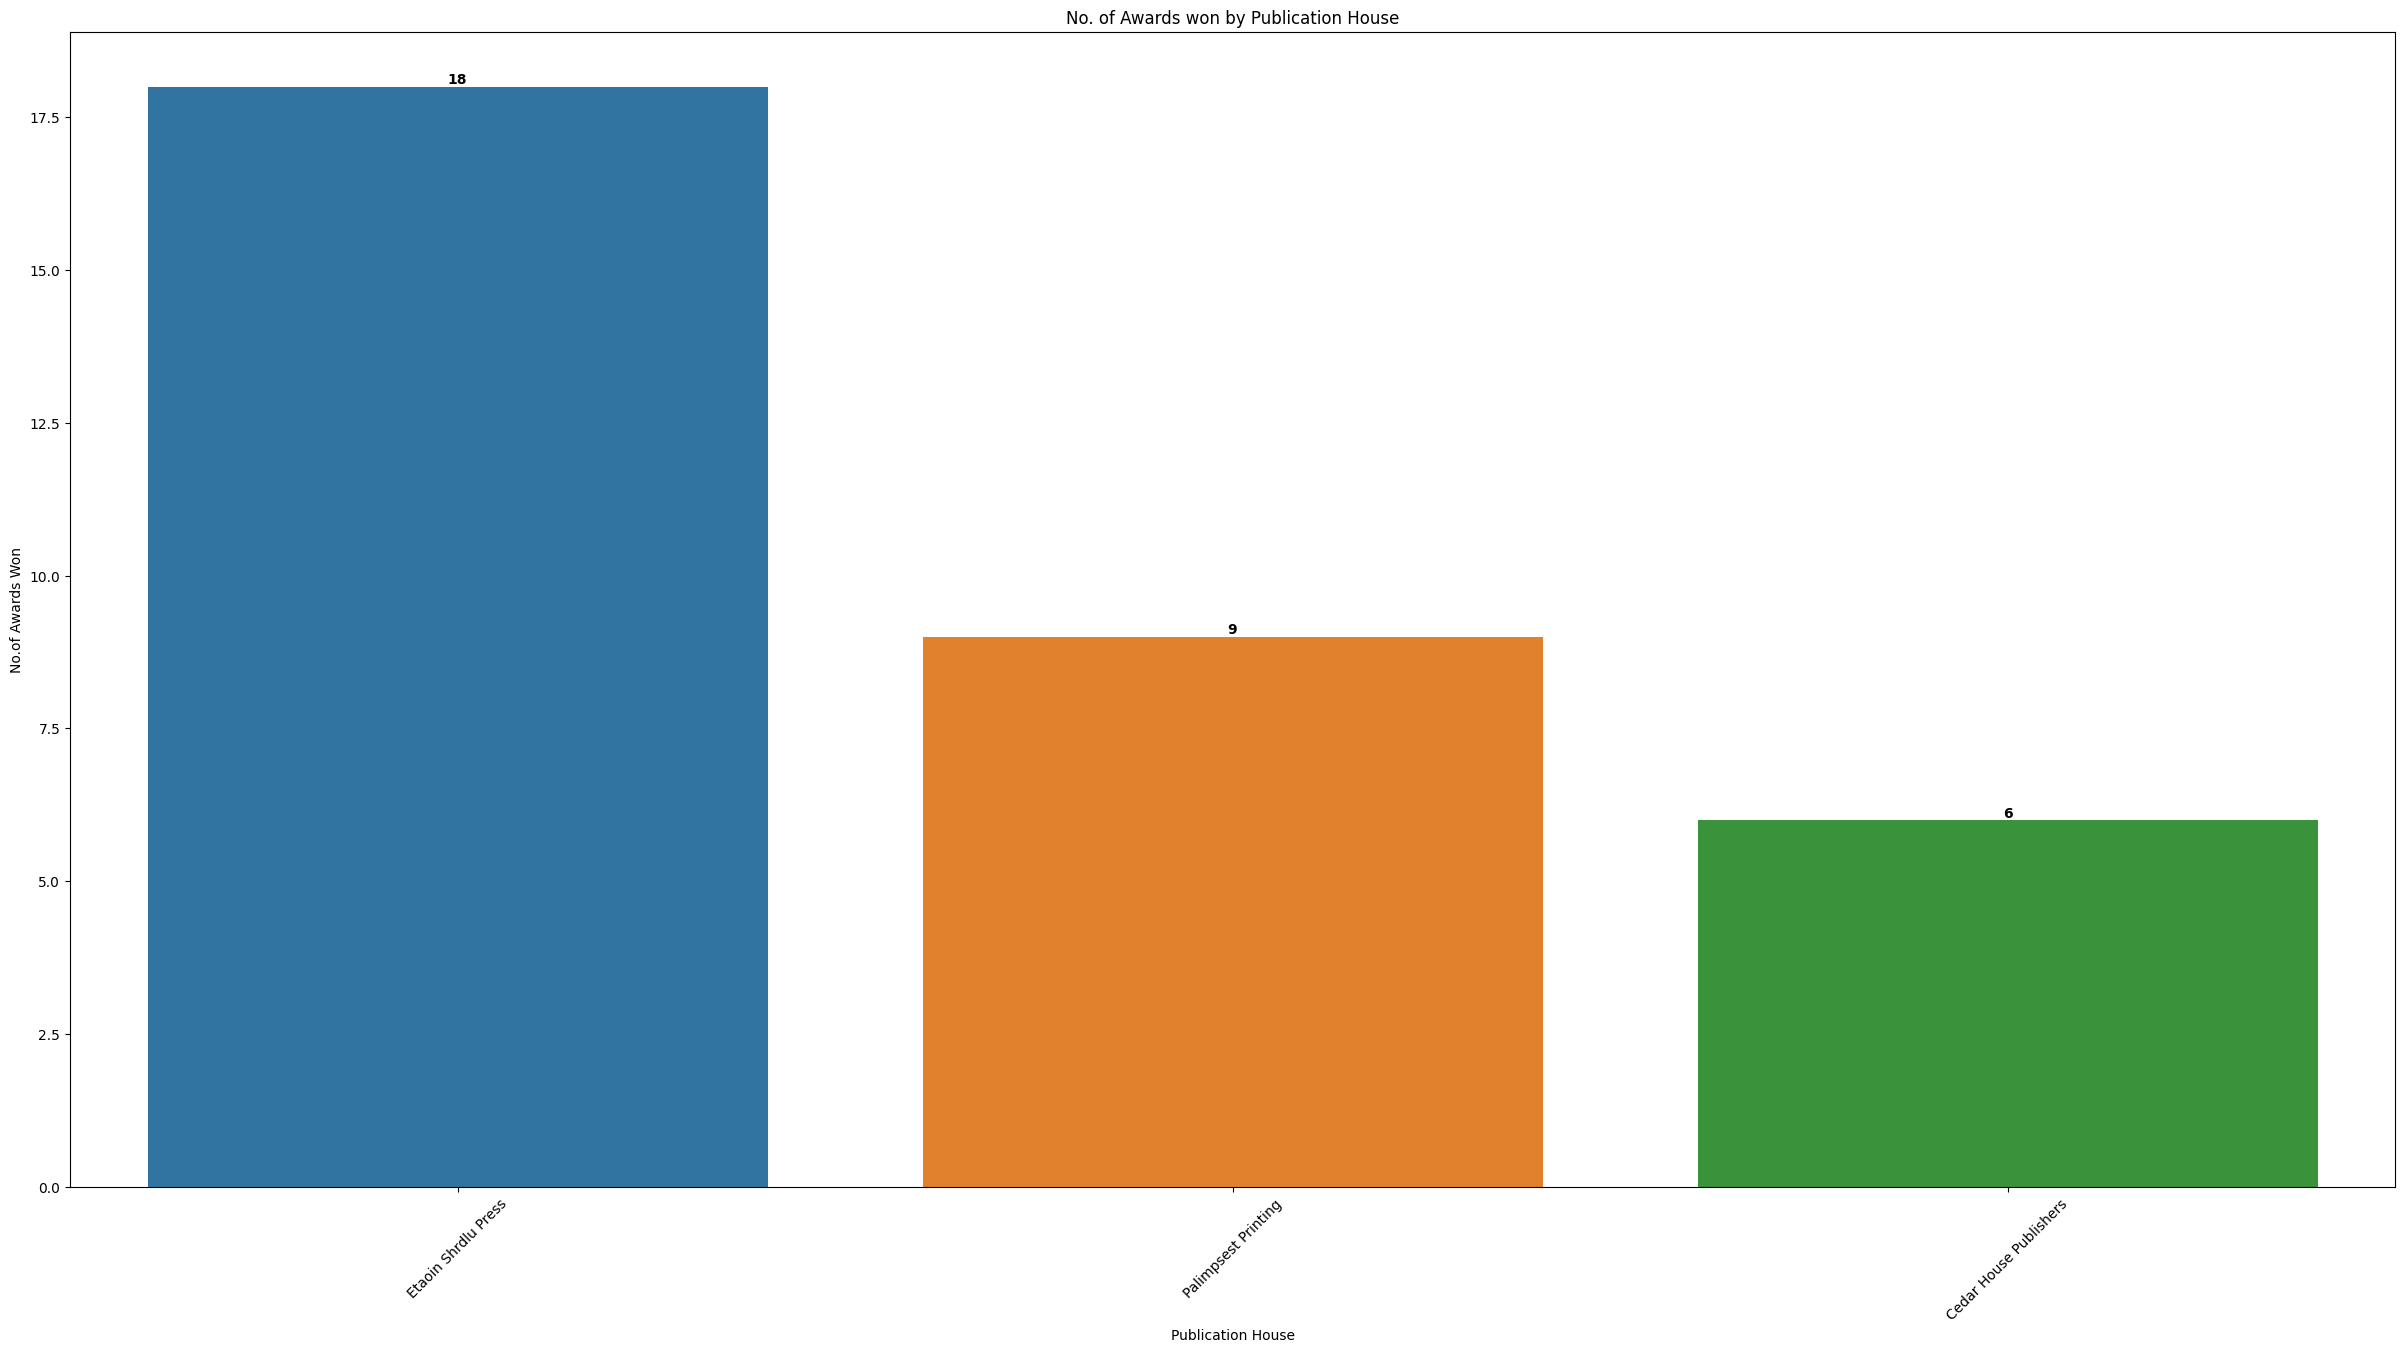

In [36]:
# 18.Top-3 publication houses having won the maximum number of awards

DS18 = pd.merge(Book , Award , on="Title")
DS18 = pd.merge(DS18 , Edition , on="BookID")
DS18 = pd.merge(DS18, Publisher, on="PubID")
df18 = (DS18["Publishing House"].value_counts()).reset_index().sort_values(by = "count"  ,ascending= False)[:3]

plt.figure(figsize=(30, 15))
sns.barplot(x=df18["Publishing House"], y=df18["count"], hue=df18["Publishing House"])

for i, value in enumerate(df18["count"]):
    plt.text(i, value, str(value), ha="center", va="bottom", weight="bold")

plt.xlabel("Publication House")
plt.ylabel("No.of Awards Won")
plt.title("No. of Awards won by Publication House")
plt.xticks(rotation=45)
plt.show()

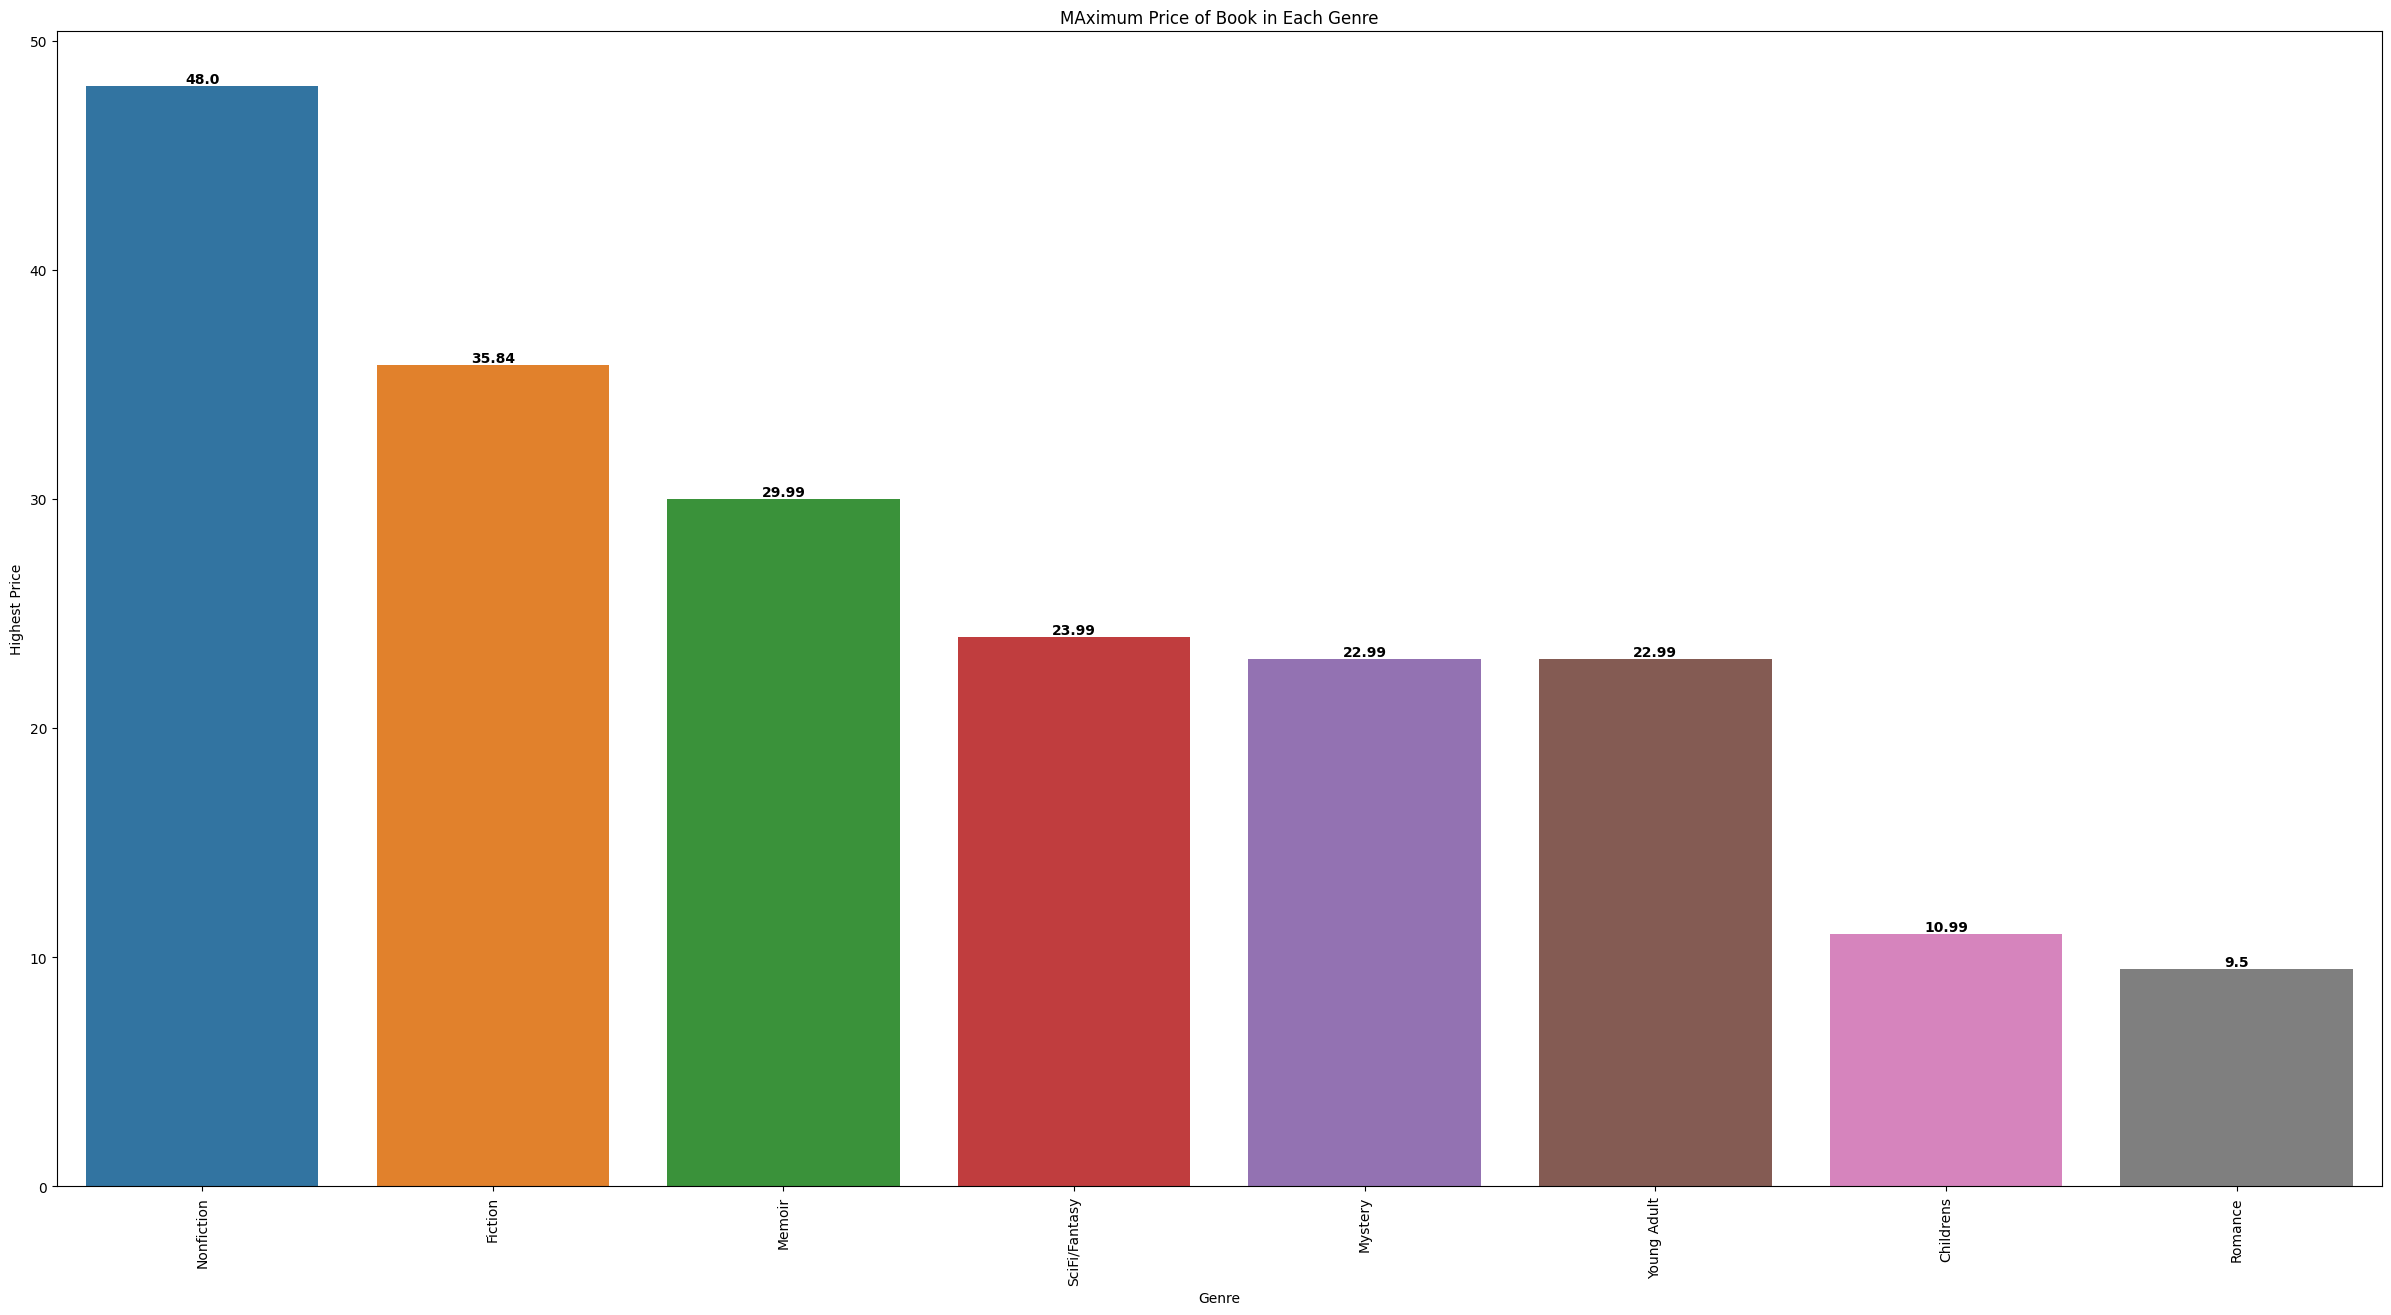

In [39]:
# 19.	Which genre of the books has the highest price

DS19 = pd.merge(Info, Edition, on="BookID")
df19 = pd.DataFrame(DS19.groupby("Genre")["Price"].max()).sort_values(by="Price" , ascending= False).reset_index()

plt.figure(figsize=(30, 15))
sns.barplot(x=df19["Genre"], y=df19["Price"], hue=df19["Genre"])

for i, value in enumerate(df19["Price"]):
    plt.text(i, value, str(value), ha="center", va="bottom", weight="bold")

plt.xlabel("Genre")
plt.ylabel("Highest Price")
plt.title("MAximum Price of Book in Each Genre")
plt.xticks(rotation=90)
plt.show()

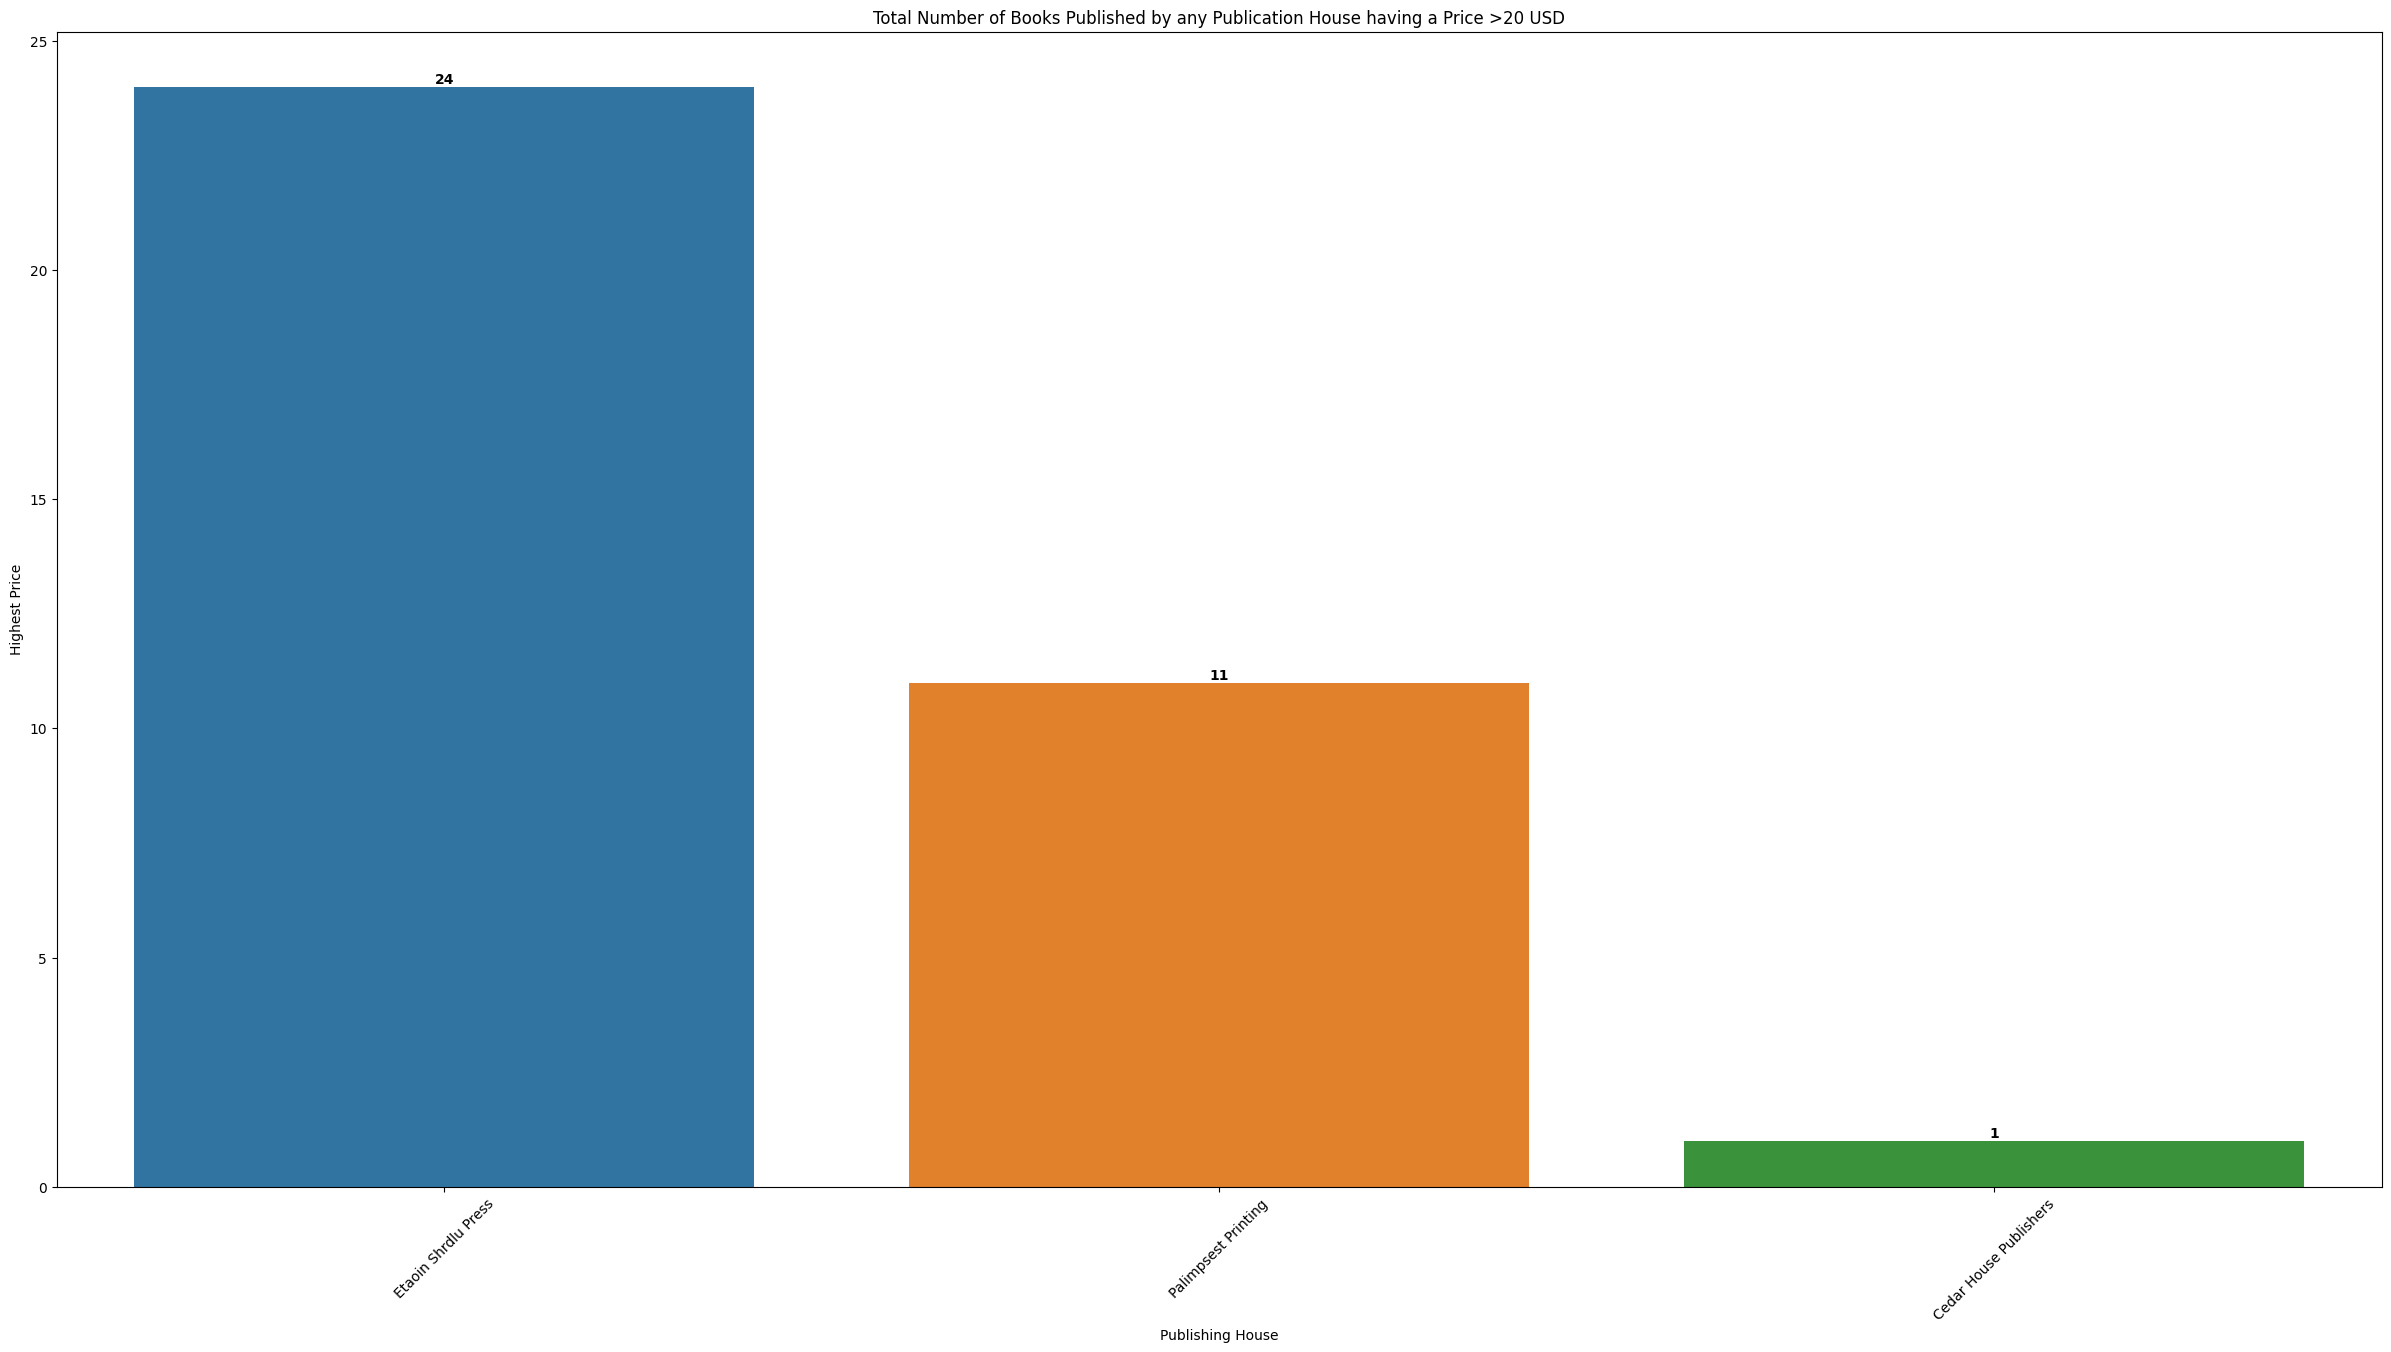

In [44]:
# 20.Total number of books published by any publication house having a price >20 USD

DS20 = pd.merge(Edition, Publisher, on="PubID")
DS20 = DS20[DS20['Price'] > 20.00]
df20 = DS20["Publishing House"].value_counts().reset_index()

plt.figure(figsize=(30, 15))
sns.barplot(x=df20["Publishing House"], y=df20["count"], hue=df20["Publishing House"])

for i, value in enumerate(df20["count"]):
    plt.text(i, value, str(value), ha="center", va="bottom", weight="bold")

plt.xlabel("Publishing House")
plt.ylabel("Highest Price")
plt.title("Total Number of Books Published by any Publication House having a Price >20 USD")
plt.xticks(rotation=45)
plt.show()

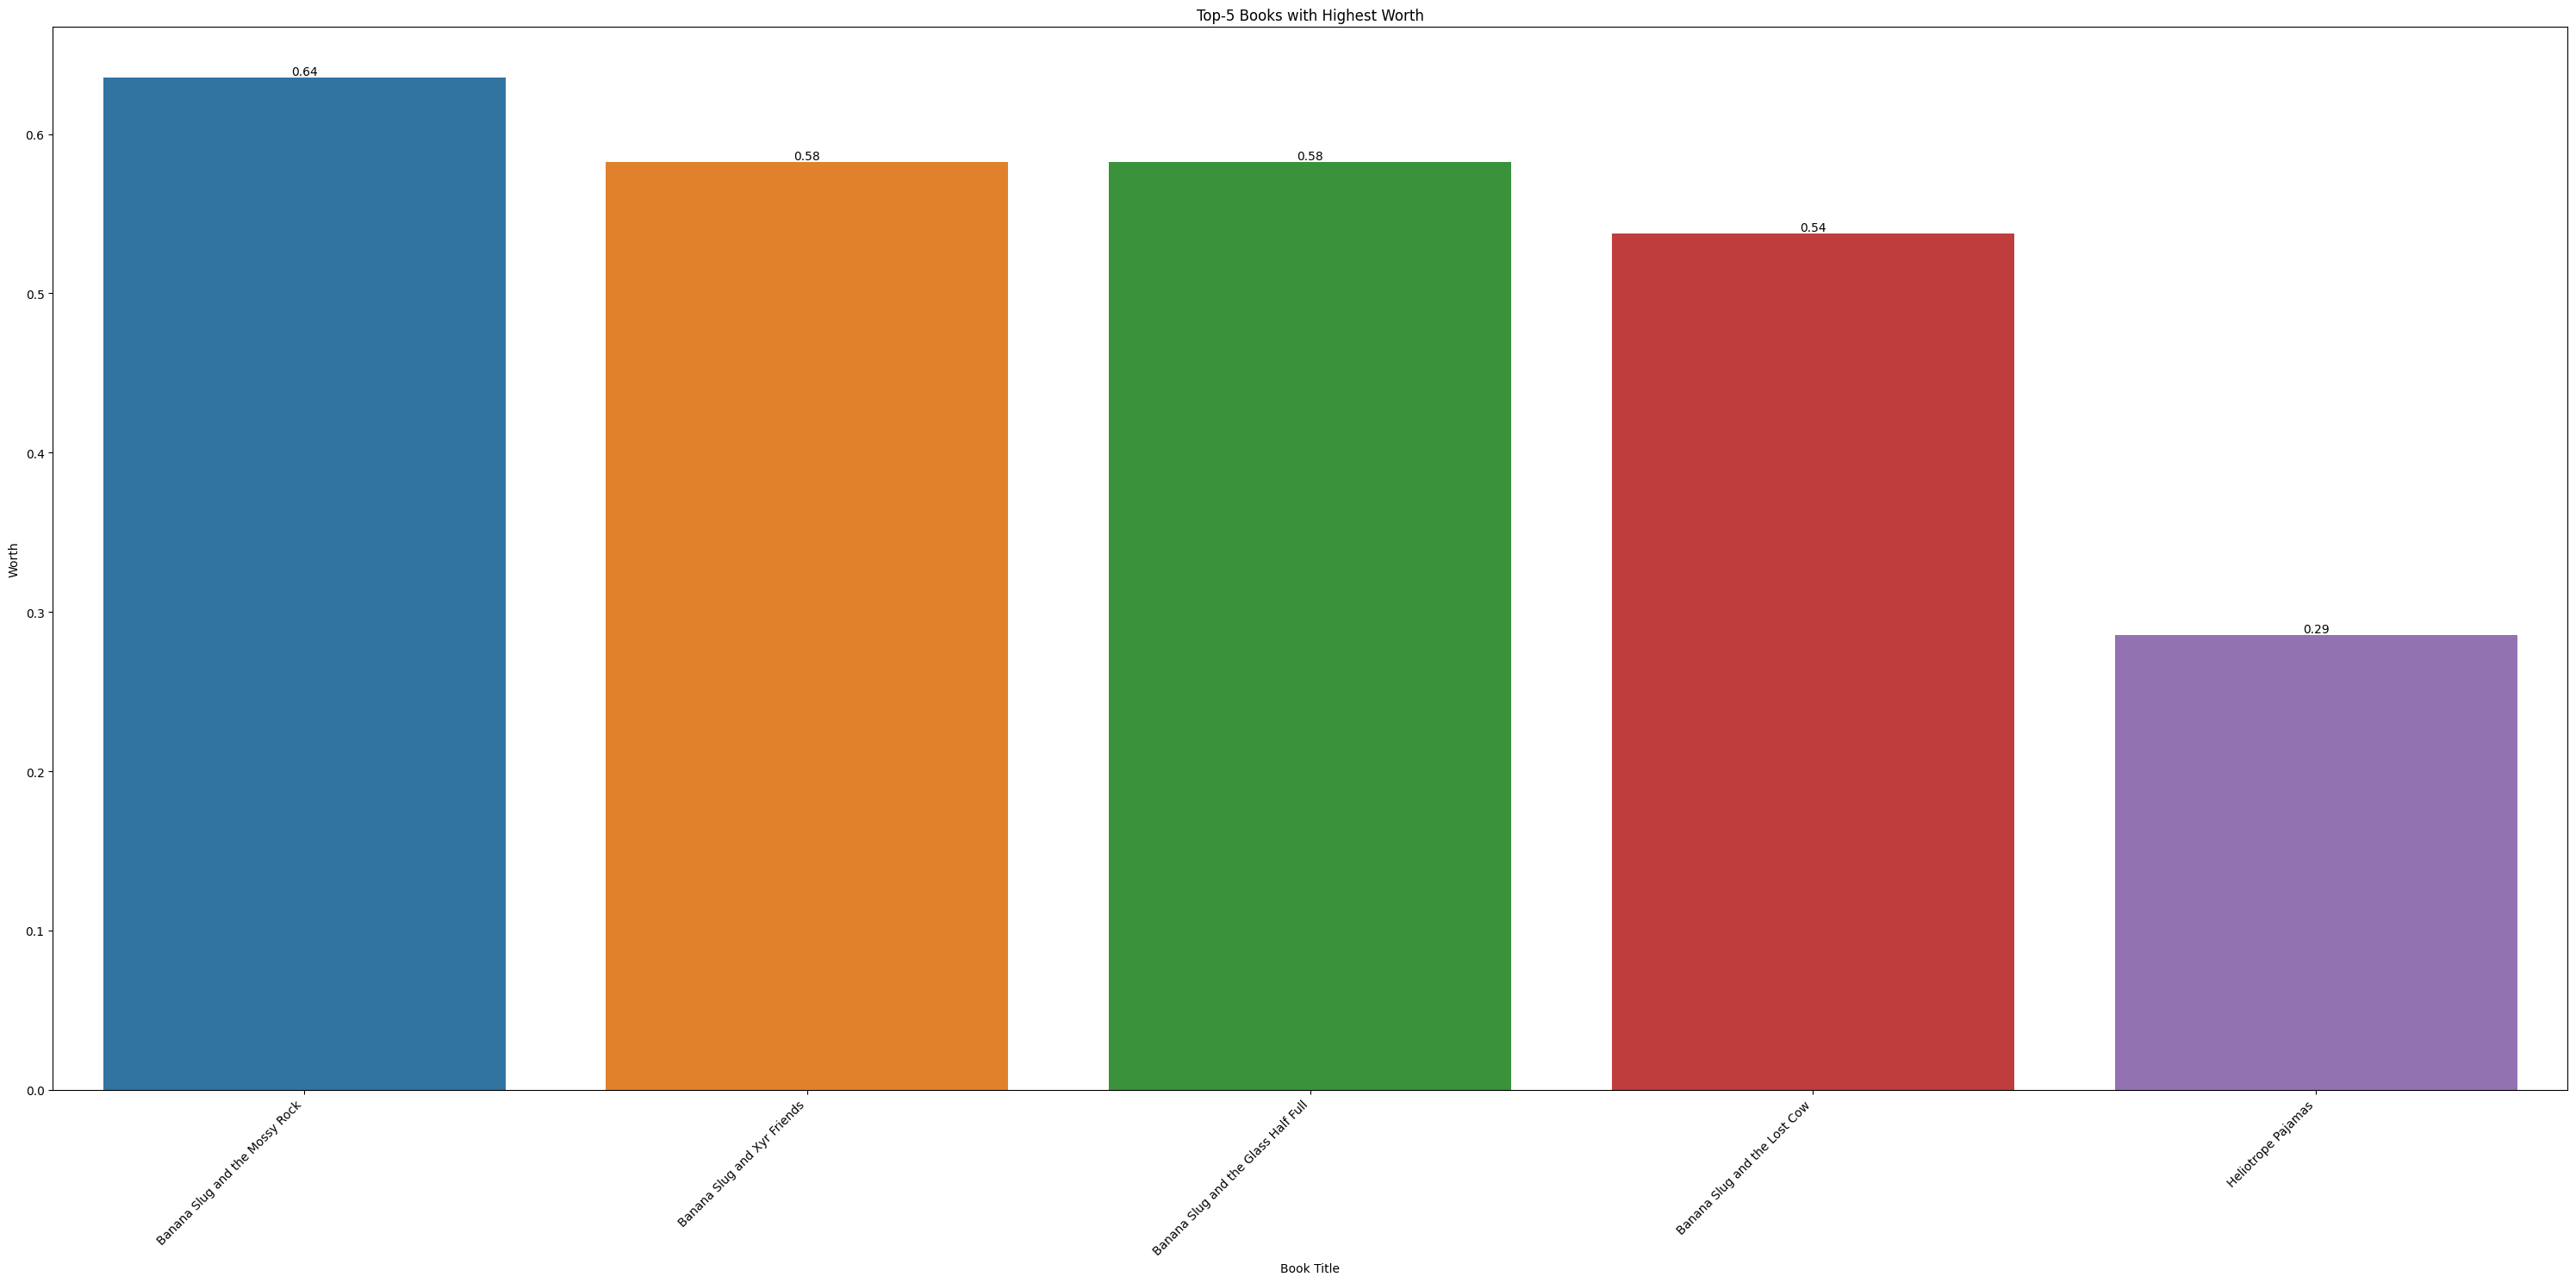

In [66]:
# 21.Top-5 books with the highest worth (worth=price/number of pages)

DS21 = pd.merge(Book, Edition, on="BookID")
DS21["Worth"] = DS21["Price"] / DS21["Pages"]
DS21 = DS21.drop_duplicates(subset=["Title"])
DS21 = DS21.sort_values(by="Worth", ascending=False)
df21 = DS21.head(5)

plt.figure(figsize=(30, 15))
sns.barplot(x=df21["Title"], y=df21["Worth"], hue=df21["Title"])

for index, value in enumerate(df21["Worth"]):
    plt.text(index, value, str(round(value, 2)), ha="center", va="bottom", fontsize=10)

plt.xlabel("Book Title")
plt.ylabel("Worth")
plt.title("Top-5 Books with Highest Worth")
plt.xticks(rotation=45, ha="right")
plt.tight_layout()
plt.show()

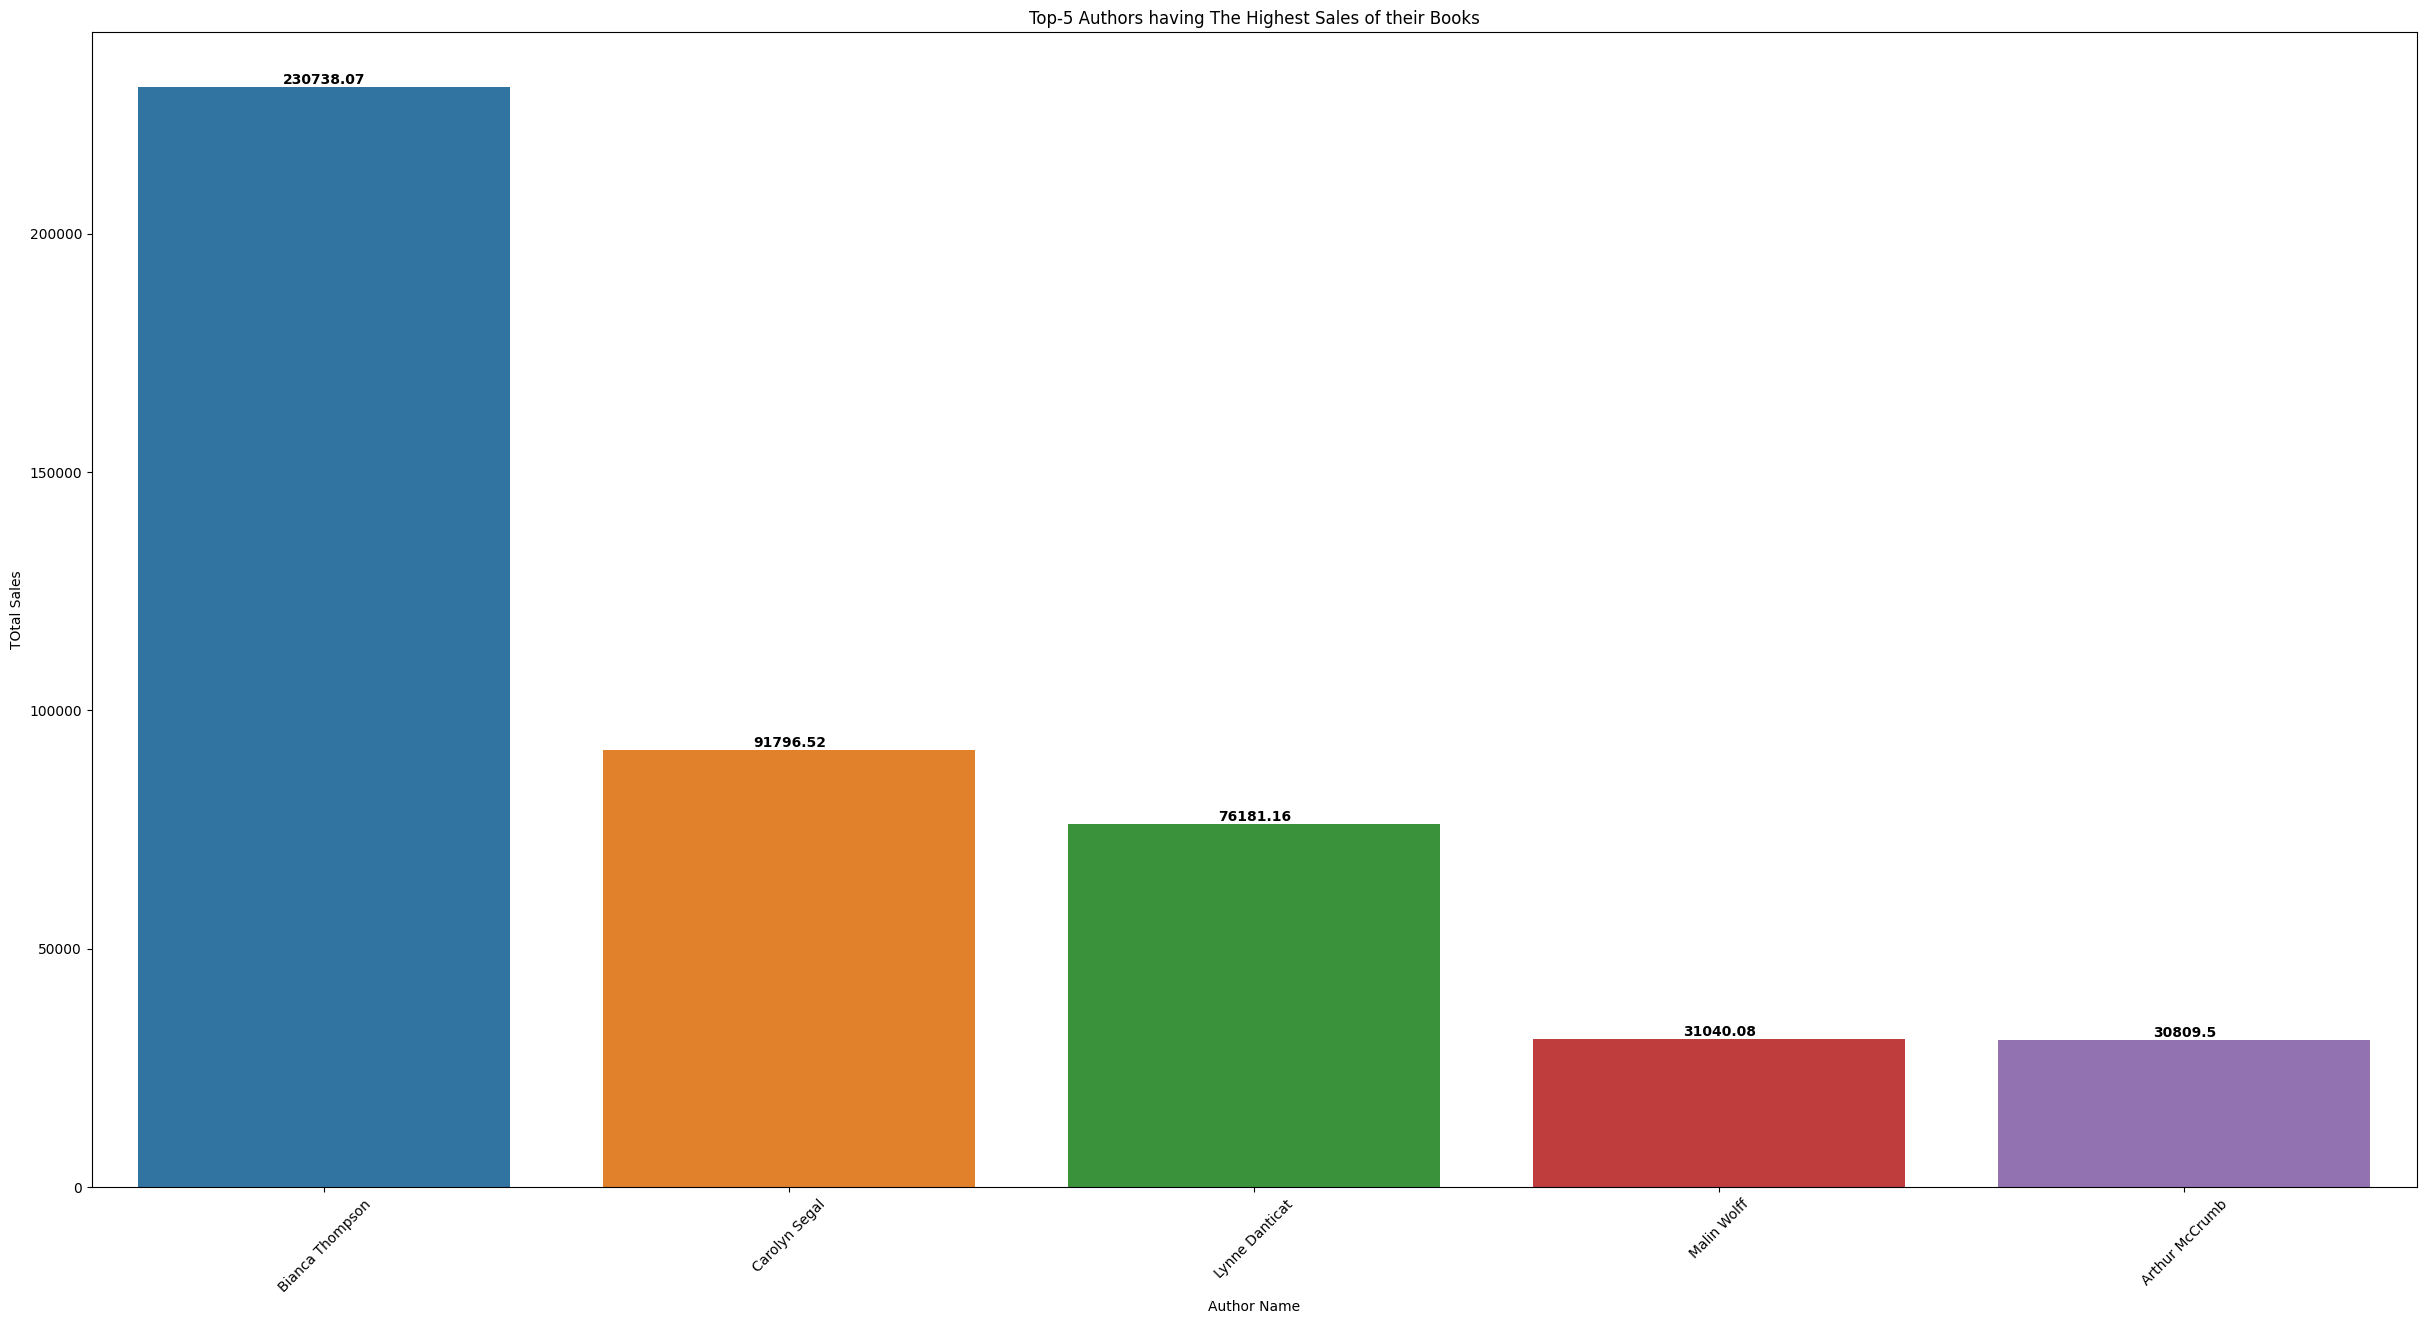

In [79]:
# 22.Top-5 authors having the highest sales of their books

DS22 = pd.concat([Sales_Q1.value_counts("ISBN").reset_index(),Sales_Q2.value_counts("ISBN").reset_index(),Sales_Q3.value_counts("ISBN").reset_index(),Sales_Q4.value_counts("ISBN").reset_index(),],ignore_index=True,)
DS22 = pd.merge(DS22, Edition, on="ISBN")
DS22["Total Price"] = DS22["count"] * DS22["Price"]
DS22 = pd.merge(DS22, Book, on="BookID")
DS22 = pd.merge(DS22, Author, on="AuthID")
DS22 = DS22[["Full_Name", "Total Price"]]
df22 = (
    pd.DataFrame(DS22.groupby("Full_Name")["Total Price"].sum())
    .reset_index()
    .sort_values(by="Total Price" , ascending=False)
)
df22 = df22.head(5)

plt.figure(figsize=(30, 15))
sns.barplot(x=df22["Full_Name"], y=df22["Total Price"], hue=df22["Full_Name"])

for i, value in enumerate(df22["Total Price"]):
    plt.text(i, value, str(value), ha="center", va="bottom", weight="bold")

plt.xlabel("Author Name")
plt.ylabel("TOtal Sales")
plt.title("Top-5 Authors having The Highest Sales of their Books")
plt.xticks(rotation=45)
plt.show()

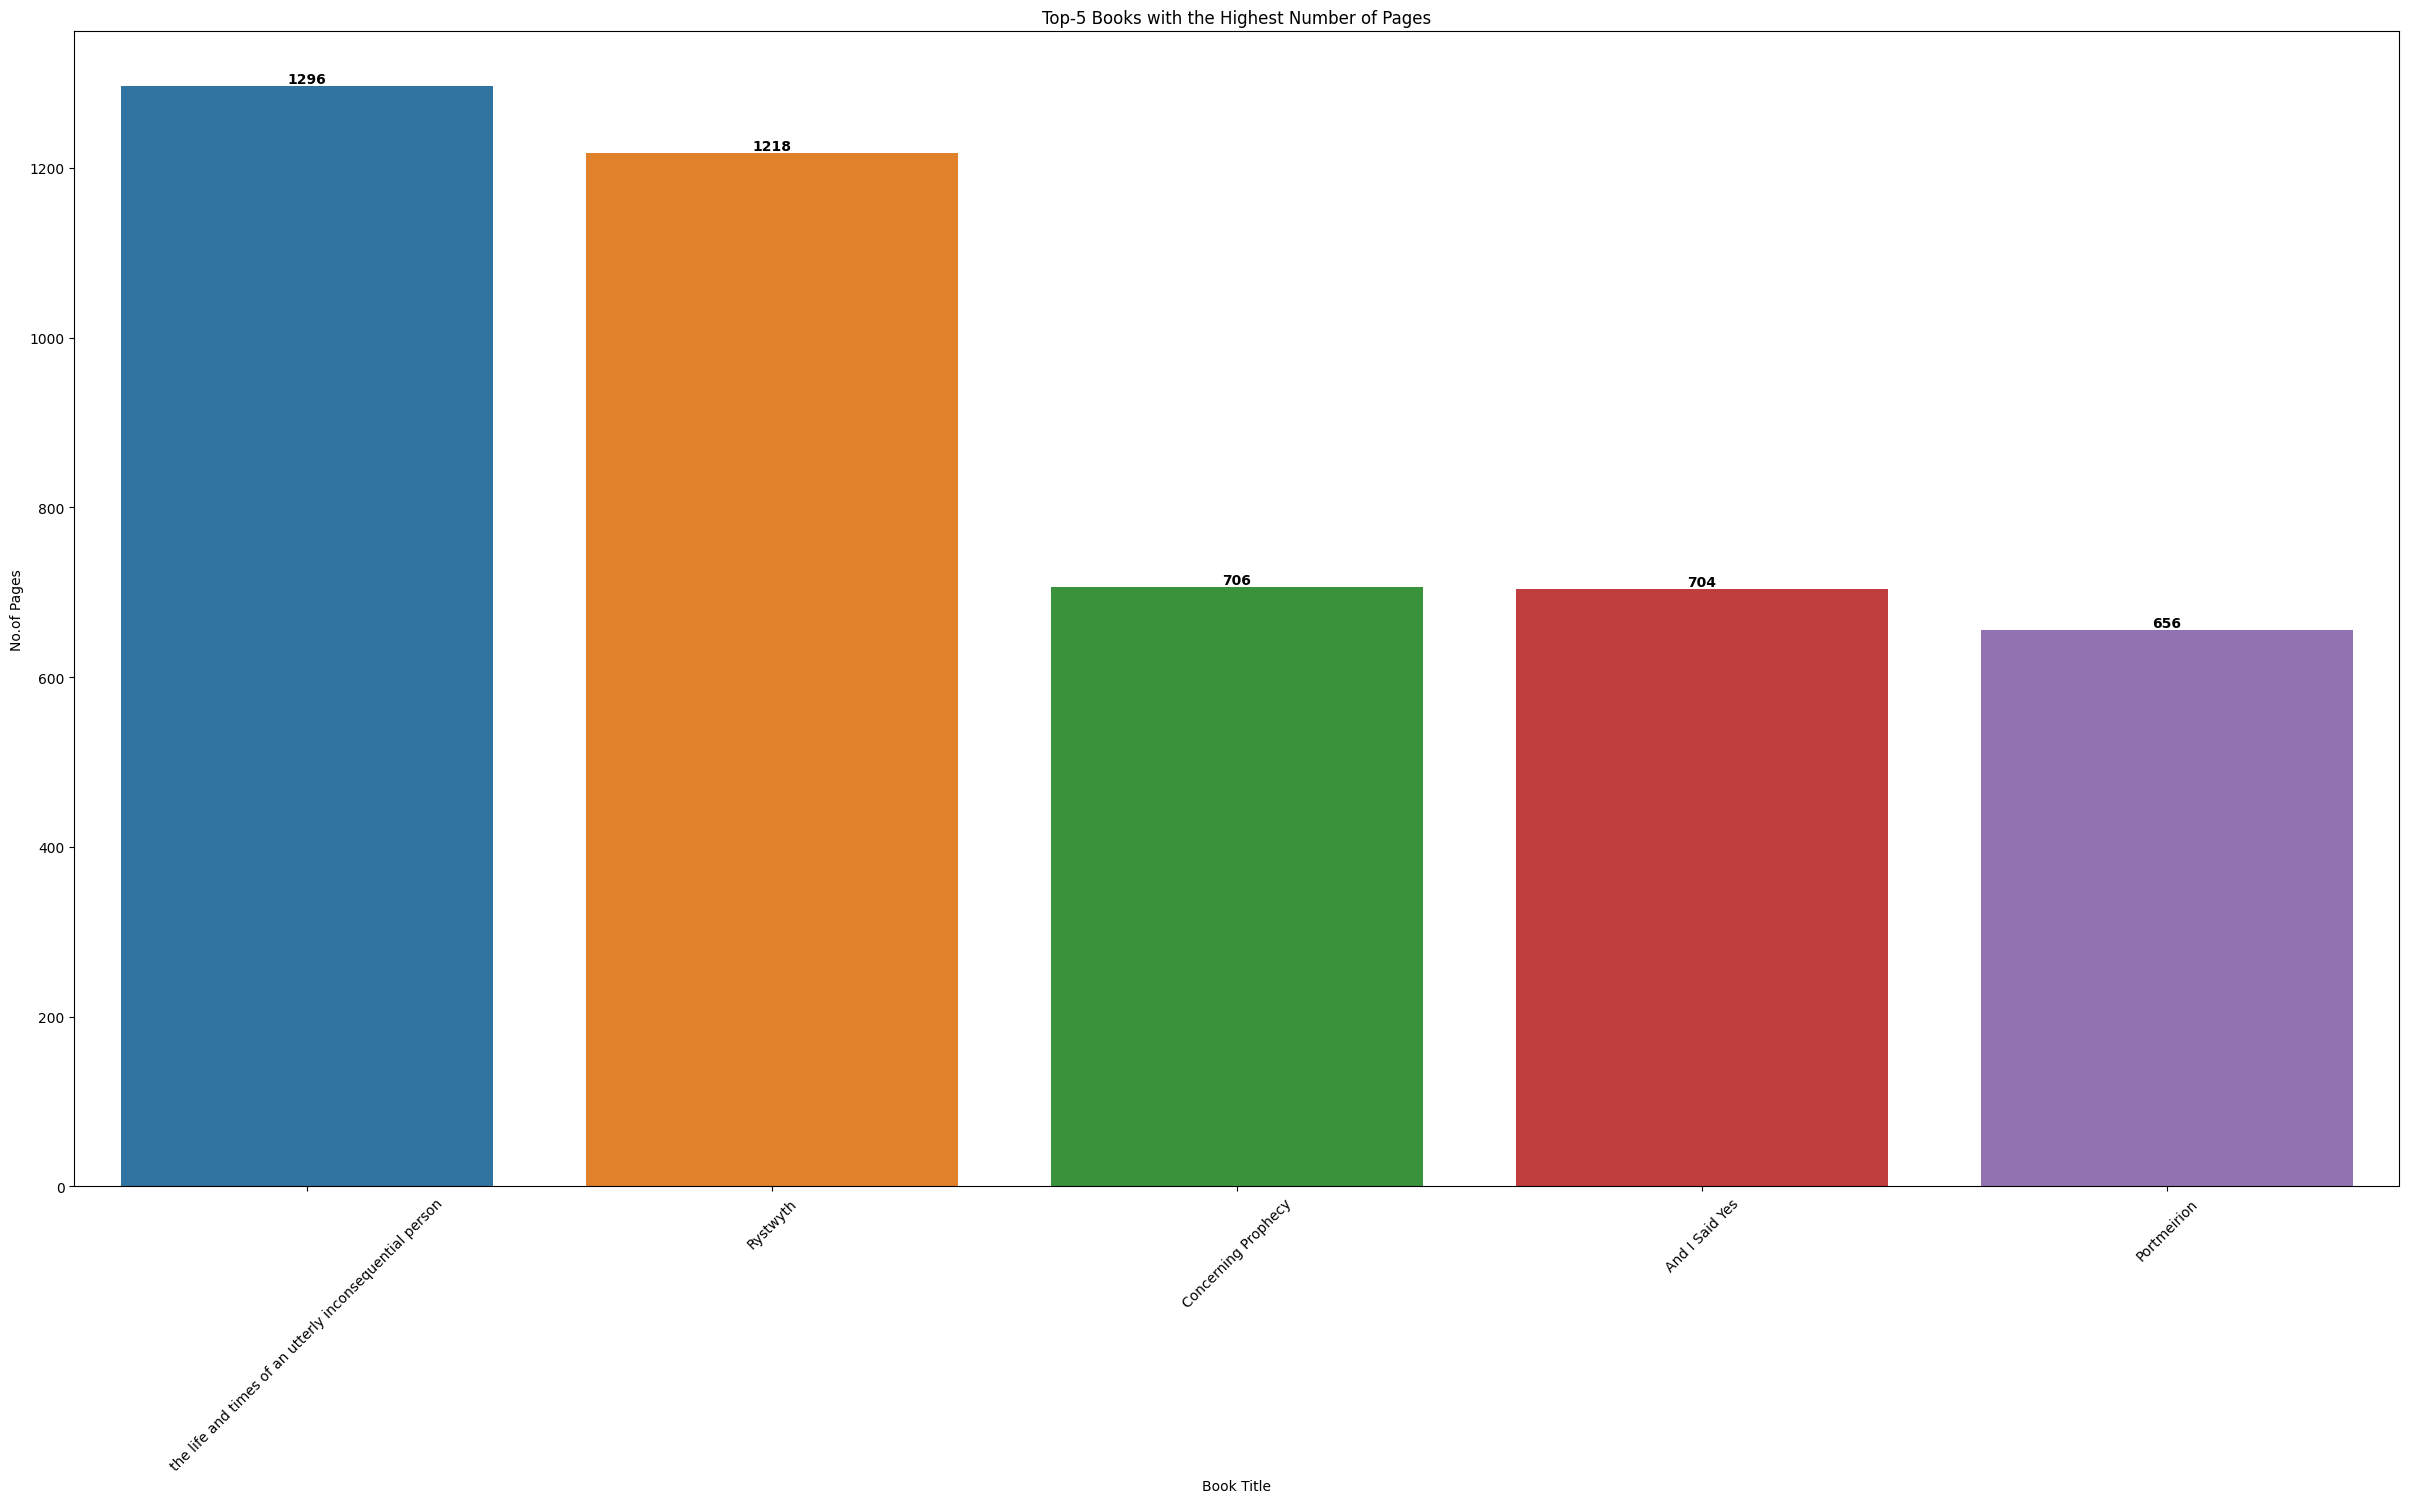

In [86]:
# 23.Top-5 books with the highest number of pages

DS23 = pd.merge(Edition , Book , on = "BookID")
DS23 = pd.merge(DS23, Author, on="AuthID")
DS23 = DS23.drop_duplicates(subset=["Title"])
DS23 = DS23.sort_values(by="Pages" , ascending= False)
df23 = DS23[["Title", "Pages"]].head(5)

plt.figure(figsize=(30, 15))
sns.barplot(x=df23["Title"], y=df23["Pages"], hue=df23["Title"])

for i, value in enumerate(df23["Pages"]):
    plt.text(i, value, str(value), ha="center", va="bottom", weight="bold")

plt.xlabel("Book Title")
plt.ylabel("No.of Pages")
plt.title("Top-5 Books with the Highest Number of Pages")
plt.xticks(rotation=45)
plt.show()